# EXPLORATORY DATA ANALYSIS(EDA)
using clean and merged data

In [ ]:
import pandas as pd
clean_data = pd.read_csv('/content/Clean_Merged_AutomobileData.csv')

In [ ]:
# Calculate car age(Adding new column)
current_year = 2024
clean_data['car_age'] = current_year - clean_data['year']

In [ ]:
# Inspect data types and summary statistics
print(clean_data.info())
print(clean_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98531 entries, 0 to 98530
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         98531 non-null  object 
 1   model         98531 non-null  object 
 2   year          98531 non-null  int64  
 3   price         98531 non-null  float64
 4   transmission  98531 non-null  object 
 5   mileage       98531 non-null  int64  
 6   tax           98531 non-null  float64
 7   mpg           98531 non-null  float64
 8   fuelType      98531 non-null  object 
 9   engineSize    98531 non-null  float64
 10  car_age       98531 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 8.3+ MB
None
               year          price        mileage           tax           mpg  \
count  98531.000000   98531.000000   98531.000000  98531.000000  98531.000000   
mean    2017.066659   16776.223006   23236.033289    124.437157     55.243847   
std        2.112261   

In [ ]:
clean_data.head()

brand model  year   price transmission  mileage    tax   mpg fuelType  \
0  Audi    A1  2010  9990.0    Automatic    38000  125.0  53.3   Petrol   
1  Audi    A1  2011  6295.0       Manual   107000  125.0  53.3   Petrol   
2  Audi    A1  2011  6995.0       Manual    65000  125.0  53.3   Petrol   
3  Audi    A1  2011  4250.0       Manual   116000   20.0  70.6   Diesel   
4  Audi    A1  2011  7495.0       Manual    60700  125.0  53.3   Petrol   

   engineSize  car_age  
0         1.4       14  
1         1.4       13  
2         1.4       13  
3         1.6       13  
4         1.4       13

# UNIVARIATE ANALYSIS

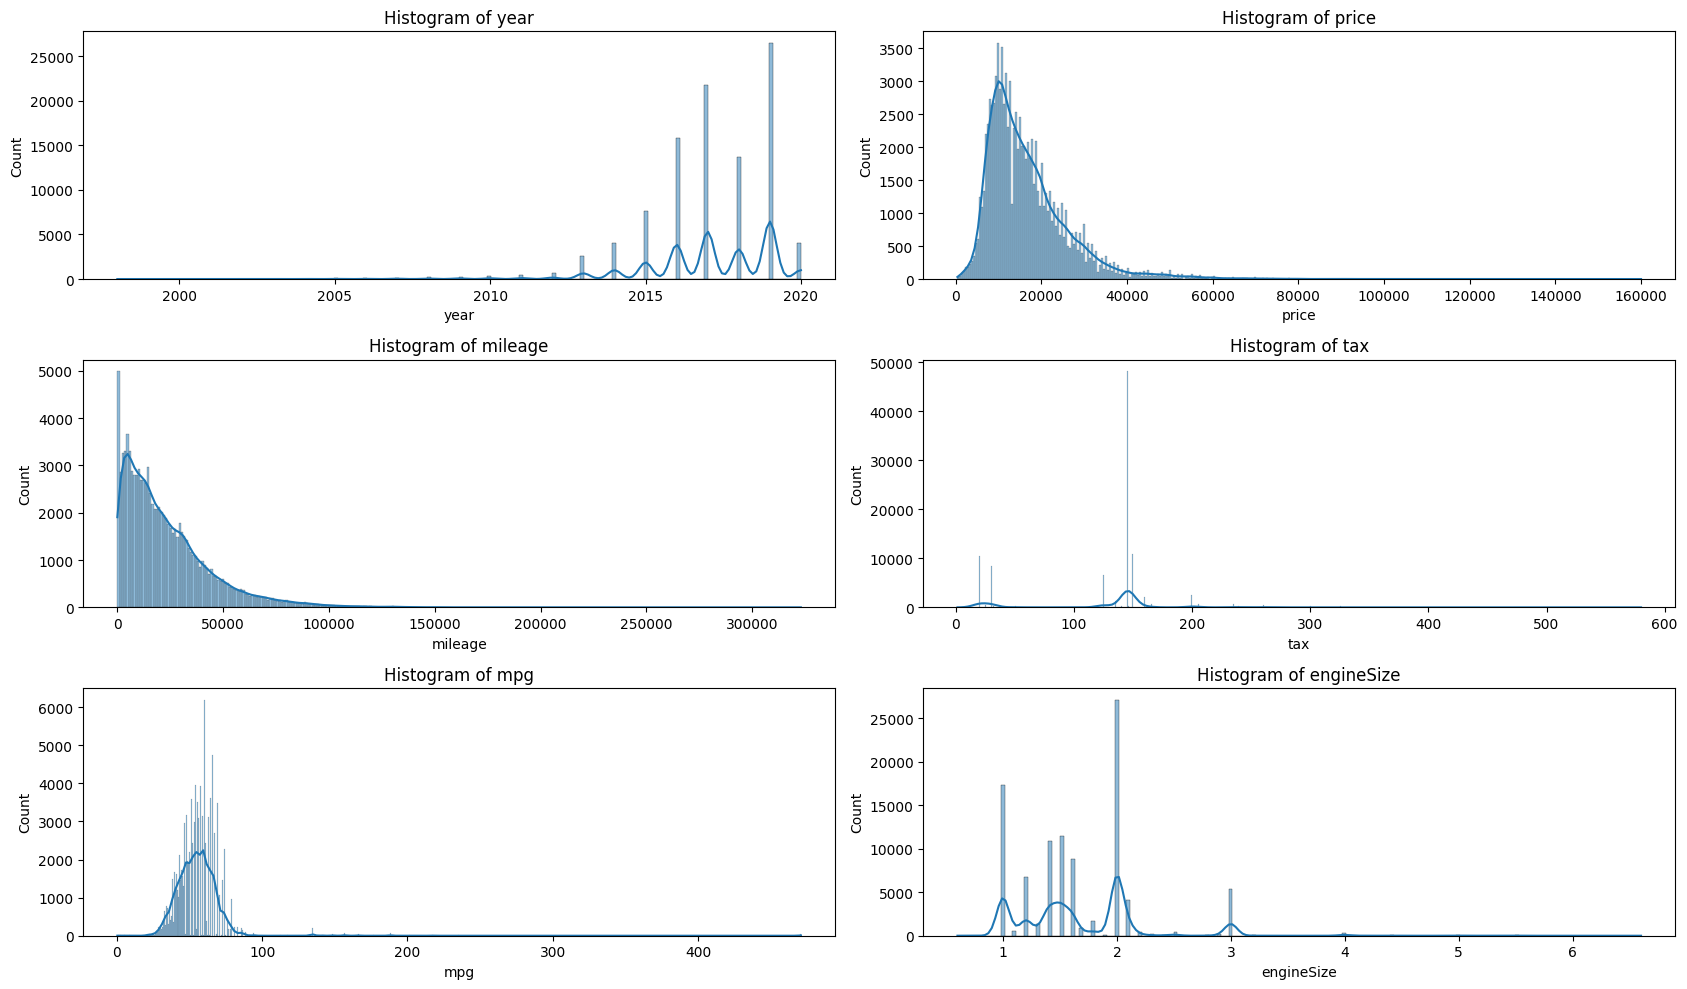

In [ ]:
# Distrubution of values using Histograms for numerical features
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = ['year' ,'price', 'mileage', 'tax', 'mpg', 'engineSize']

plt.figure(figsize=(17, 10))
for i, column in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(clean_data[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

<ipython-input-6-fad9da1e9d81>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=clean_data[column], order=clean_data[column].value_counts().index, palette='coolwarm')


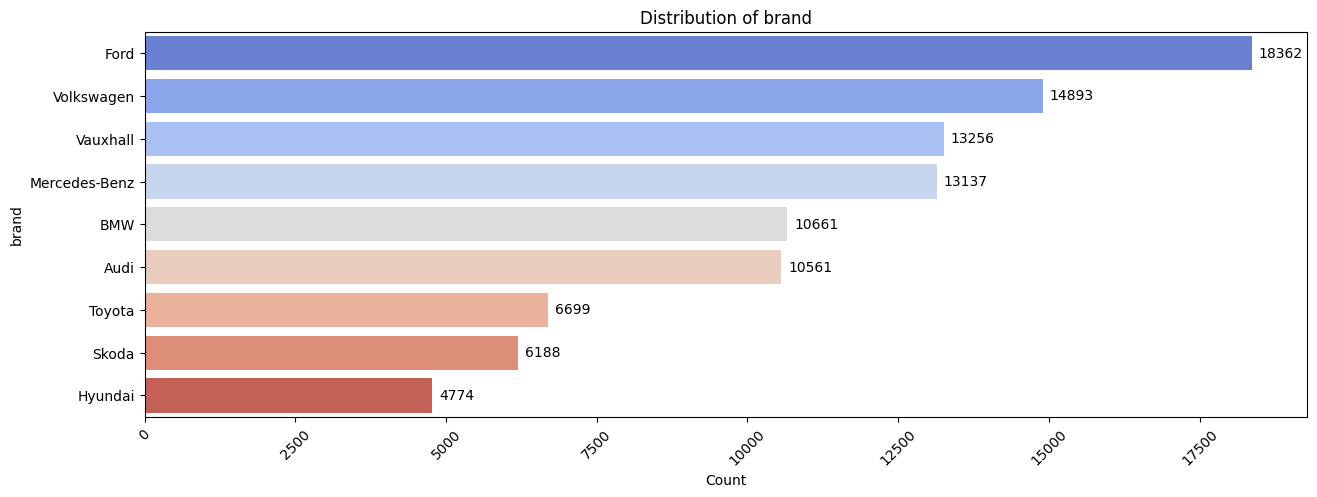

<ipython-input-6-fad9da1e9d81>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=subset_data[column], order=top_models, palette='coolwarm')


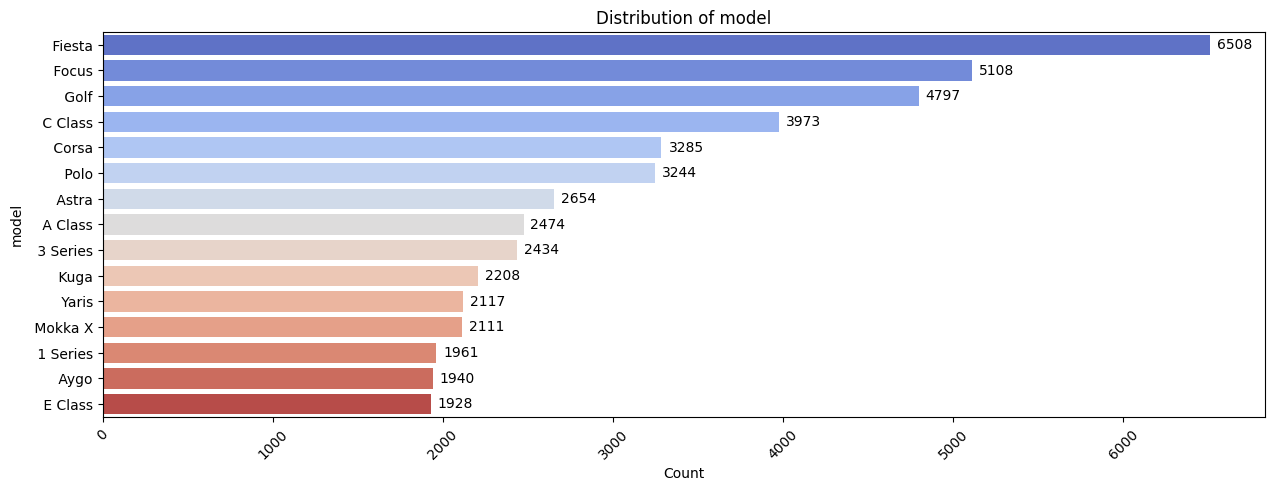

<ipython-input-6-fad9da1e9d81>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=clean_data[column], order=clean_data[column].value_counts().index, palette='coolwarm')


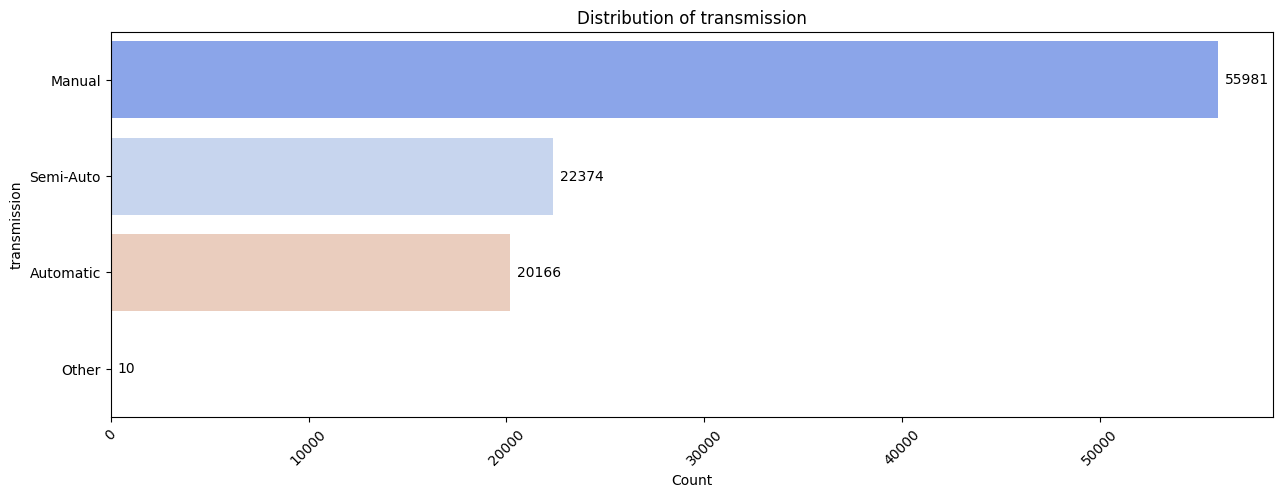

<ipython-input-6-fad9da1e9d81>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=clean_data[column], order=clean_data[column].value_counts().index, palette='coolwarm')


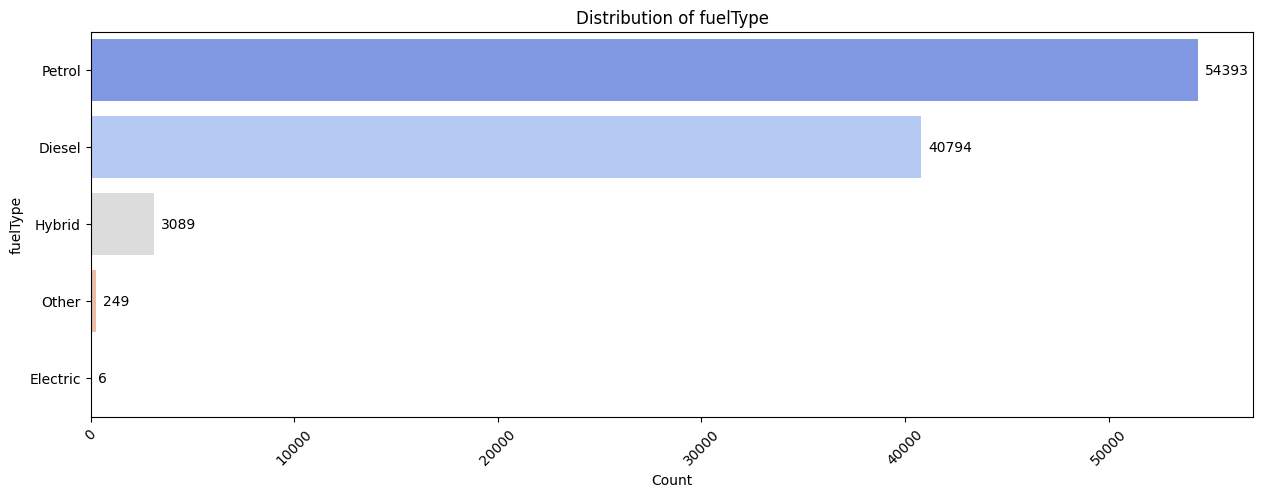

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define categorical features
categorical_features = ['brand','model', 'transmission', 'fuelType']

# Display only top 15 models for readability
top_n = 15
top_models = clean_data['model'].value_counts().nlargest(top_n).index
# Function to add count labels on the bars
def add_count_labels(ax):
    for p in ax.patches:
        count = int(p.get_width())
        if count > 0:  # Only annotate if the count is greater than 0
            ax.annotate(f'{count}', (p.get_width(), p.get_y() + p.get_height() / 2),
                        ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')

# Plotting distributions with appropriate hue and palette settings
for column in categorical_features:
    plt.figure(figsize=(15, 5))
    if column == 'model':
        subset_data = clean_data[clean_data['model'].isin(top_models)]
        ax = sns.countplot(y=subset_data[column], order=top_models, palette='coolwarm')
    else:
        ax = sns.countplot(y=clean_data[column], order=clean_data[column].value_counts().index, palette='coolwarm')
    add_count_labels(ax)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
# Count the occurrences of each brand
model_count = clean_data['brand'].value_counts().reset_index()
model_count.columns = ['brand', 'count']
# Calculate percentage
total_count = model_count['count'].sum()
model_count['percentage'] = (model_count['count'] / total_count) * 100
# Calculate the number of unique models for each brand
unique_models_count = clean_data.groupby('brand')['model'].nunique().reset_index()
unique_models_count.columns = ['brand', 'unique_models_count']

# Merge the dataframes
model_count = pd.merge(model_count, unique_models_count, on='brand')
# Create a custom hover text
model_count['text'] = model_count.apply(
    lambda row: f"{row['brand']}<br>Count: {row['count']}<br>Percentage: {row['percentage']:.2f}%<br>Unique Models: {row['unique_models_count']}",
    axis=1)
# Plot Treemap
fig = px.treemap(model_count, path=['brand'], values='count', title="Popularity of Car Brands",
                 hover_data={'count': True, 'percentage': True, 'unique_models_count': True}, custom_data=['text'])

# Update the trace to show the custom text
fig.update_traces(textinfo="label+text+value", texttemplate="%{customdata[0]}")
fig.show()



In [ ]:
import pandas as pd
import plotly.express as px

# Create a DataFrame that includes both model and brand
model_brand_count = clean_data.groupby(['model', 'brand']).size().reset_index(name='count')
# Calculate percentage
total_count = model_brand_count['count'].sum()
model_brand_count['percentage'] = (model_brand_count['count'] / total_count) * 100

# Create a custom hover text
model_brand_count['text'] = model_brand_count.apply(
    lambda row: f"{row['model']} ({row['brand']})<br>Count: {row['count']}<br>Percentage: {row['percentage']:.2f}%", axis=1
)
# Plot Treemap
fig = px.treemap(model_brand_count, path=['model'], values='count', title="Popularity of Car Models",
                 hover_data={'count': True, 'percentage': True}, custom_data=['text'])

# Update the trace to show the custom text
fig.update_traces(textinfo="label+text+value", texttemplate="%{customdata[0]}")

fig.show()


<ipython-input-9-d8c282cc063f>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-9-d8c282cc063f>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-9-d8c282cc063f>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-9-d8c282cc063f>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-9-d8c282cc063f>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be

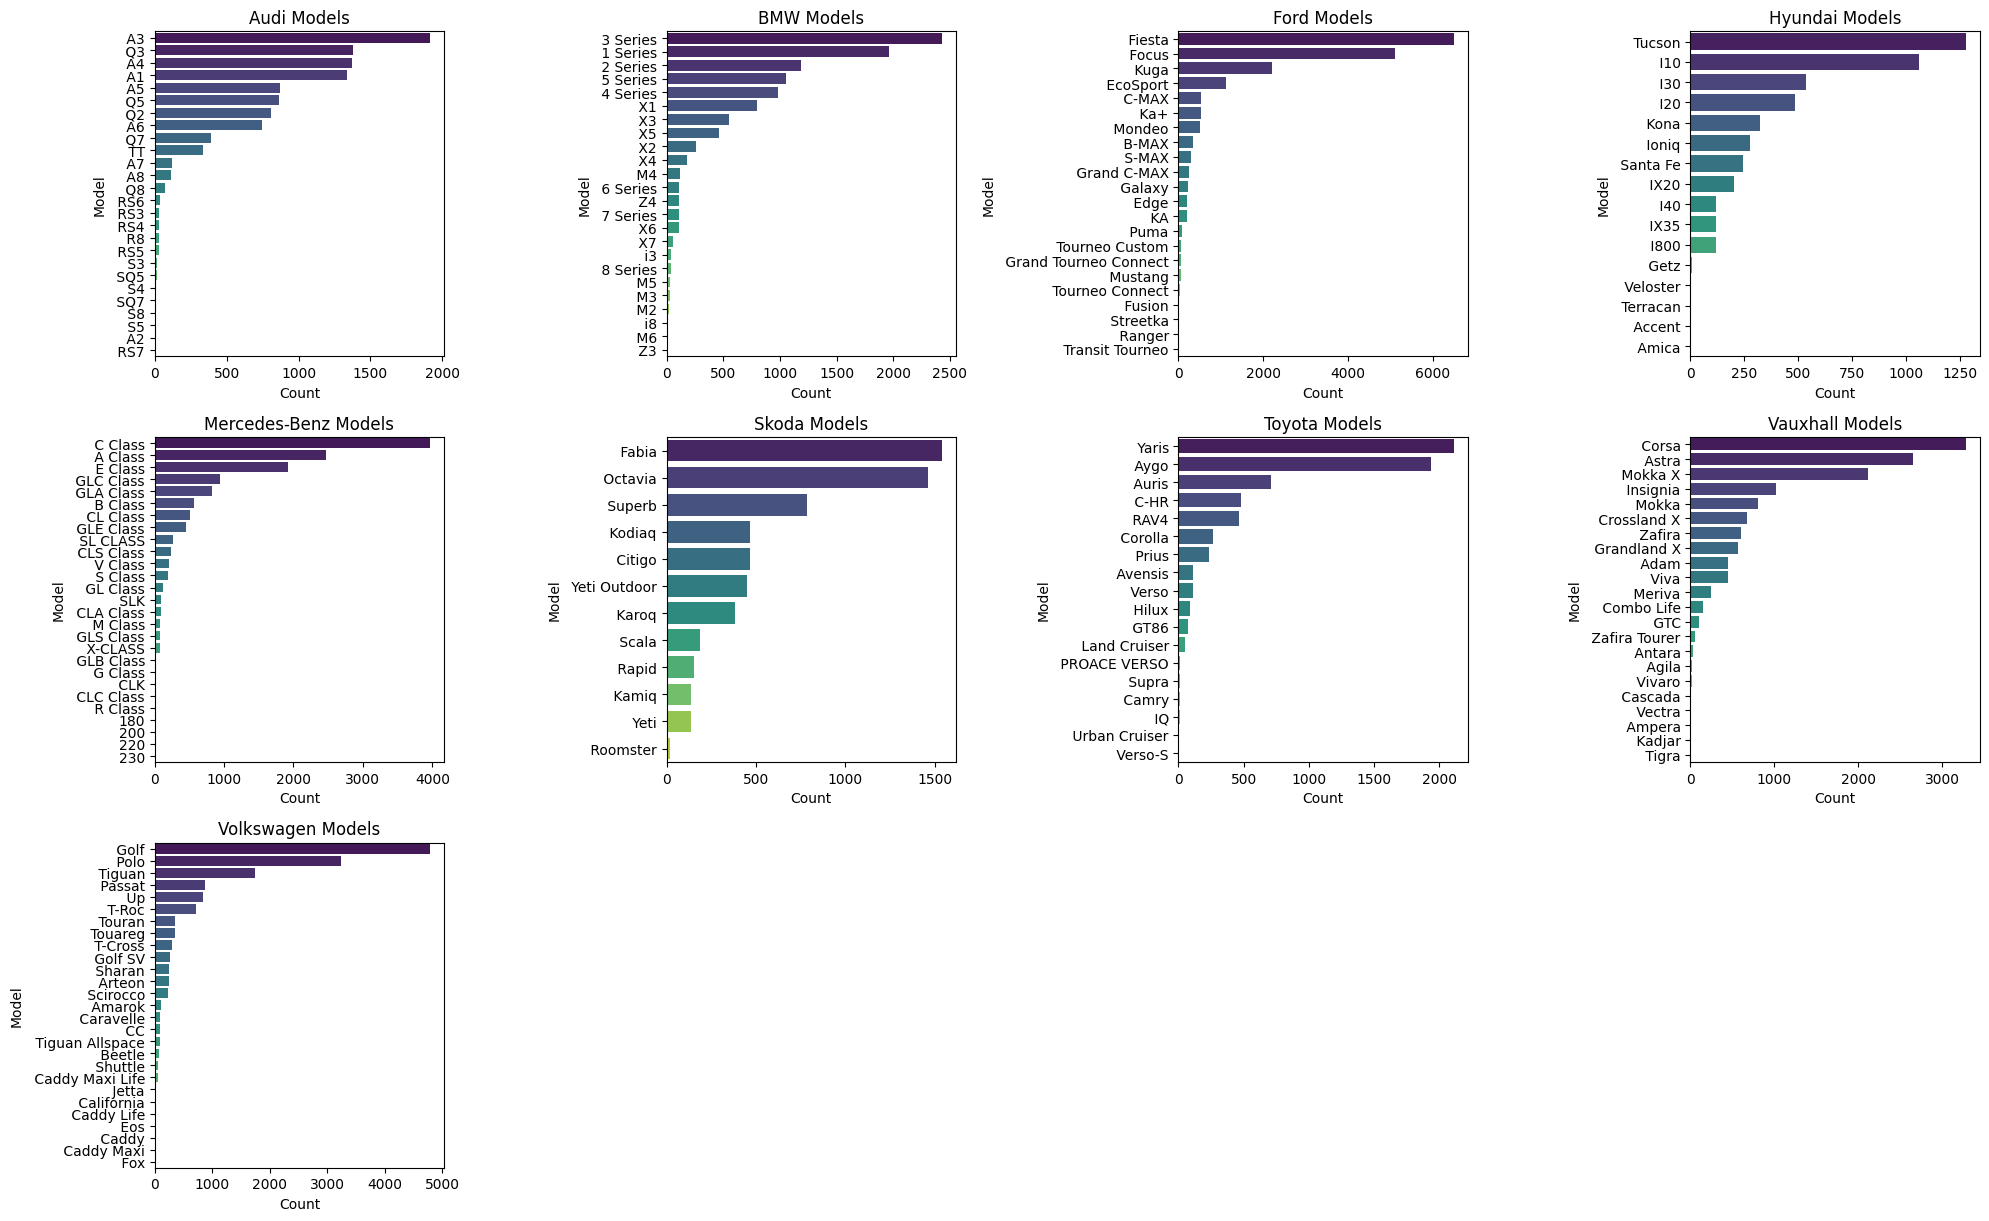

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the count of each model within each brand
brand_model_count = clean_data.groupby(['brand', 'model']).size().reset_index(name='count')

# Sort the table by brand and count
brand_model_count = brand_model_count.sort_values(by=['brand', 'count'], ascending=[True, False])
# Plot the distribution of models within each brand
brands = clean_data['brand'].unique()
plt.figure(figsize=(20, 20))

for i, brand in enumerate(brands):
    plt.subplot(5, 4, i+1)
    brand_data = brand_model_count[brand_model_count['brand'] == brand]
    sns.barplot(x='count', y='model', data=brand_data, palette='viridis')
    plt.title(f'{brand} Models')
    plt.xlabel('Count')
    plt.ylabel('Model')
plt.tight_layout()
plt.show()


# BIVARIATE ANALYSIS

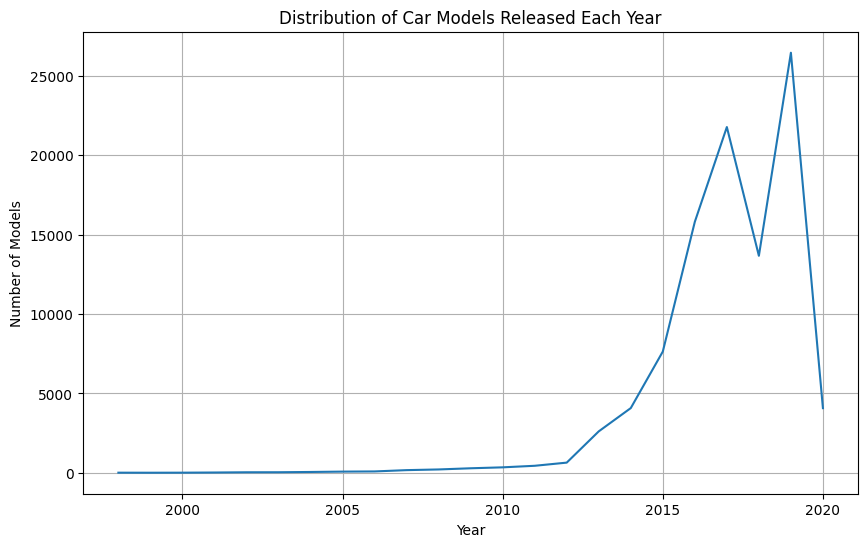

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'year' to datetime and extract year
clean_data['year'] = pd.to_datetime(clean_data['year'], format='%Y').dt.year

# Count the number of models released each year
models_per_year = clean_data['year'].value_counts().sort_index()

# Plot the distribution of car models released each year
plt.figure(figsize=(10, 6))
sns.lineplot(x=models_per_year.index, y=models_per_year.values)
plt.title('Distribution of Car Models Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Models')
plt.grid(True)
plt.show()


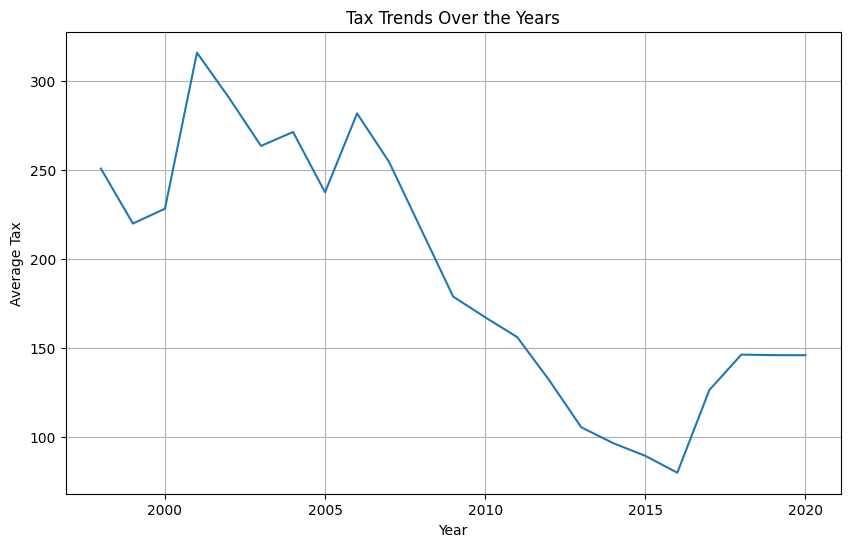

In [ ]:
# Calculate average tax per year
tax_trends = clean_data.groupby('year')['tax'].mean().reset_index()

# Plot the tax trends over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='tax', data=tax_trends)
plt.title('Tax Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Tax')
plt.grid(True)
plt.show()


Insights
Consumer Choices:

Fuel Efficiency as a Selling Point: Brands like Volkswagen and Vauxhall can market their fuel efficiency to attract buyers focused on lower running costs and environmental impact.
Hybrid and Electric Models: Brands with lower average fuel efficiency, such as BMW and Audi, might benefit from expanding their range of hybrid and electric vehicles to improve their average fuel efficiency and appeal to a broader market.
Environmental Impact:

Reducing CO2 Emissions: Higher fuel efficiency typically correlates with lower CO2 emissions, making Volkswagen and Vauxhall potentially more environmentally friendly brands. This can help these brands in markets with stringent emission regulations and among environmentally conscious consumers.
Market Positioning:

Luxury vs. Economy: The chart highlights a potential trade-off between luxury/performance and fuel efficiency. Brands known for luxury and performance, like BMW and Audi, may need to balance their offerings with more fuel-efficient models to meet diverse consumer needs and regulatory requirements.
Future Trends:

Adoption of Green Technologies: As regulations tighten and consumer preferences shift towards sustainability, all brands, particularly those with lower current fuel efficiency, will likely need to innovate and incorporate more green technologies, such as electric and hybrid powertrains, to stay competitive.
Conclusion
This analysis provides valuable insights for the UK automotive industry, highlighting the importance of fuel efficiency in market positioning and consumer preferences. Brands that excel in fuel efficiency can leverage this strength in their marketing and product development strategies. Conversely, brands with lower fuel efficiency might consider expanding their portfolio of efficient models to meet evolving market demands and regulatory standards.

<ipython-input-12-ef4f3b9f34ac>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




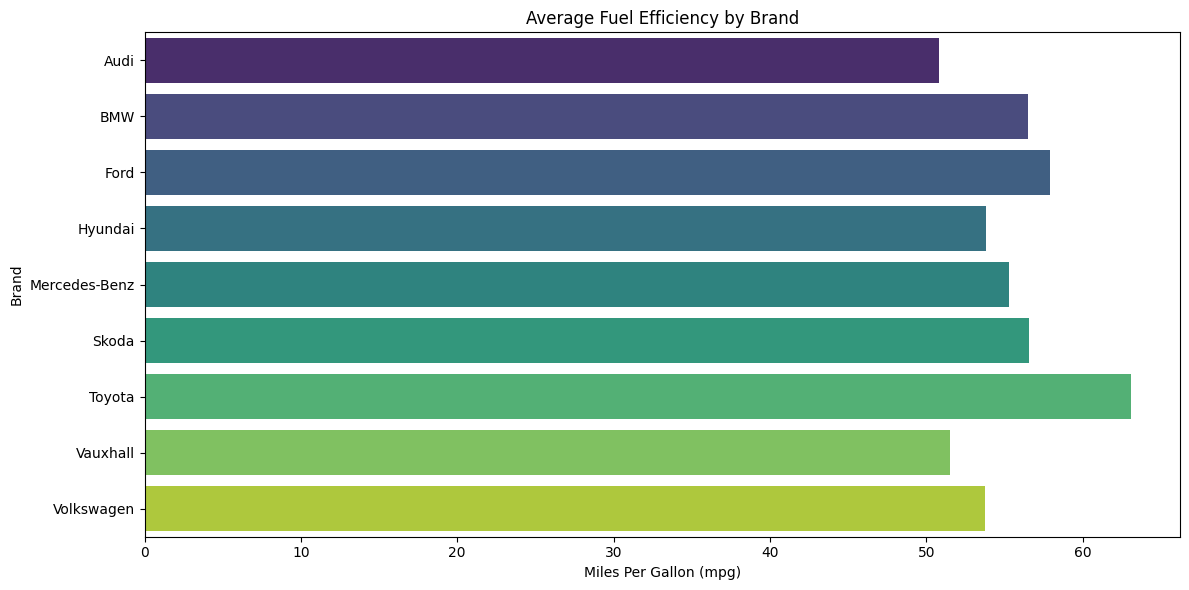

In [ ]:
# Average fuel efficiency (mpg) by brand
brand_fuel_efficiency = clean_data.groupby('brand')['mpg'].mean().reset_index()

# Plot the fuel efficiency for each brand
plt.figure(figsize=(12, 6))
sns.barplot(x='mpg', y='brand', data=brand_fuel_efficiency, palette='viridis')
plt.title('Average Fuel Efficiency by Brand')
plt.xlabel('Miles Per Gallon (mpg)')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


Insights and Analysis:
Brand-Specific Preferences:

Ford has a dominant preference for manual transmission cars, with 86.4% of their models featuring manual transmission.
BMW and Audi show a balanced distribution between automatic, manual, and semi-auto transmissions, with a noticeable preference for semi-auto transmissions.
Volkswagen and Vauxhall also show a strong preference for manual transmissions but have significant segments for semi-auto and automatic transmissions.
Automatic vs. Manual:

Brands like Ford and Vauxhall have a higher inclination towards manual transmissions, which might be due to their focus on more economical models where manual transmissions are more common.
Brands such as BMW and Audi have a more balanced mix, with a notable presence of semi-auto and automatic transmissions, reflecting their focus on higher-end models and performance cars.
Semi-Auto Transmissions:

Semi-auto transmissions are more prevalent in luxury and performance brands such as BMW, Audi, and Mercedes-Benz. This trend aligns with the preference for advanced transmission systems in high-performance and luxury vehicles.
Manual Transmission Decline:

The data indicates that while manual transmissions are still prevalent in some brands, there is a significant shift towards automatic and semi-auto transmissions in luxury and performance segments. This trend could be attributed to the convenience and advanced technology offered by automatic and semi-auto transmissions.
Market Positioning:

Ford's strong preference for manual transmissions could suggest a focus on traditional, economical models, whereas brands like BMW and Audi cater to a market that demands advanced and varied transmission options.
Toyota shows a balanced mix with a notable percentage of automatic transmissions, indicating their focus on a broad market range, including family and utility vehicles.
Strategic Implications for the UK Automotive Industry:
Adapting to Market Trends:

Manufacturers need to adapt to the growing preference for automatic and semi-auto transmissions, especially in the luxury and performance segments.
Brands focusing heavily on manual transmissions might consider diversifying their offerings to include more automatic options to stay competitive.
Targeted Marketing:

Marketing strategies should highlight the advanced transmission options available in luxury and performance models to attract tech-savvy and performance-oriented customers.
Brands with a strong manual transmission base could emphasize the driving experience and control offered by manual cars in their marketing campaigns.
Product Development:

Continuous innovation in transmission technology, particularly in developing more efficient and responsive automatic and semi-auto transmissions, will be crucial.
Investing in hybrid and electric transmission systems will also be essential as the market shifts towards more sustainable vehicle options.

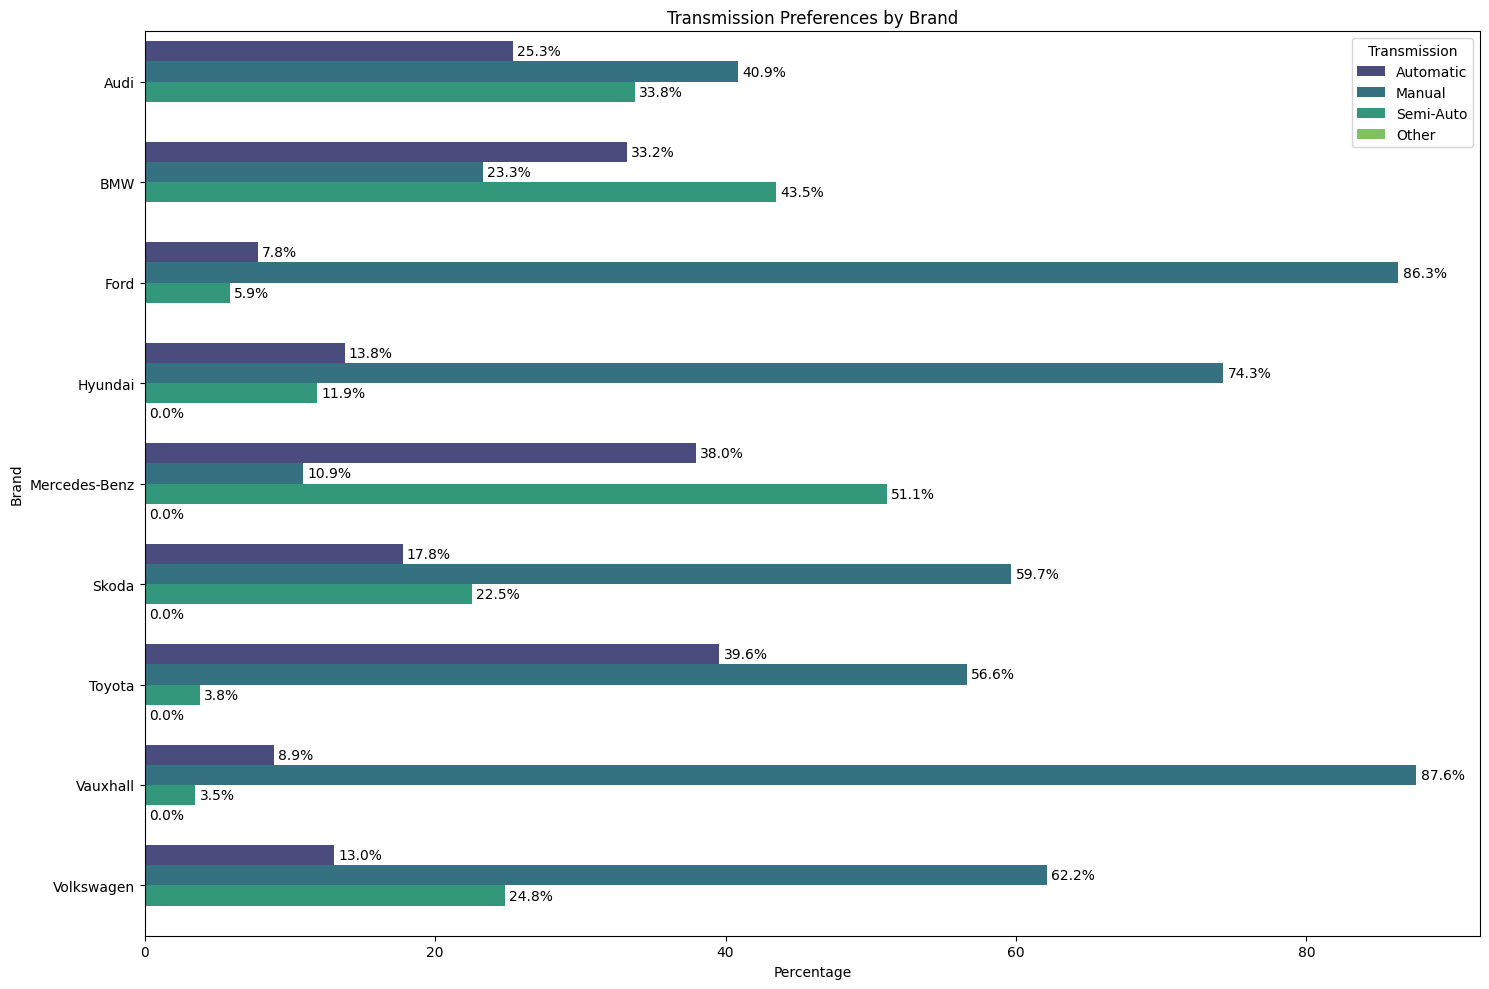

In [ ]:
#Transmission Preferences by brand
# Count of each transmission type by brand
transmission_count = clean_data.groupby(['brand', 'transmission']).size().reset_index(name='count')

# Calculate percentage for each transmission type within its brand
brand_total = transmission_count.groupby('brand')['count'].transform('sum')
transmission_count['percentage'] = (transmission_count['count'] / brand_total) * 100

# Plot the transmission preferences for each brand
plt.figure(figsize=(15, 10))
bar_plot = sns.barplot(x='percentage', y='brand', hue='transmission', data=transmission_count, palette='viridis')
plt.title('Transmission Preferences by Brand')
plt.xlabel('Percentage')
plt.ylabel('Brand')
plt.legend(title='Transmission')

# Add percentage labels at the end of each bar
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)
plt.tight_layout()
plt.show()


Analysis and Insights
Diesel Dominance in BMW and Mercedes-Benz:

BMW: A significant 65.5% of BMW cars use diesel. This high percentage indicates BMW's historical reliance on diesel engines, likely due to their fuel efficiency and performance benefits, especially in European markets where diesel has traditionally been popular.
Mercedes-Benz: Similarly, 70.0% of Mercedes-Benz cars are diesel-powered. Mercedes-Benz has been known for its robust diesel engines, which have been a staple in their luxury and commercial vehicles.
Petrol Preference in Ford, Hyundai, and Vauxhall:

Ford: 67.4% of Ford cars run on petrol. This preference for petrol engines may be due to the brand's focus on smaller, economical vehicles, and a significant presence in markets like the U.S., where petrol is more popular.
Hyundai: With 59.4% of its cars using petrol, Hyundai shows a strong preference for petrol engines, reflecting its broad range of economical and compact cars.
Vauxhall: An overwhelming 79.1% of Vauxhall cars are petrol-powered, indicating a similar trend towards economical and accessible petrol vehicles.
High Hybrid Adoption in Toyota and Hyundai:

Toyota: Known for its pioneering work with hybrid technology, especially with models like the Prius, 30.5% of Toyota cars are hybrids. This aligns with Toyota’s global strategy to push for more environmentally friendly and fuel-efficient cars.
Hyundai: Hyundai also shows a notable percentage (7.1%) of hybrid cars, which indicates its investment in hybrid technology to cater to the growing market demand for eco-friendly vehicles.
Electric Vehicle Presence in Hyundai:

Hyundai: 7.1% of Hyundai cars are electric, showing the brand’s forward-thinking approach and investment in electric vehicle (EV) technology. Hyundai's push into the EV market is evident with models like the Hyundai Kona Electric and Ioniq Electric.
Overall Fuel Type Trends:

Diesel: Despite the recent push towards greener alternatives, brands like BMW and Mercedes-Benz still have a large percentage of diesel cars, reflecting their historical market strategy.
Petrol: Brands like Ford, Hyundai, and Vauxhall show a strong preference for petrol, aligning with their market segments and geographical focus.
Hybrid and Electric: Toyota leads in hybrid technology, while Hyundai is notable for its efforts in both hybrid and electric vehicles, showcasing the industry’s shift towards sustainable mobility.
Insights for the UK Automotive Industry
Shift Towards Electrification:

The presence of electric and hybrid vehicles, especially in brands like Toyota and Hyundai, suggests a growing consumer interest in sustainable and eco-friendly cars. The UK automotive industry should invest more in EV infrastructure and incentivize the production and purchase of electric and hybrid vehicles.
Diesel Decline and Regulatory Impact:

With the UK's regulatory environment becoming increasingly stringent on diesel emissions, brands with a high percentage of diesel cars like BMW and Mercedes-Benz may need to accelerate their transition to cleaner alternatives to meet future compliance and consumer demand.
Market Opportunities:

Brands that focus on petrol and hybrid vehicles, such as Ford and Toyota, may find growing market opportunities as consumers shift away from diesel. Additionally, increasing hybrid and electric offerings could capture a more eco-conscious market segment.
Investment in Technology:

Investment in new technologies, especially in electric and hybrid systems, could be crucial for brands to stay competitive. This involves not only developing new models but also enhancing the efficiency and affordability of these technologies.

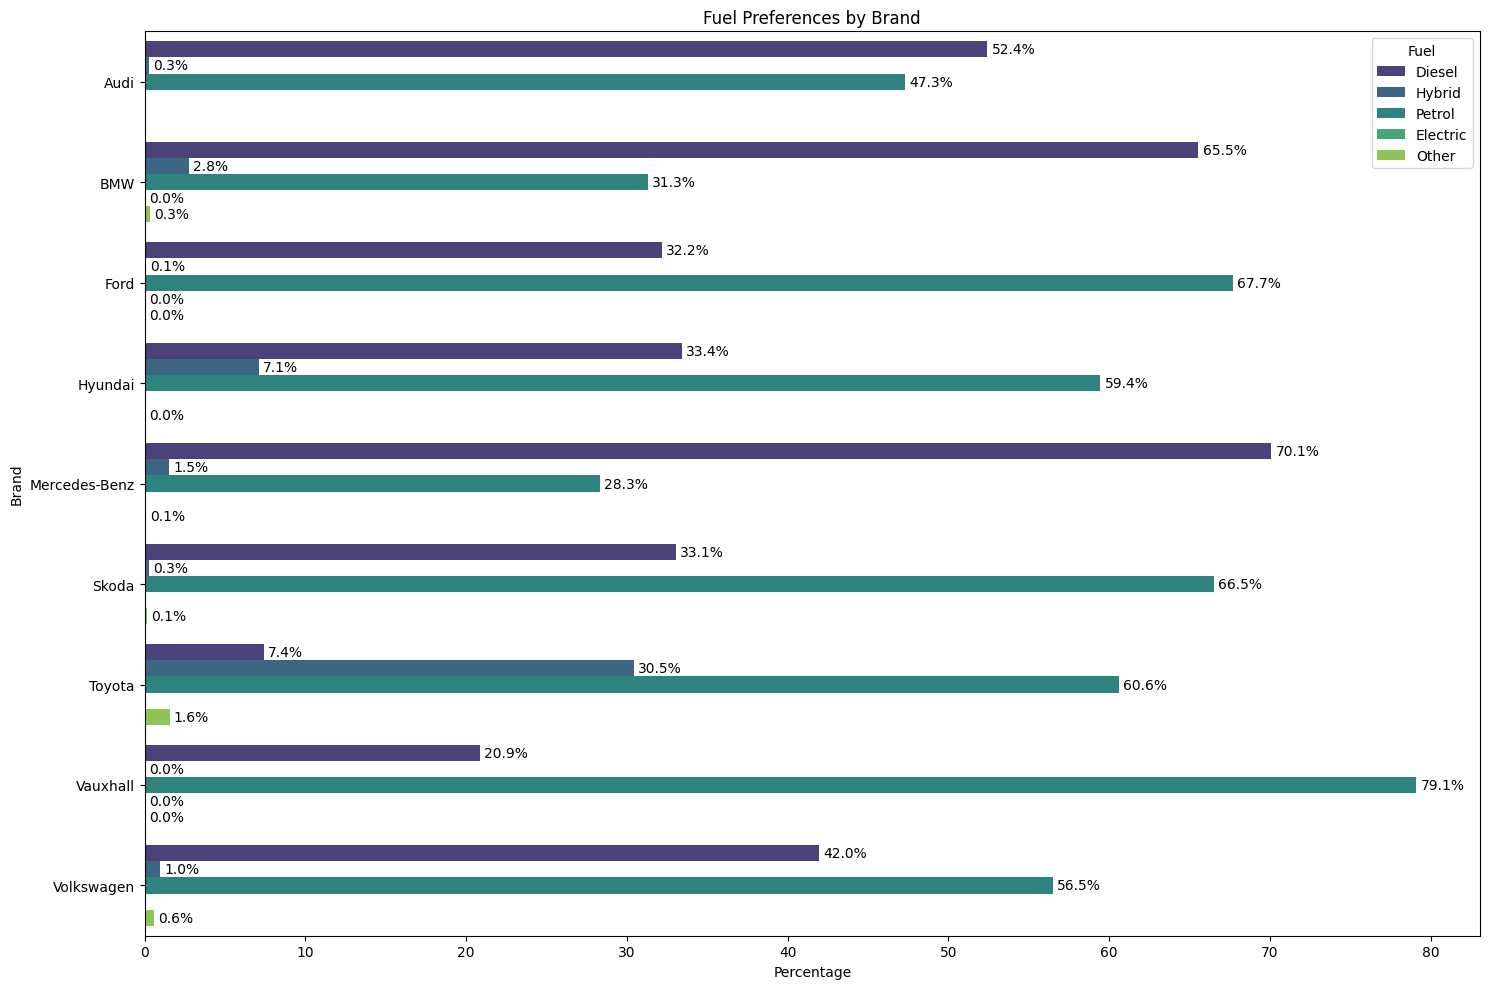

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each fuel type by brand
fuel_count = clean_data.groupby(['brand', 'fuelType']).size().reset_index(name='count')
# Calculate percentage for each fuel type within its brand
brand_total = fuel_count.groupby('brand')['count'].transform('sum')
fuel_count['percentage'] = (fuel_count['count'] / brand_total) * 100

# Plot the fuel preferences for each brand
plt.figure(figsize=(15, 10))
bar_plot = sns.barplot(x='percentage', y='brand', hue='fuelType', data=fuel_count, palette='viridis')
plt.title('Fuel Preferences by Brand')
plt.xlabel('Percentage')
plt.ylabel('Brand')
plt.legend(title='Fuel')

# Add percentage labels at the end of each bar
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Group by brand and model, and count the occurrences
brand_model_count = clean_data.groupby(['brand', 'model']).size().reset_index(name='count')

# Calculate the percentage for each model within its brand
brand_total = brand_model_count.groupby('brand')['count'].transform('sum')
brand_model_count['percentage'] = (brand_model_count['count'] / brand_total) * 100

# Sort the table by percentage in descending order
brand_model_count = brand_model_count.sort_values(by='percentage', ascending=False)

# Change the pandas display settings to show more rows
pd.set_option('display.max_rows', None)

# Display the table without the index
print(brand_model_count.to_string(index=False))


        brand                  model  count  percentage
         Ford                 Fiesta   6508   35.442762
   Volkswagen                   Golf   4797   32.209763
       Toyota                  Yaris   2117   31.601732
Mercedes-Benz                C Class   3973   30.242826
       Toyota                   Aygo   1940   28.959546
         Ford                  Focus   5108   27.818320
      Hyundai                 Tucson   1280   26.811898
        Skoda                  Fabia   1544   24.951519
     Vauxhall                  Corsa   3285   24.781231
        Skoda                Octavia   1466   23.691015
          BMW               3 Series   2434   22.830879
      Hyundai                    I10   1061   22.224550
   Volkswagen                   Polo   3244   21.782045
     Vauxhall                  Astra   2654   20.021123
Mercedes-Benz                A Class   2474   18.832306
          BMW               1 Series   1961   18.394147
         Audi                     A3   1917   18

Analysis and Reasoning:
Performance vs. Economy: Brands like Audi, BMW, and Mercedes-Benz, which have higher average engine sizes, focus more on performance and luxury. Larger engines generally provide more power, which is a key selling point for these brands. In contrast, brands like Toyota, Volkswagen, and Vauxhall, which have smaller average engine sizes, are more focused on fuel efficiency, lower emissions, and affordability. These factors are crucial for the economy and mid-size car segments.

Market Positioning: The chart reflects how different brands position themselves in the market. Luxury and performance brands tend to offer vehicles with larger engines, catering to consumers looking for high performance and luxury features. Economy brands prioritize smaller engines to attract cost-conscious consumers who value fuel efficiency.

Environmental Regulations: The data might also reflect the impact of environmental regulations. Brands with a focus on smaller engines are likely aligning with stricter emission norms and fuel economy standards, which are particularly stringent in the European market.

Strategic Implications for the UK Automotive Industry:
Segment Focus: Brands need to align their offerings with consumer demand and regulatory requirements. Understanding the trend in engine sizes can help brands optimize their model lineup to meet market demands.
Innovation in Powertrains: There is a significant opportunity for brands with larger engines to invest in hybrid and electric powertrains to maintain performance while reducing emissions. This shift is critical as environmental concerns and regulations become more stringent.
Marketing Strategies: Brands can tailor their marketing strategies based on their engine size offerings. For instance, brands with larger engines can emphasize performance and luxury, while those with smaller engines can highlight fuel efficiency and cost savings.

<ipython-input-16-634057e18308>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




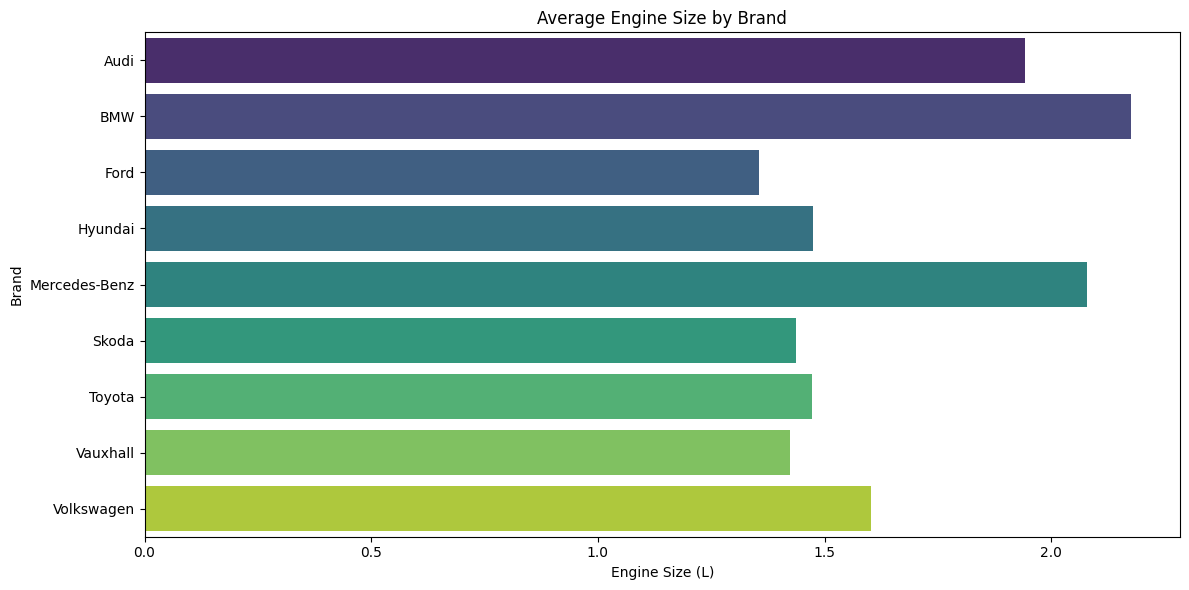

In [ ]:
#Engine Size Analysis

# Average engine size by brand
brand_engine_size = clean_data.groupby('brand')['engineSize'].mean().reset_index()

# Plot the engine size for each brand
plt.figure(figsize=(12, 6))
sns.barplot(x='engineSize', y='brand', data=brand_engine_size, palette='viridis')
plt.title('Average Engine Size by Brand')
plt.xlabel('Engine Size (L)')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


<ipython-input-17-88b2c6f4d237>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




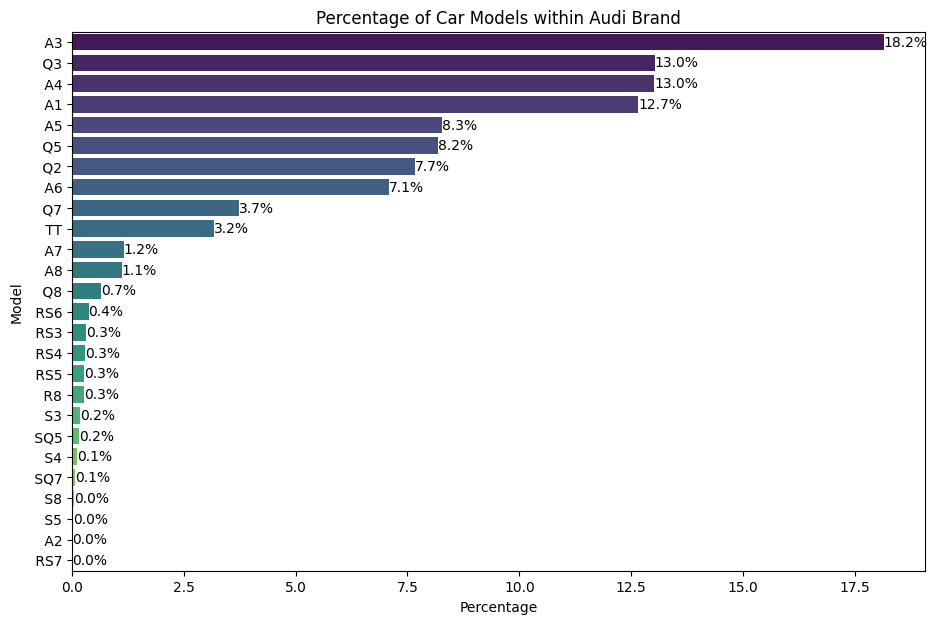

<ipython-input-17-88b2c6f4d237>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




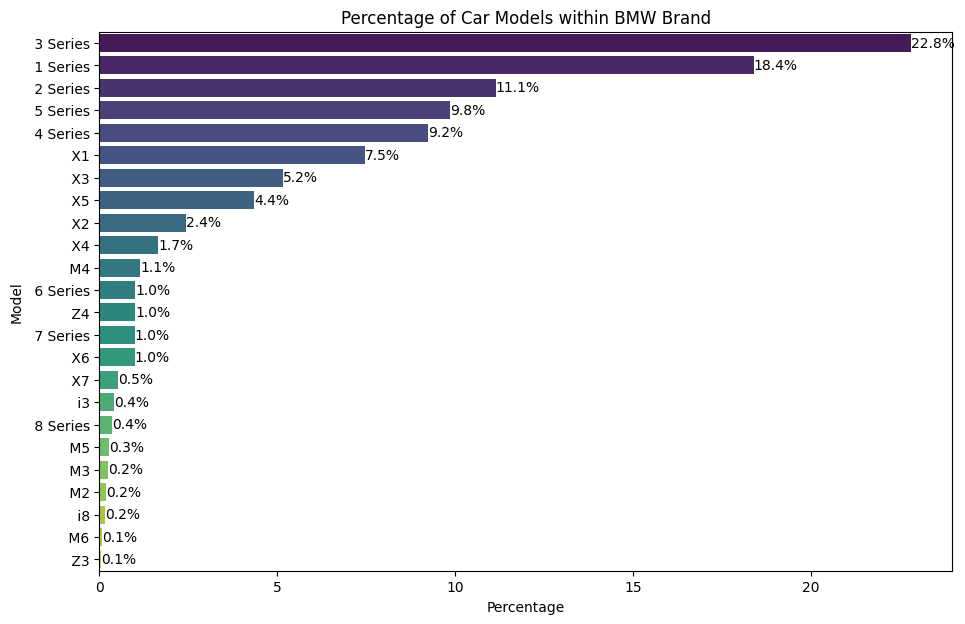

<ipython-input-17-88b2c6f4d237>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




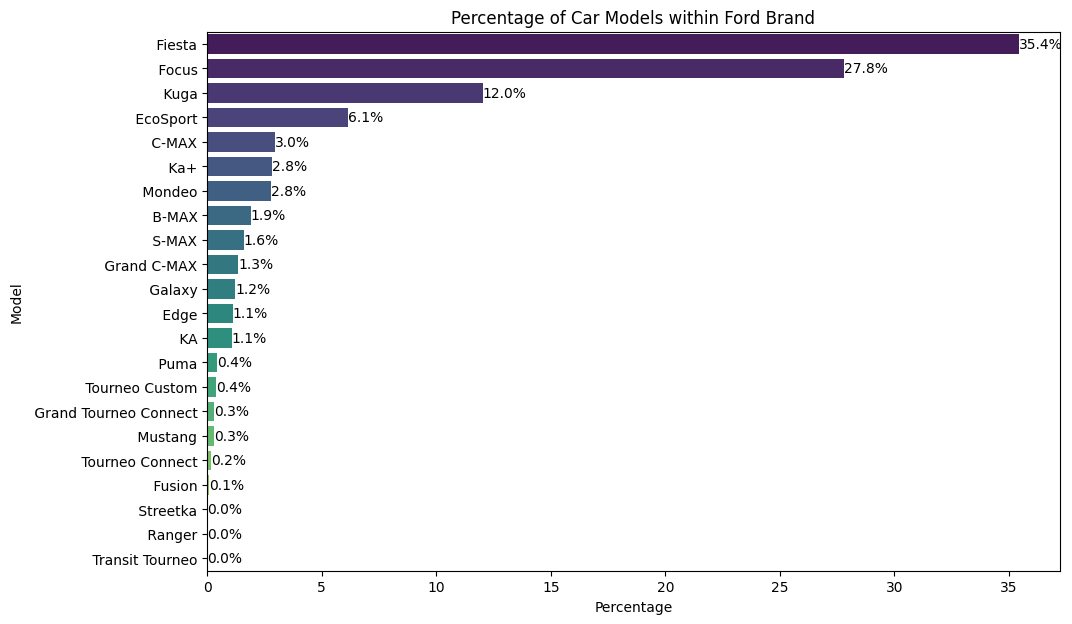

<ipython-input-17-88b2c6f4d237>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




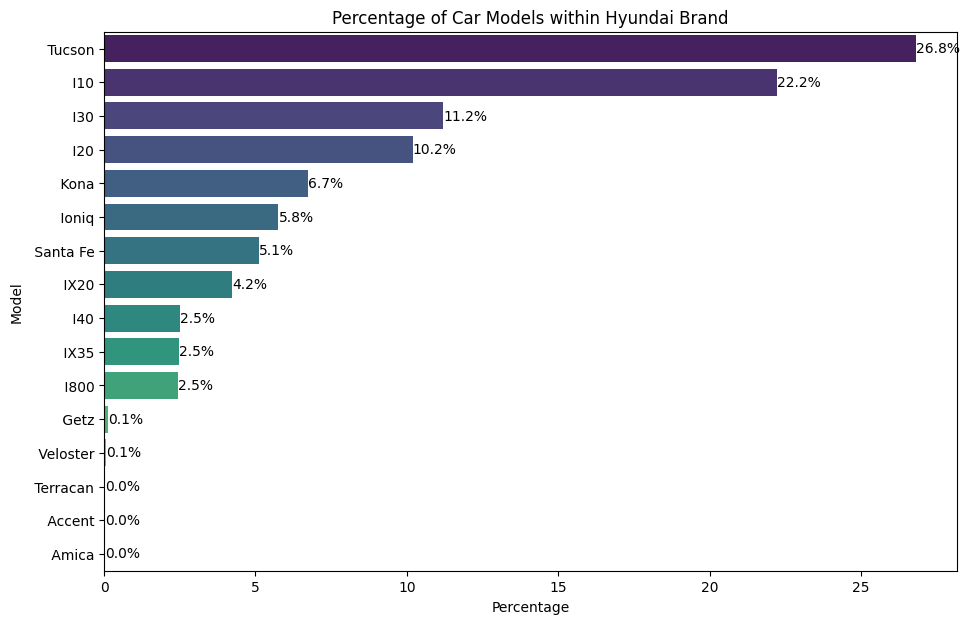

<ipython-input-17-88b2c6f4d237>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




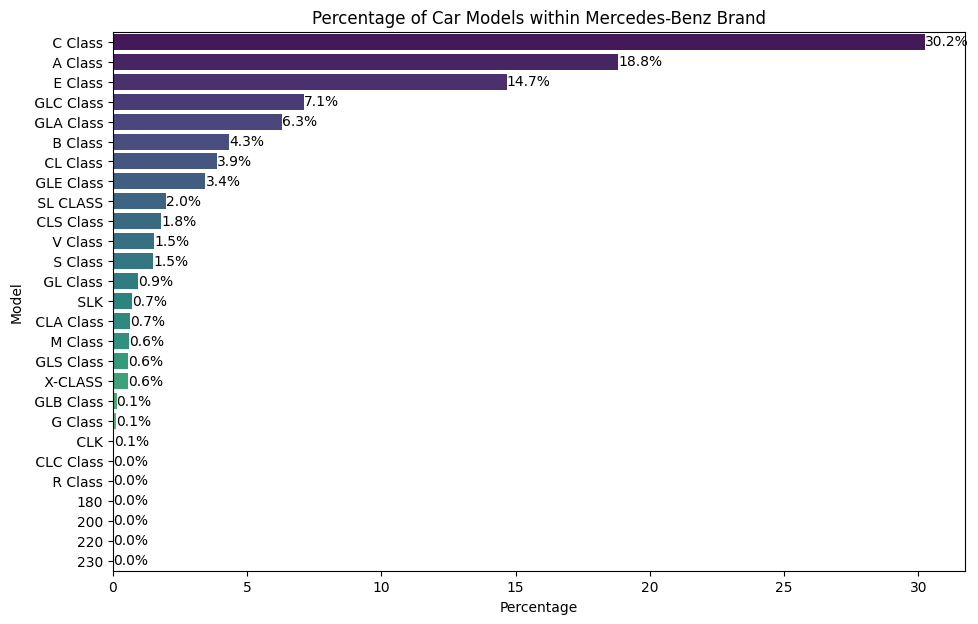

<ipython-input-17-88b2c6f4d237>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




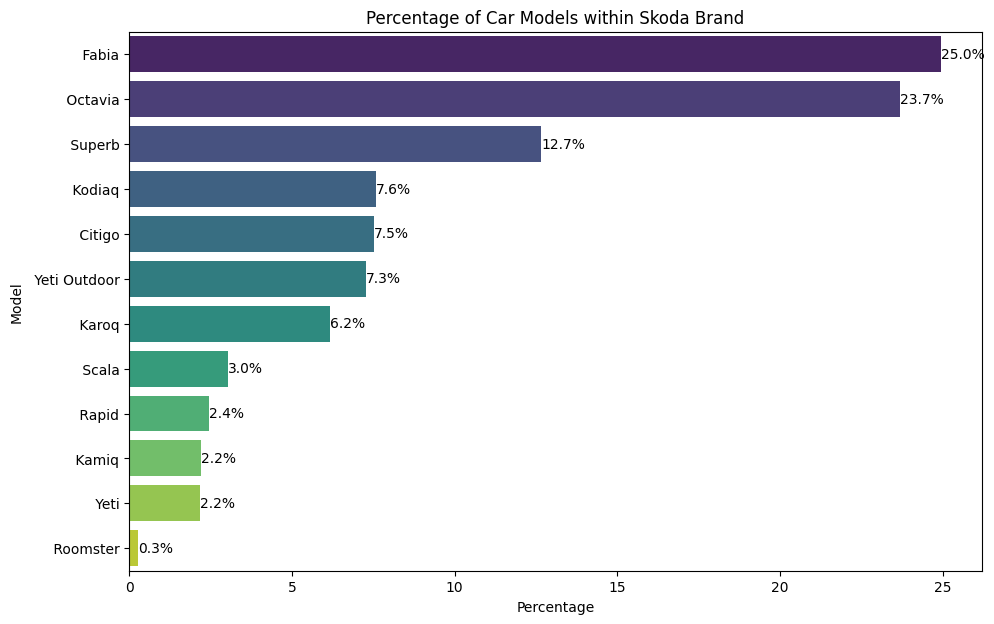

<ipython-input-17-88b2c6f4d237>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




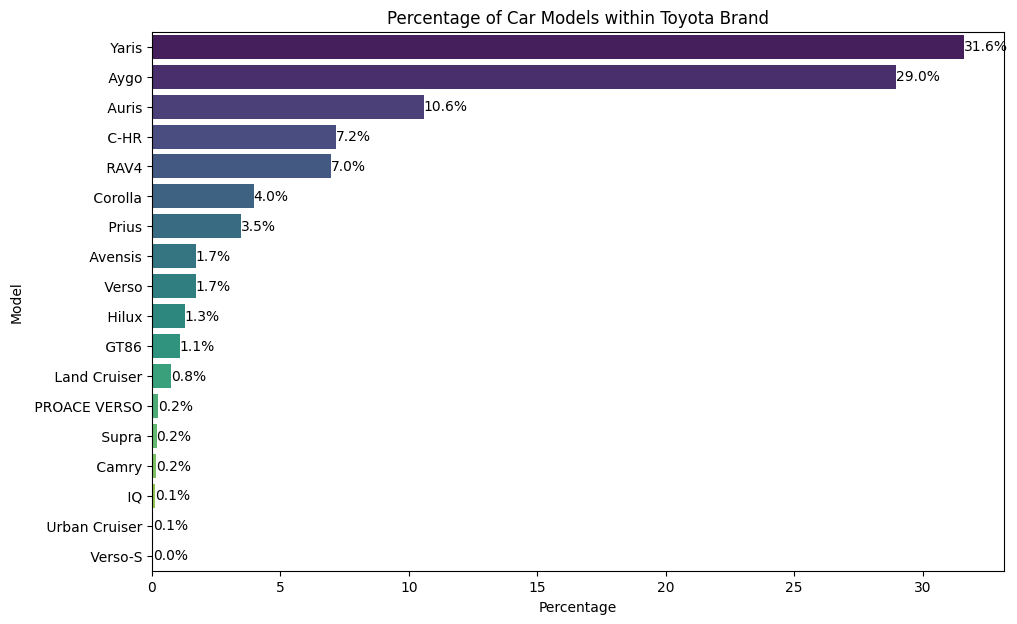

<ipython-input-17-88b2c6f4d237>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




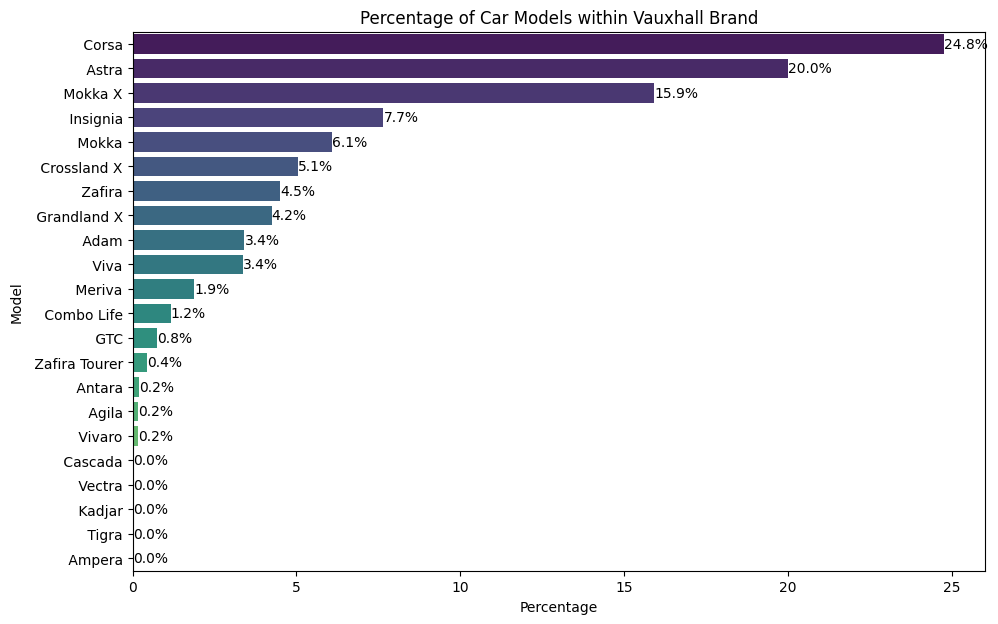

<ipython-input-17-88b2c6f4d237>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




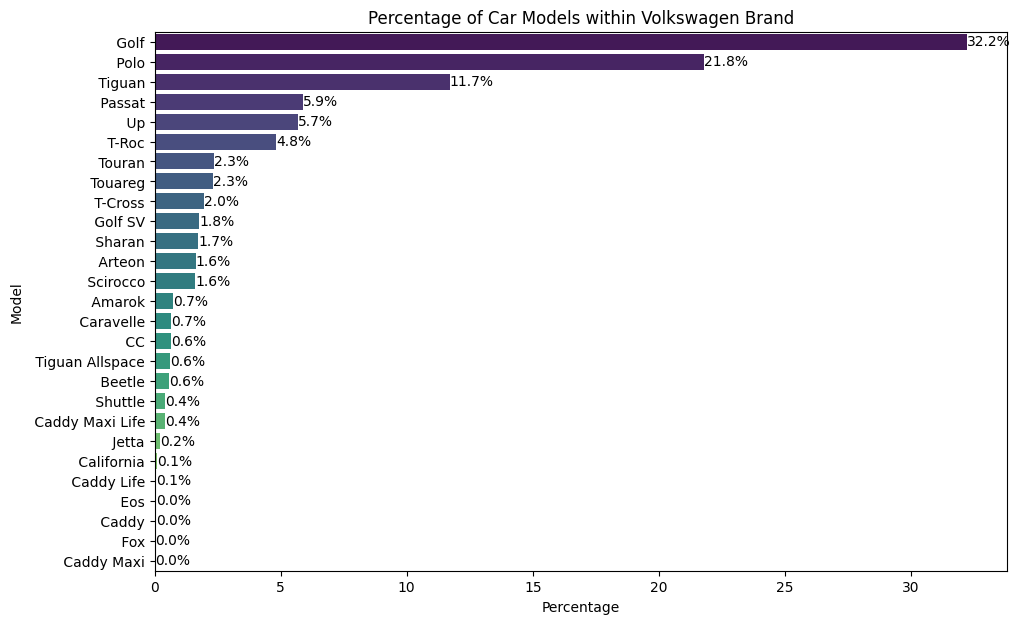

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count and percentage of each model within each brand
brand_model_counts = clean_data.groupby(['brand', 'model']).size().reset_index(name='count')
brand_totals = brand_model_counts.groupby('brand')['count'].sum().reset_index(name='total')
brand_model_counts = brand_model_counts.merge(brand_totals, on='brand')
brand_model_counts['percentage'] = (brand_model_counts['count'] / brand_model_counts['total']) * 100

# Plot the percentage of car models within each brand
unique_brands = brand_model_counts['brand'].unique()

for brand in unique_brands:
    brand_data = brand_model_counts[brand_model_counts['brand'] == brand]
    plt.figure(figsize=(11, 7))
    bar_plot = sns.barplot(x='percentage', y='model', data=brand_data.sort_values('percentage', ascending=False), palette='viridis')

    # Add percentage labels at the end of each bar
    for index, value in enumerate(brand_data.sort_values('percentage', ascending=False)['percentage']):
        bar_plot.text(value + 0.0, index, f'{value:.1f}%', va='center')  # Adjust the position with value + 0.5

    plt.title(f'Percentage of Car Models within {brand} Brand')
    plt.xlabel('Percentage')
    plt.ylabel('Model')
    plt.show()




      Count
year       
2019  26457
2017  21776
2016  15808
2018  13667
2015   7636
2014   4077
2020   4073
2013   2611
2012    642
2011    443
2010    345
2009    286
2008    212
2007    169
2006     87
2005     76
2004     53
2003     36
2002     34
2001     19


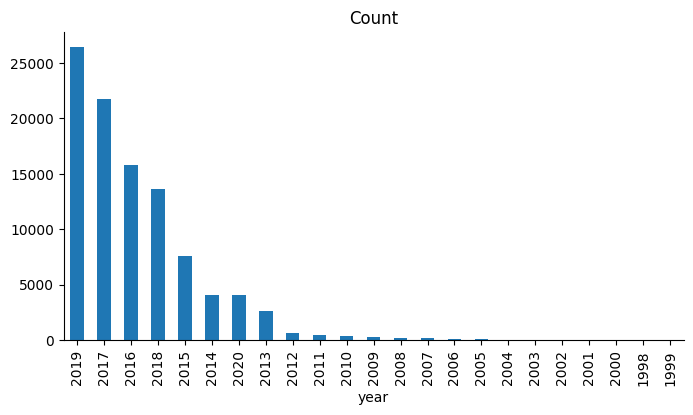

In [ ]:
#Checking the year from which cars are the most popular
model_year = clean_data.groupby('year')['model'].count()
model_year = pd.DataFrame(model_year)
model_year.columns = ['Count']
model_year.sort_values(by=['Count'], inplace=True, ascending=False)
print(model_year.head(20))

from matplotlib import pyplot as plt
model_year['Count'].plot(kind='bar', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

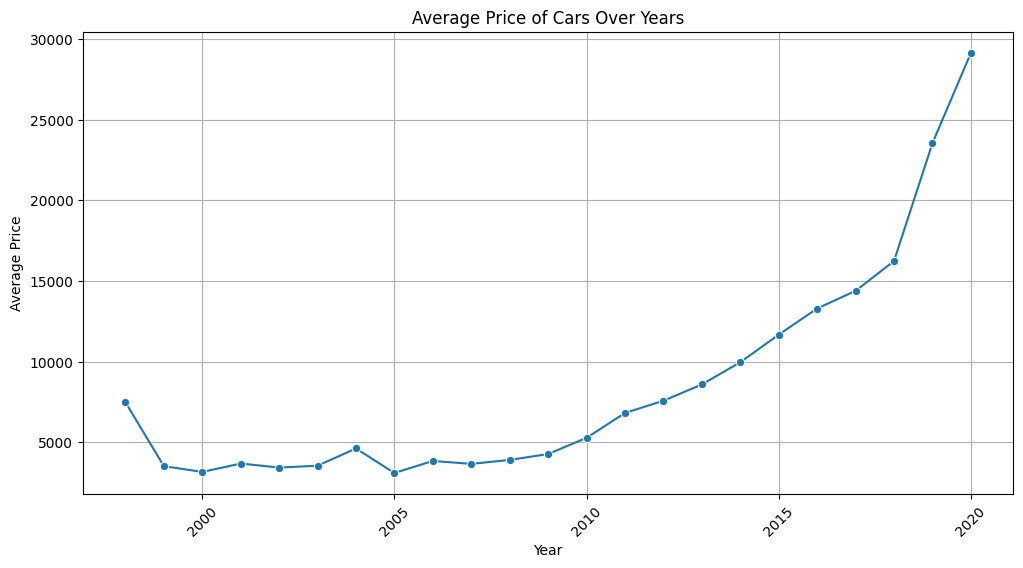

In [ ]:
# Average price over years
average_price_year = clean_data.groupby('year')['price'].mean().reset_index()

# Line plot for average price by year
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='price', data=average_price_year, marker='o')
plt.title('Average Price of Cars Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Interpretation of the Scatter Plot: Year vs. Mileage
Observations:
Distribution Over Time:

Older cars (pre-2005) show a wider range of mileage, with some cars having very high mileage.
Mid-range years (2005-2010) have the most significant spread in mileage, indicating cars from these years have been driven extensively.
Newer cars (post-2015) tend to have lower mileage, which is expected as they haven't been on the road for as long.
Outliers:

There are noticeable outliers with extremely high mileage, particularly around the years 2000-2010.
Few cars from the years 2005-2010 show mileage exceeding 250,000 km, which can be considered very high.
Trend:

There seems to be a general trend where older cars have higher mileage, and newer cars have lower mileage.
The median mileage for each year shows an inverted U-shape, peaking around 2010 and decreasing for cars manufactured more recently.

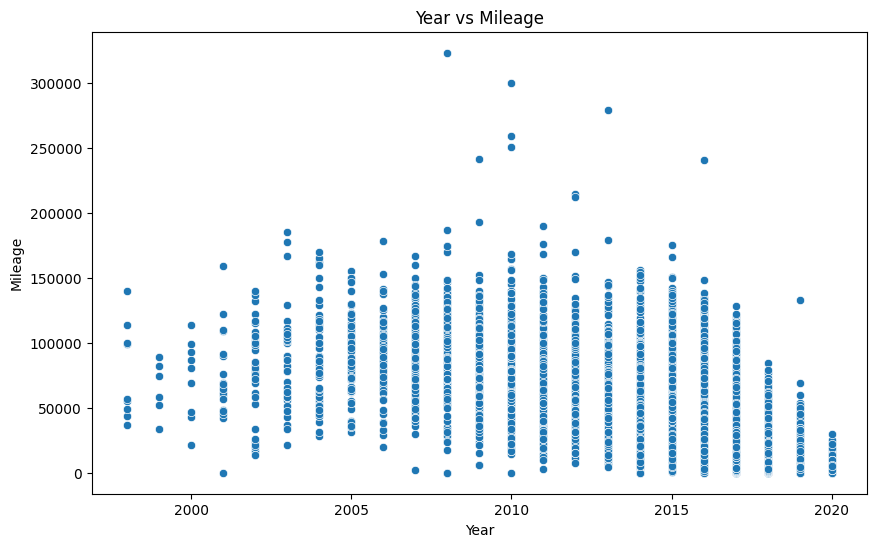

In [ ]:
#Relationship between Year and Mileage
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Year vs. Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='mileage', data=clean_data)
plt.title('Year vs Mileage')
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.show()


In [ ]:
#Hypothesis : Older cars have higher mileage
import pandas as pd
from scipy.stats import spearmanr

# Calculate Spearman rank correlation
correlation, p_value = spearmanr(clean_data['year'], clean_data['mileage'])

print(f"Spearman Rank Correlation: {correlation}, p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between the year of the car and its mileage.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between the year of the car and its mileage.")


Spearman Rank Correlation: -0.8090730202699558, p-value: 0.0
Reject the null hypothesis: There is a significant relationship between the year of the car and its mileage.


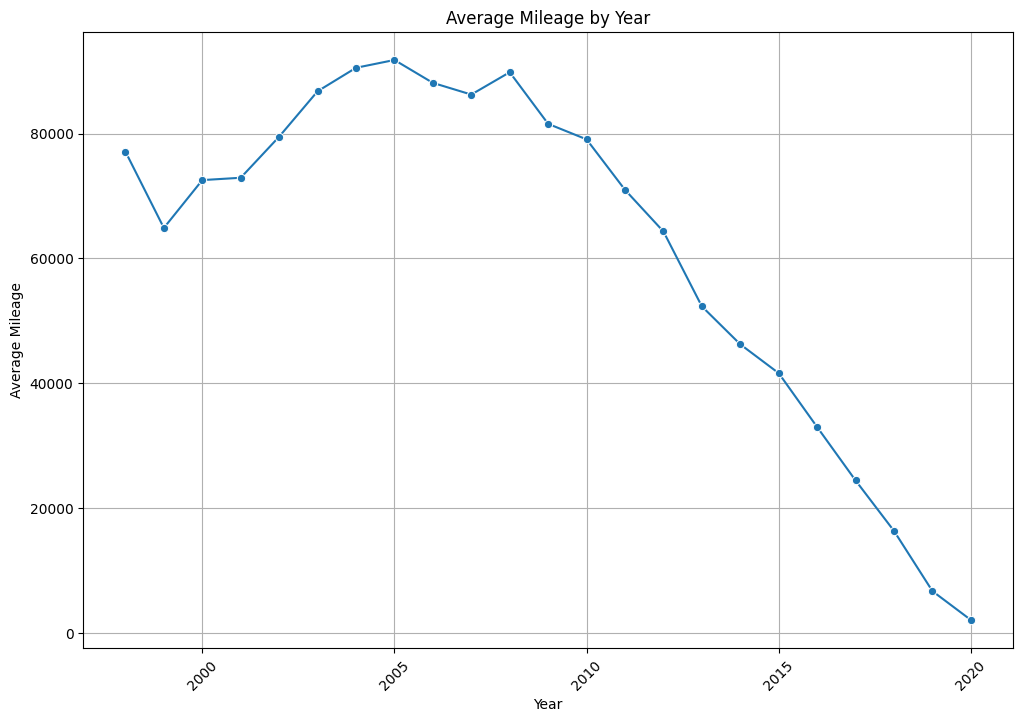

In [ ]:
#Mileage by Year
# Group data by year and calculate the average mileage
average_mileage_by_year = clean_data.groupby('year')['mileage'].mean().reset_index()

# Plotting the average mileage by year using a line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='mileage', data=average_mileage_by_year, marker='o', linestyle='-')
plt.title('Average Mileage by Year')
plt.xlabel('Year')
plt.ylabel('Average Mileage')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Observations:
General Trend:

There is a clear negative correlation between mileage and price. As mileage increases, the price of the car tends to decrease. This trend is consistent across different transmission types.
Transmission Types:

Automatic Transmission:
Cars with automatic transmission are generally priced higher than those with other transmission types, even at higher mileage levels.
Manual Transmission:
Cars with manual transmission tend to cluster towards the lower end of the price spectrum, especially at higher mileage levels.
Semi-Auto Transmission:
Semi-automatic cars show a wide range of prices but generally follow the negative trend between mileage and price.
Other Transmission Types:
These cars are less frequent and spread across the price and mileage spectrum.
Outliers:

There are a few outliers, especially in the high-price, high-mileage range, which could represent luxury or specialty cars that maintain their value despite high mileage.

In [ ]:
import plotly.express as px

# Interactive scatter plot of Price vs Mileage
fig = px.scatter(clean_data, x='mileage', y='price', color='transmission',
                 hover_data=['model', 'year'], title=' Scatter Plot: Price vs Mileage')
fig.show()


In [ ]:
#Hypothesis : Transmission type significantly affects car price.
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA
model = ols('price ~ C(transmission)', data=clean_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# Interpretation
if anova_table["PR(>F)"][0] < 0.05:
    print("Reject the null hypothesis: Transmission type significantly affects car price.")
else:
    print("Fail to reject the null hypothesis: Transmission type does not significantly affect car price.")


                       sum_sq       df             F  PR(>F)
C(transmission)  2.925629e+12      3.0  14442.320084     0.0
Residual         6.652981e+12  98527.0           NaN     NaN
Reject the null hypothesis: Transmission type significantly affects car price.


Interpretation:

General Trend: There is a slight negative correlation between engine size and fuel efficiency (MPG). As the engine size increases, fuel efficiency tends to decrease.
Outliers: Some cars with very high MPG and very low engine sizes might represent electric or hybrid vehicles, or data anomalies.

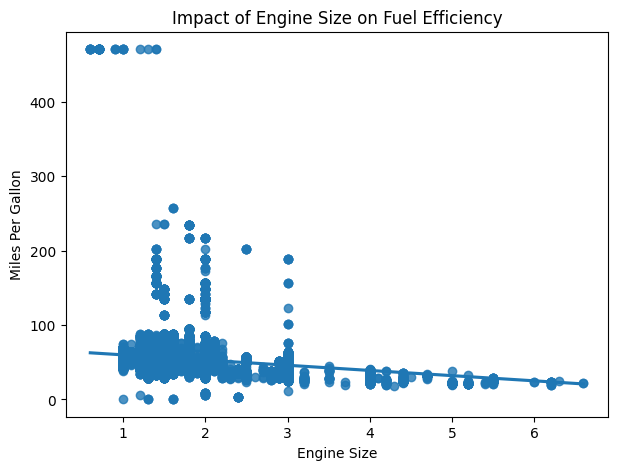

In [ ]:
 #Impact of Engine Size on Fuel Efficiency
 # Scatter plot with trendline
plt.figure(figsize=(7, 5))
sns.regplot(x='engineSize', y='mpg', data=clean_data)
plt.title('Impact of Engine Size on Fuel Efficiency')
plt.xlabel('Engine Size')
plt.ylabel('Miles Per Gallon')
plt.show()


In [ ]:
#Hypothesis: Engine size negatively impacts fuel efficiency
from scipy.stats import pearsonr
# Calculate Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(clean_data['engineSize'], clean_data['mpg'])

print(f"Pearson Correlation: {correlation}")
print(f"p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant negative relationship between engine size and fuel efficiency.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between engine size and fuel efficiency.")

Pearson Correlation: -0.23741684817075903
p-value: 0.0
Reject the null hypothesis: There is a significant negative relationship between engine size and fuel efficiency.


In [ ]:
#popular fuel type
model_fuel= clean_data.groupby('fuelType')['model'].count()
model_fuel.head(20)

fuelType
Diesel      40794
Electric        6
Hybrid       3089
Other         249
Petrol      54393
Name: model, dtype: int64

Interpretation
This heatmap visualizes the relationship between transmission types and fuel types among cars. Here's the interpretation:

Dominant Categories:

Manual Transmission: The majority of cars with manual transmission use diesel and petrol.
Automatic Transmission: The distribution between diesel and petrol is more balanced compared to manual transmission, but still predominantly petrol.
Semi-Automatic Transmission: A significant number of cars use both petrol and diesel.
Other Transmissions: Very few cars fall into this category.
Fuel Types:

Diesel: More common in manual and semi-automatic transmissions.
Petrol: More prevalent in automatic and semi-automatic transmissions.
Electric and Hybrid: Very few cars, mainly associated with automatic and semi-automatic transmissions.
Insights:

There is a strong preference for petrol cars with automatic transmission.
Diesel cars are more common with manual transmission.
The number of electric and hybrid cars is relatively low, which might reflect a smaller market presence.

Chi-square test results: chi2_statistic = 16417.742598402107, p-value = 0.0


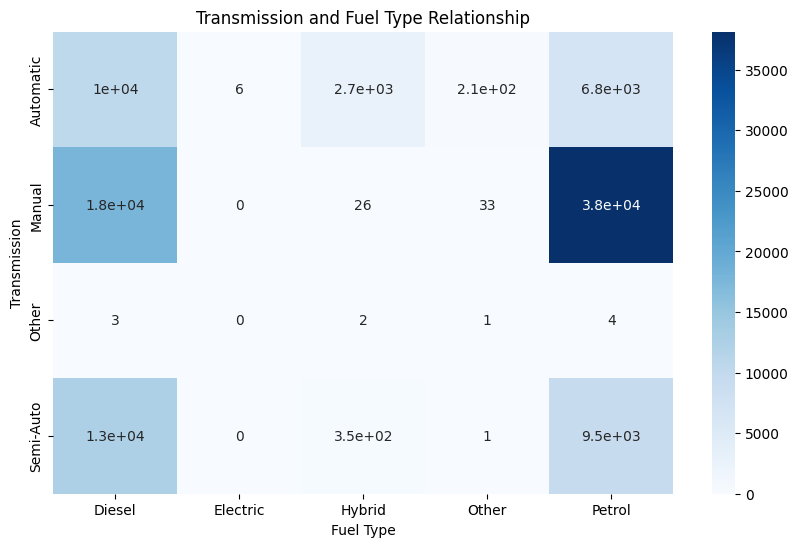

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(clean_data['transmission'], clean_data['fuelType'])

# Perform the Chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square test results: chi2_statistic = {chi2_stat}, p-value = {p_val}")

# Heatmap for transmission and fuel type relationship
contingency_table = pd.crosstab(clean_data['transmission'], clean_data['fuelType'])
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues')
plt.title('Transmission and Fuel Type Relationship')
plt.xlabel('Fuel Type')
plt.ylabel('Transmission')
plt.show()


In [ ]:
#Hypothesis: There is a significant association between transmission type and fuel type.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assuming clean_data is your DataFrame with relevant data
contingency_table = pd.crosstab(clean_data['transmission'], clean_data['fuelType'])
# Perform Chi-Square Test
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")

# Interpretation
if p < 0.05:
    print("Reject the null hypothesis: There is a significant association between transmission type and fuel type.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between transmission type and fuel type.")


Chi-Square Statistic: 16417.742598402107
p-value: 0.0
Reject the null hypothesis: There is a significant association between transmission type and fuel type.


In [ ]:
from scipy.stats import f_oneway

# Separate the data into groups based on fuel type
petrol_prices = clean_data[clean_data['fuelType'] == 'Petrol']['price']
diesel_prices = clean_data[clean_data['fuelType'] == 'Diesel']['price']
hybrid_prices = clean_data[clean_data['fuelType'] == 'Hybrid']['price']
electric_prices = clean_data[clean_data['fuelType'] == 'Electric']['price']
other_prices = clean_data[clean_data['fuelType'] == 'Other']['price']

# Perform the ANOVA test
f_stat, p_value = f_oneway(petrol_prices, diesel_prices, hybrid_prices,electric_prices , other_prices)

print(f"ANOVA results: F-statistic = {f_stat}, p-value = {p_value}")

ANOVA results: F-statistic = 1354.9129425892443, p-value = 0.0


In [ ]:
from scipy.stats import f_oneway

# Separate the data into  groups based on transmission type
manual_prices = clean_data[clean_data['transmission'] == 'Manual']['price']
automatic_prices = clean_data[clean_data['transmission'] == 'Automatic']['price']
semi_automatic_prices = clean_data[clean_data['transmission'] == 'Semi-Auto']['price']
other = clean_data[clean_data['transmission'] == 'Other']['price']


f_stat, p_value = f_oneway(manual_prices, automatic_prices, semi_automatic_prices , other )

print(f"ANOVA results: F-statistic = {f_stat}, p-value = {p_value}")


ANOVA results: F-statistic = 14442.32008442101, p-value = 0.0


Interpretation of "Car Age vs. Price" Scatter Plot
This scatter plot displays the relationship between the age of a car (in years) and its price. Here's the interpretation:

Negative Correlation: There is a clear negative correlation between car age and price. As the age of the car increases, its price tends to decrease. This is expected as newer cars are usually more expensive than older ones.
Price Variability: For cars that are relatively new (less than 5 years old), there is a wider range of prices. This suggests that factors other than age (e.g., brand, model, mileage) significantly influence the price.
Depreciation Pattern: The plot shows a steep decline in price for the first few years of a car's life, which then stabilizes and continues to decrease more gradually. This reflects the common depreciation pattern of vehicles, where they lose the most value in the first few years.
Outliers: There are some outliers in the data where older cars still have high prices. These could be special models, luxury cars, or cars in exceptionally good condition.

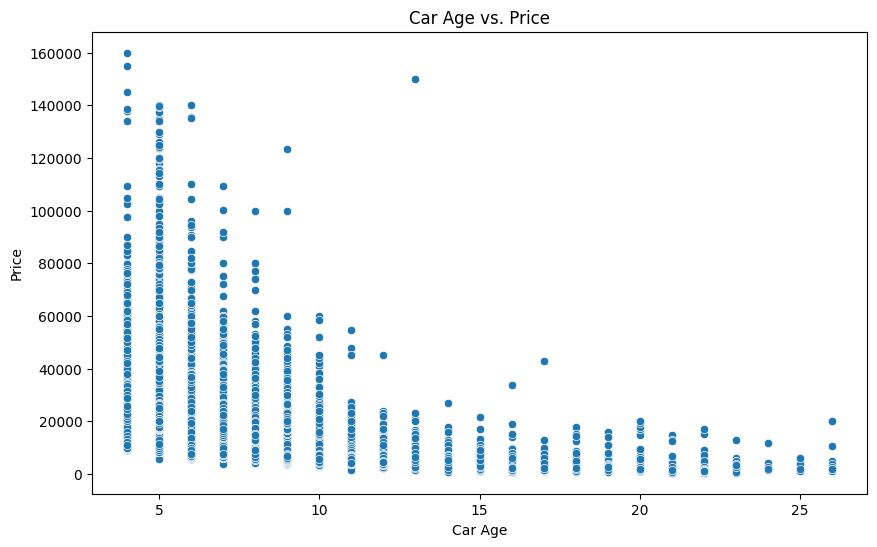

In [ ]:
# Visualize the relationship between car age and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='car_age', y='price', data=clean_data)
plt.title('Car Age vs. Price')
plt.xlabel('Car Age')
plt.ylabel('Price')
plt.show()

In [ ]:
#Hypothesis: Car age significantly impacts car price.
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient
corr, p_value = pearsonr(clean_data['car_age'], clean_data['price'])

print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Car age significantly impacts car price.")
else:
    print("Fail to reject the null hypothesis: Car age does not significantly impact car price.")


Pearson Correlation Coefficient: -0.49639045573341434
P-value: 0.0
Reject the null hypothesis: Car age significantly impacts car price.


Interpretation of "Mileage vs. Car Age" Scatter Plot
This scatter plot shows the relationship between the age of a car (in years) and its mileage. Here’s the interpretation:

Positive Correlation: There is a general trend showing a positive correlation between car age and mileage. As cars get older, their mileage tends to increase. This is expected since older cars have been driven for a longer period.
Mileage Variability: For cars aged between 5 to 15 years, there is a wide variability in mileage. This suggests that other factors, such as usage patterns, maintenance, and ownership history, play a significant role.
Plateauing Mileage: After about 10-15 years, the increase in mileage tends to plateau or even decrease slightly. This might indicate that older cars are driven less or are more likely to be retired from regular use.
Outliers: There are some outliers with exceptionally high mileage for their age. These could represent cars used for commercial purposes or extensive travel.

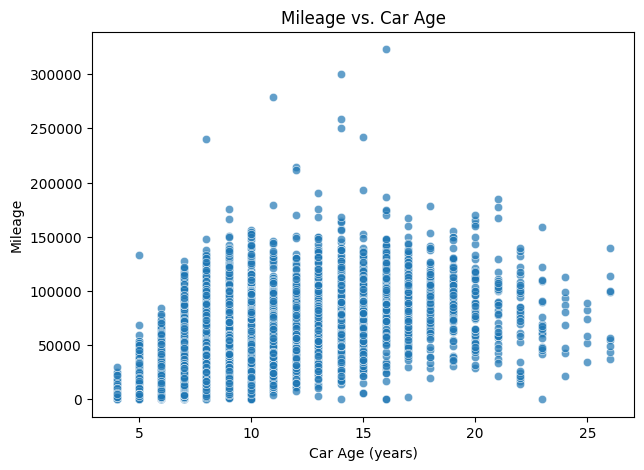

In [ ]:
# Scatter plot for Mileage vs. Car Age
plt.figure(figsize=(7, 5))
sns.scatterplot(x='car_age', y='mileage', data=clean_data, alpha=0.7)
plt.title('Mileage vs. Car Age')
plt.xlabel('Car Age (years)')
plt.ylabel('Mileage')
plt.show()


In [ ]:
#Hypothesis: Car age significantly impacts mileage
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient
corr, p_value = pearsonr(clean_data['car_age'], clean_data['mileage'])

print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Car age significantly impacts mileage.")
else:
    print("Fail to reject the null hypothesis: Car age does not significantly impact mileage.")


Pearson Correlation Coefficient: 0.7458531749790528
P-value: 0.0
Reject the null hypothesis: Car age significantly impacts mileage.


# MULTIVARIATE ANALYSIS

                year     price   mileage       tax       mpg  engineSize  \
year        1.000000  0.496390 -0.745853  0.173975 -0.127710   -0.037760   
price       0.496390  1.000000 -0.419211  0.281498 -0.291775    0.646536   
mileage    -0.745853 -0.419211  1.000000 -0.192544  0.180021    0.107851   
tax         0.173975  0.281498 -0.192544  1.000000 -0.389504    0.268780   
mpg        -0.127710 -0.291775  0.180021 -0.389504  1.000000   -0.237417   
engineSize -0.037760  0.646536  0.107851  0.268780 -0.237417    1.000000   
car_age    -1.000000 -0.496390  0.745853 -0.173975  0.127710    0.037760   

             car_age  
year       -1.000000  
price      -0.496390  
mileage     0.745853  
tax        -0.173975  
mpg         0.127710  
engineSize  0.037760  
car_age     1.000000  


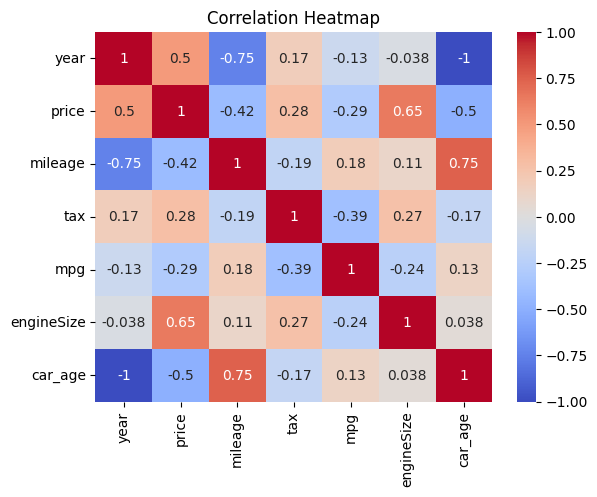

In [ ]:
# Correlation analysis
# Filter out non-numeric columns
numeric_df = clean_data.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

#Multivariate Analysis
sns.heatmap(numeric_df .corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

1. Distribution of Fuel Types Over the Years
The first plot displays the distribution of different fuel types (Petrol, Diesel, Hybrid, Other, Electric) over the years. Key observations include:

Petrol and Diesel Dominance: Petrol and Diesel cars dominate the market, with a significant increase in their counts starting from around 2010. This trend peaks around 2018 and 2019.
Emergence of Hybrid and Electric Vehicles: Hybrid and electric vehicles start to appear around 2010 but remain a small fraction compared to petrol and diesel vehicles. There is a slight increase in their count over the years, indicating a gradual adoption of more environmentally friendly vehicle options.
2. Price vs. Year by Fuel Type
The second plot shows the relationship between the price of cars and their manufacturing year, differentiated by fuel type. Key observations include:

Increasing Trend in Prices: There's a clear upward trend in car prices over the years across all fuel types. Newer cars tend to have higher prices, which is expected due to advancements in technology, features, and inflation.
Price Variation Among Fuel Types: Diesel and Petrol vehicles exhibit a wide range of prices, with some older models (around 2010) showing high prices possibly due to being premium or luxury models.
Electric and Hybrid Vehicles: These vehicles are relatively newer in the market. Their prices appear to be more stable but generally higher, reflecting the higher initial cost associated with newer technology.
Relationship Between the Two Plots
The first plot provides context for the second plot by showing how the prevalence of different fuel types has evolved over time. This evolution influences the trends observed in car prices. For instance:

Increased Adoption of Diesel and Petrol: The dominance of Diesel and Petrol vehicles until recent years explains their widespread price distribution.
Emerging Market for Hybrid and Electric Vehicles: The gradual increase in the adoption of hybrid and electric vehicles, as shown in the first plot, corresponds to the appearance of these vehicles in the higher price ranges in the second plot. This reflects their newer technology and the market's increasing demand for eco-friendly vehicles.

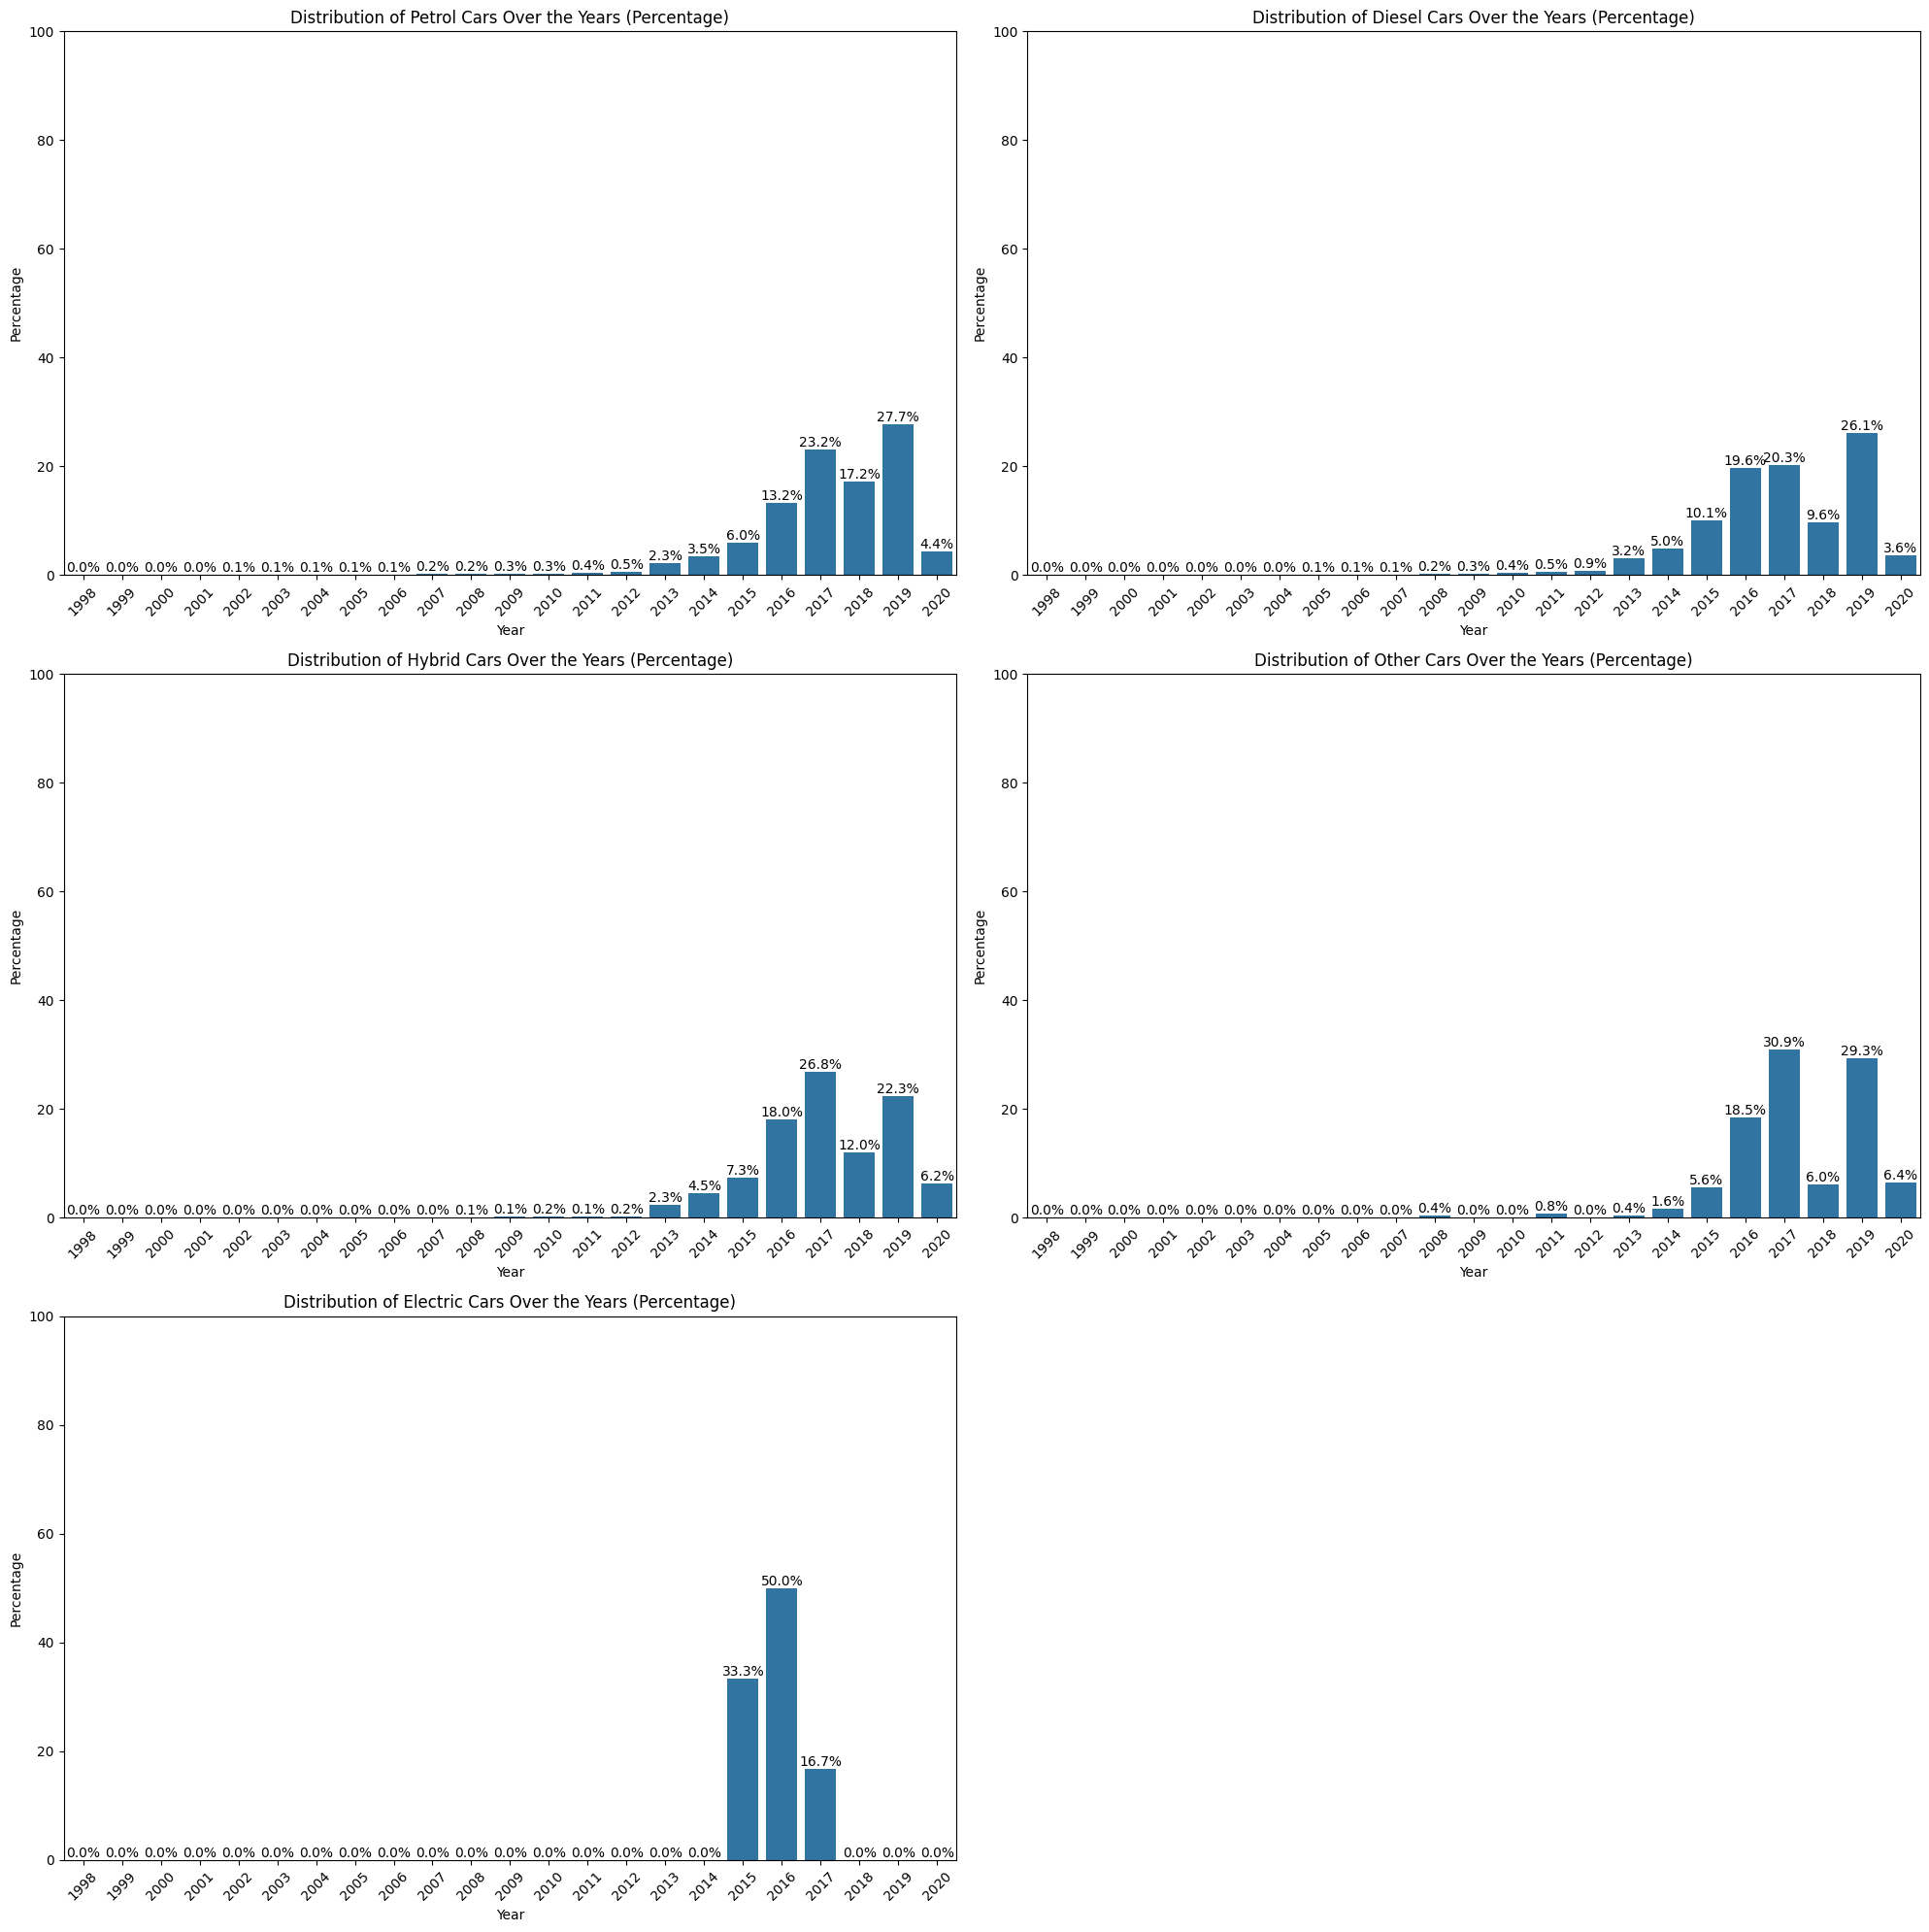

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert year to datetime if not already
clean_data['year'] = pd.to_datetime(clean_data['year'], format='%Y').dt.year
# Calculate the count of each fuel type per year
fuel_yearly_counts = clean_data.groupby(['year', 'fuelType']).size().unstack(fill_value=0)

# Calculate percentage for each fuel type per year within its own category
fuel_percentage = fuel_yearly_counts.div(fuel_yearly_counts.sum(axis=0), axis=1) * 100
# Plot each fuel type separately
fuel_types = clean_data['fuelType'].unique()
plt.figure(figsize=(20, 20))
for i, fuel in enumerate(fuel_types):
    plt.subplot(3, 2, i+1)
    sns.barplot(x=fuel_percentage.index, y=fuel_percentage[fuel])
    plt.title(f'Distribution of {fuel} Cars Over the Years (Percentage)')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)

    # Add percentage labels on top of each bar
    for container in plt.gca().containers:
        plt.gca().bar_label(container, fmt='%.1f%%')
plt.tight_layout()
plt.show()



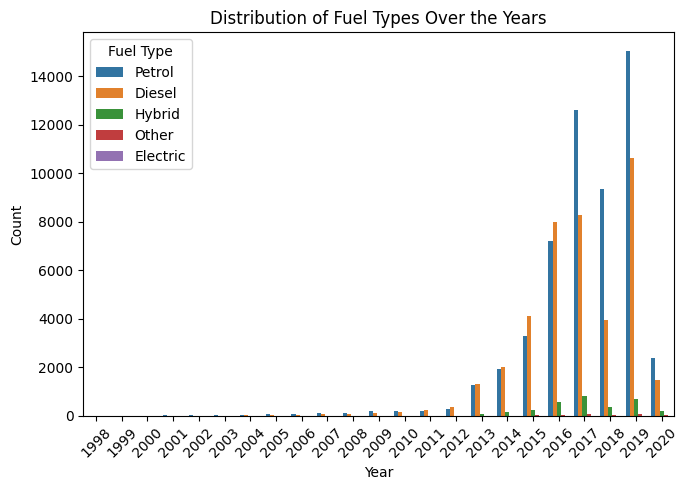

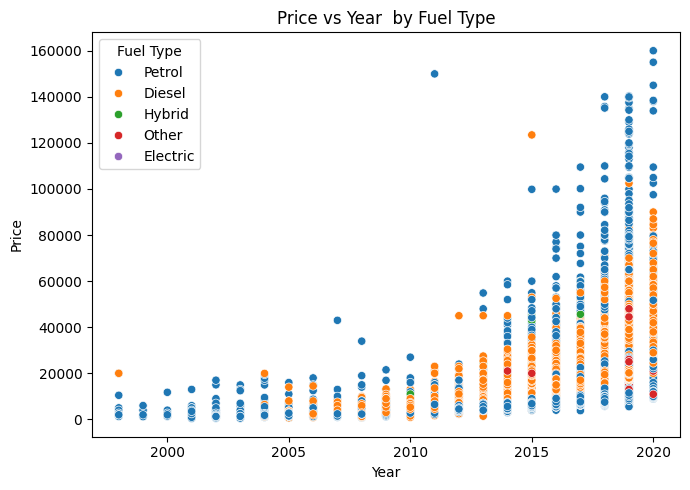

In [ ]:
#What is the count of different fuel types over the years?

# Convert year to datetime
clean_data['year'] = pd.to_datetime(clean_data['year'], format='%Y')
# Create a count plot for transmission types over the years
plt.figure(figsize=(7, 5))
sns.countplot(x=clean_data['year'].dt.year, hue='fuelType', data=clean_data)
plt.title('Distribution of Fuel Types Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

# Create a joint plot for price vs year colored by transmission type
plt.figure(figsize=(7, 5))
sns.scatterplot(x=clean_data['year'].dt.year, y='price', hue='fuelType', data=clean_data)
plt.title('Price vs Year  by Fuel Type')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

1. Distribution of Transmission Types Over the Years
Trends Over Time: The first graph shows the count of cars with different transmission types (Manual, Automatic, Semi-Auto, Other) over the years.
Manual transmissions were the most common until around 2015, after which there was a decline.
Automatic transmissions, while less common initially, saw a significant increase in recent years.
Semi-Auto transmissions also increased in popularity, especially after 2015.
Other transmissions have remained consistently low in numbers throughout the years.
2. Price vs Year by Transmission Type
Price Trends: The second graph shows the distribution of car prices over the years, segmented by transmission type.
Automatic cars generally command higher prices, particularly evident from around 2015 onwards.
Manual cars tend to have lower prices compared to Automatic and Semi-Auto cars.
Semi-Auto cars also have higher prices, though not as high as Automatics.
Other transmissions show varied pricing but are relatively fewer in number.
Relation Between the Graphs
Shift in Preferences: The increase in the count of Automatic and Semi-Auto cars over the years reflects a shift in consumer preference towards these transmission types. This could be due to the perceived convenience and advanced technology offered by these transmissions.
Price Impact: The higher prices associated with Automatic and Semi-Auto transmissions highlight their value in the market. This suggests that consumers are willing to pay a premium for these types of transmissions.
Manual Decline: The decline in manual transmission cars both in count and in price indicates a shift away from this older technology, likely driven by changing consumer preferences and advancements in automotive technology.
Market Segmentation: The graphs together indicate a market segmentation where newer, more technologically advanced transmissions (Automatic and Semi-Auto) are becoming more dominant, while older technologies (Manual) are declining both in prevalence and in value.
Conclusion
These visualizations show a clear trend towards Automatic and Semi-Auto transmissions over the years, with a corresponding increase in the prices of these cars. This shift reflects changing consumer preferences and technological advancements in the automotive industry. Understanding these trends is crucial for stakeholders in the automotive market to make informed decisions regarding production, marketing, and sales strategies.

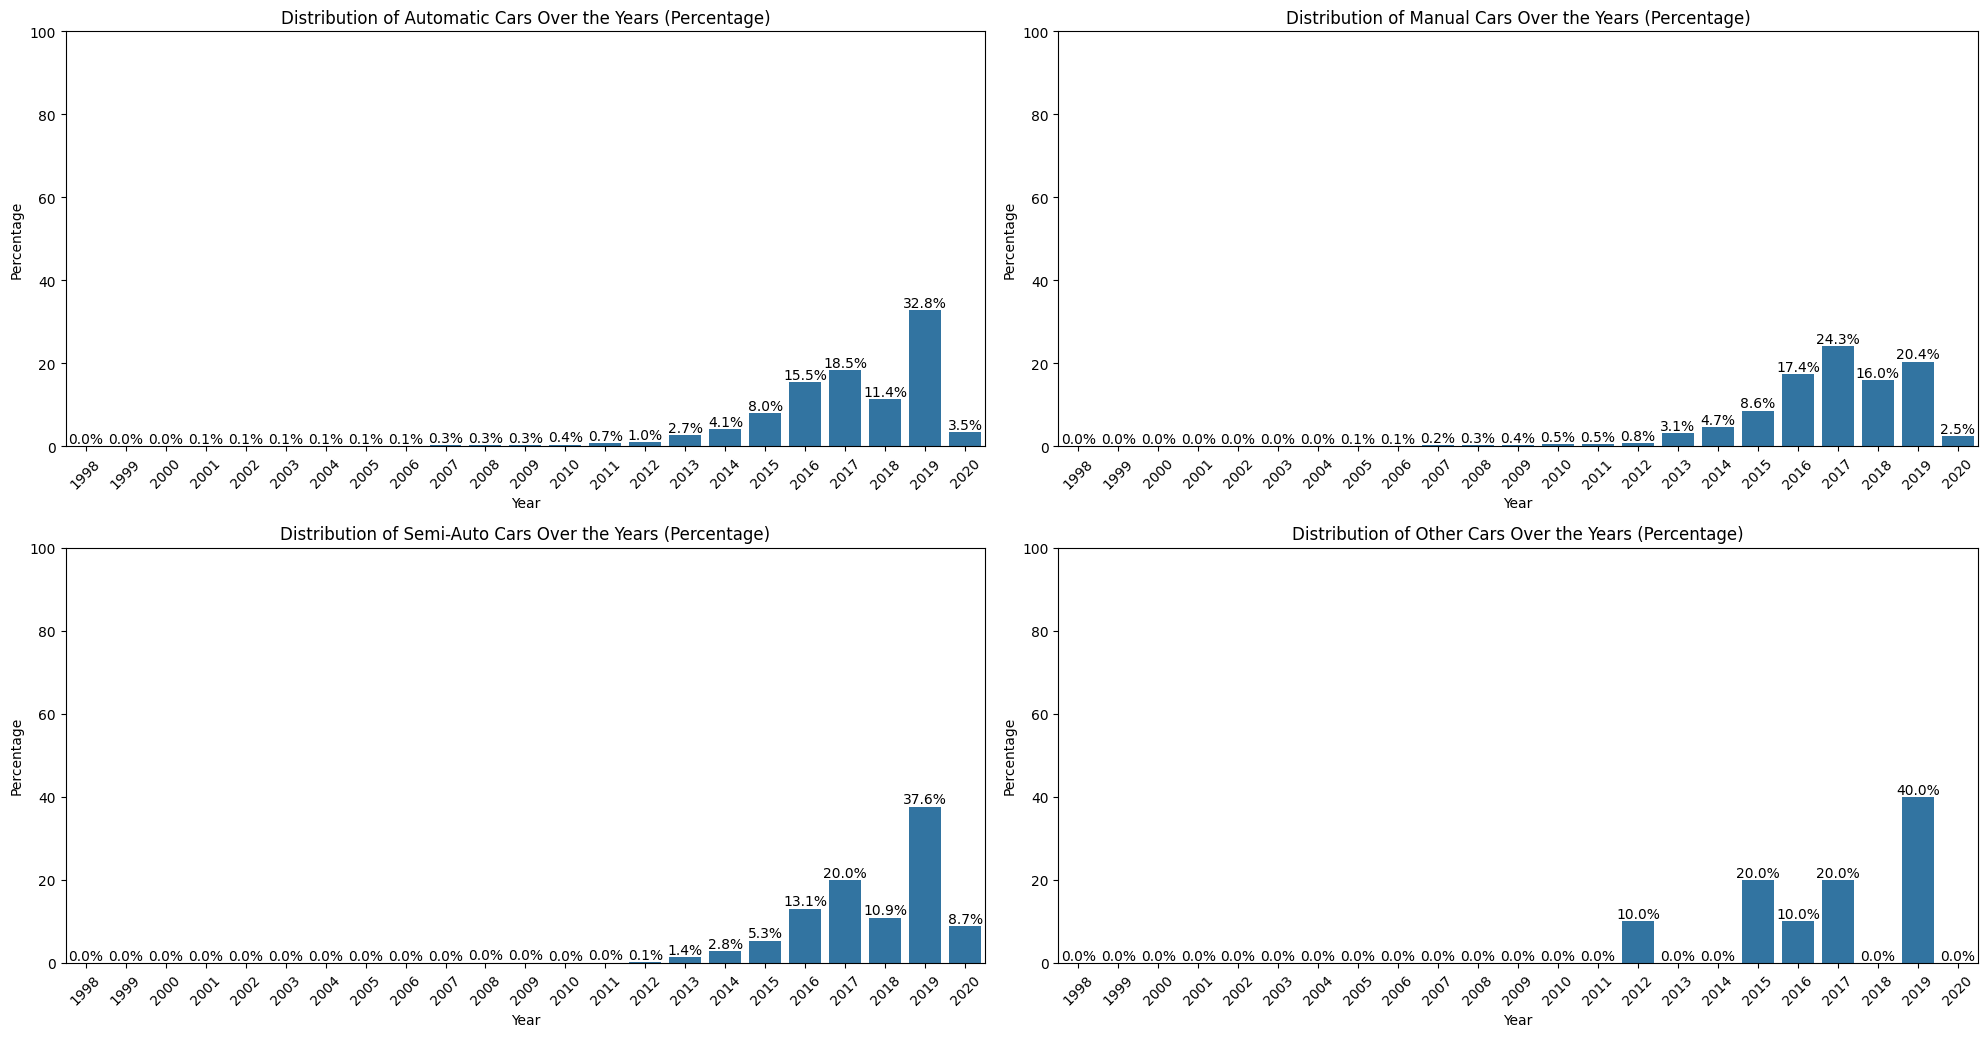

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the 'year' column is in datetime format
clean_data['year'] = pd.to_datetime(clean_data['year'], format='%Y').dt.year

# Calculate the count of each transmission type per year
transmission_yearly_counts = clean_data.groupby(['year', 'transmission']).size().unstack(fill_value=0)
# Calculate percentage for each transmission type per year within its own category
transmission_percentage = transmission_yearly_counts.div(transmission_yearly_counts.sum(axis=0), axis=1) * 100
# Plot each transmission type separately
transmission_types = clean_data['transmission'].unique()
plt.figure(figsize=(20, 15))

for i, transmission in enumerate(transmission_types):
    plt.subplot(3, 2, i+1)
    sns.barplot(x=transmission_percentage.index, y=transmission_percentage[transmission])
    plt.title(f'Distribution of {transmission} Cars Over the Years (Percentage)')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    # Add percentage labels on top of each bar
    for container in plt.gca().containers:
        plt.gca().bar_label(container, fmt='%.1f%%')
plt.tight_layout()
plt.show()


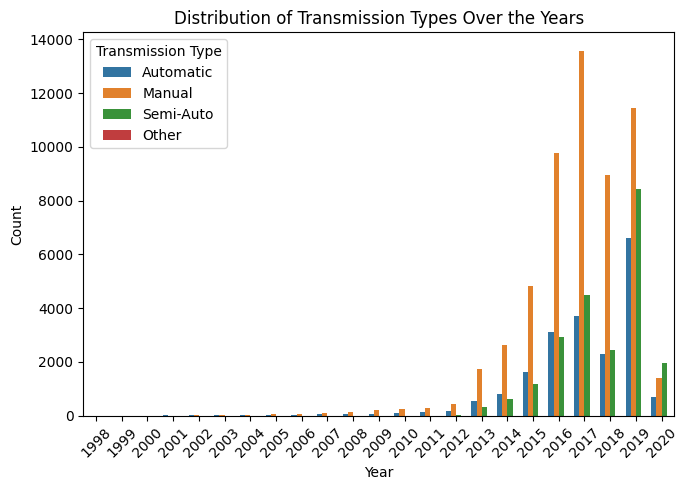

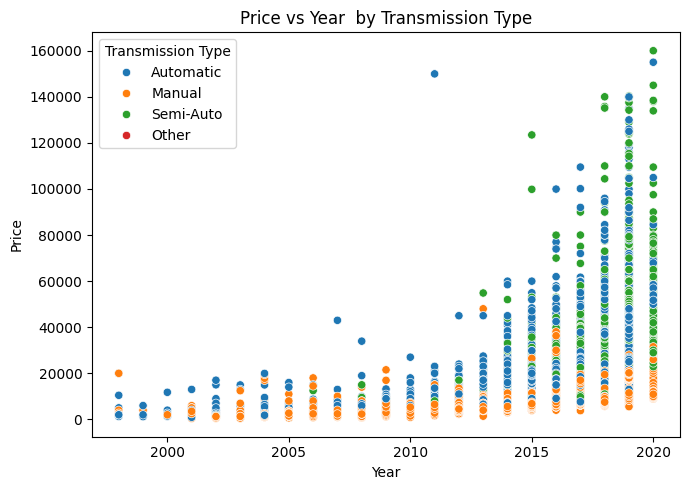

In [ ]:
# What is the distribution of transmission of cars, in comparison to the prices, and how have these distributions changed over the past decade?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert year to datetime
clean_data['year'] = pd.to_datetime(clean_data['year'], format='%Y')

# Create a count plot for transmission types over the years
plt.figure(figsize=(7, 5))
sns.countplot(x=clean_data['year'].dt.year, hue='transmission', data=clean_data)
plt.title('Distribution of Transmission Types Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Transmission Type')
plt.tight_layout()
plt.show()


# Create a joint plot for price vs year colored by transmission type
plt.figure(figsize=(7, 5))
sns.scatterplot(x=clean_data['year'].dt.year, y='price', hue='transmission', data=clean_data)
plt.title('Price vs Year  by Transmission Type')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(title='Transmission Type')
plt.tight_layout()
plt.show()


The graph illustrates the relationship between engine size and car price, segmented by different fuel types (Diesel, Petrol, Hybrid, Other, Electric).

Key Observations:
Engine Size Distribution:

Diesel and Petrol cars are distributed across a wide range of engine sizes from 0 to 6 liters.
Hybrid and Electric cars are primarily concentrated around smaller engine sizes, typically less than 2 liters.
Other fuel types show a limited distribution and seem to be outliers or less common fuel types.
Price Distribution:

Petrol cars, represented by orange dots, show a wide price range across all engine sizes, with some very high prices for larger engines.
Diesel cars, shown as blue dots, also exhibit a wide price range but generally have lower prices compared to petrol cars at larger engine sizes.
Hybrid and Electric cars are priced relatively high despite having smaller engine sizes, indicating the added value of their technology.
Correlation:

There seems to be a positive correlation between engine size and price for Petrol and Diesel cars, meaning larger engines tend to be more expensive.
Hybrid and Electric cars do not show a strong correlation between engine size and price, suggesting other factors play a significant role in their pricing.

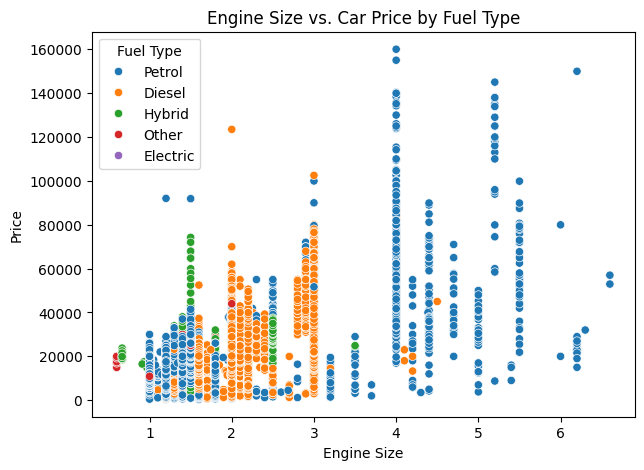

In [ ]:
# How does engine size correlate with car prices across different fuel types?
plt.figure(figsize=(7, 5))
sns.scatterplot(x='engineSize', y='price', hue='fuelType', data=clean_data)
plt.title('Engine Size vs. Car Price by Fuel Type')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()

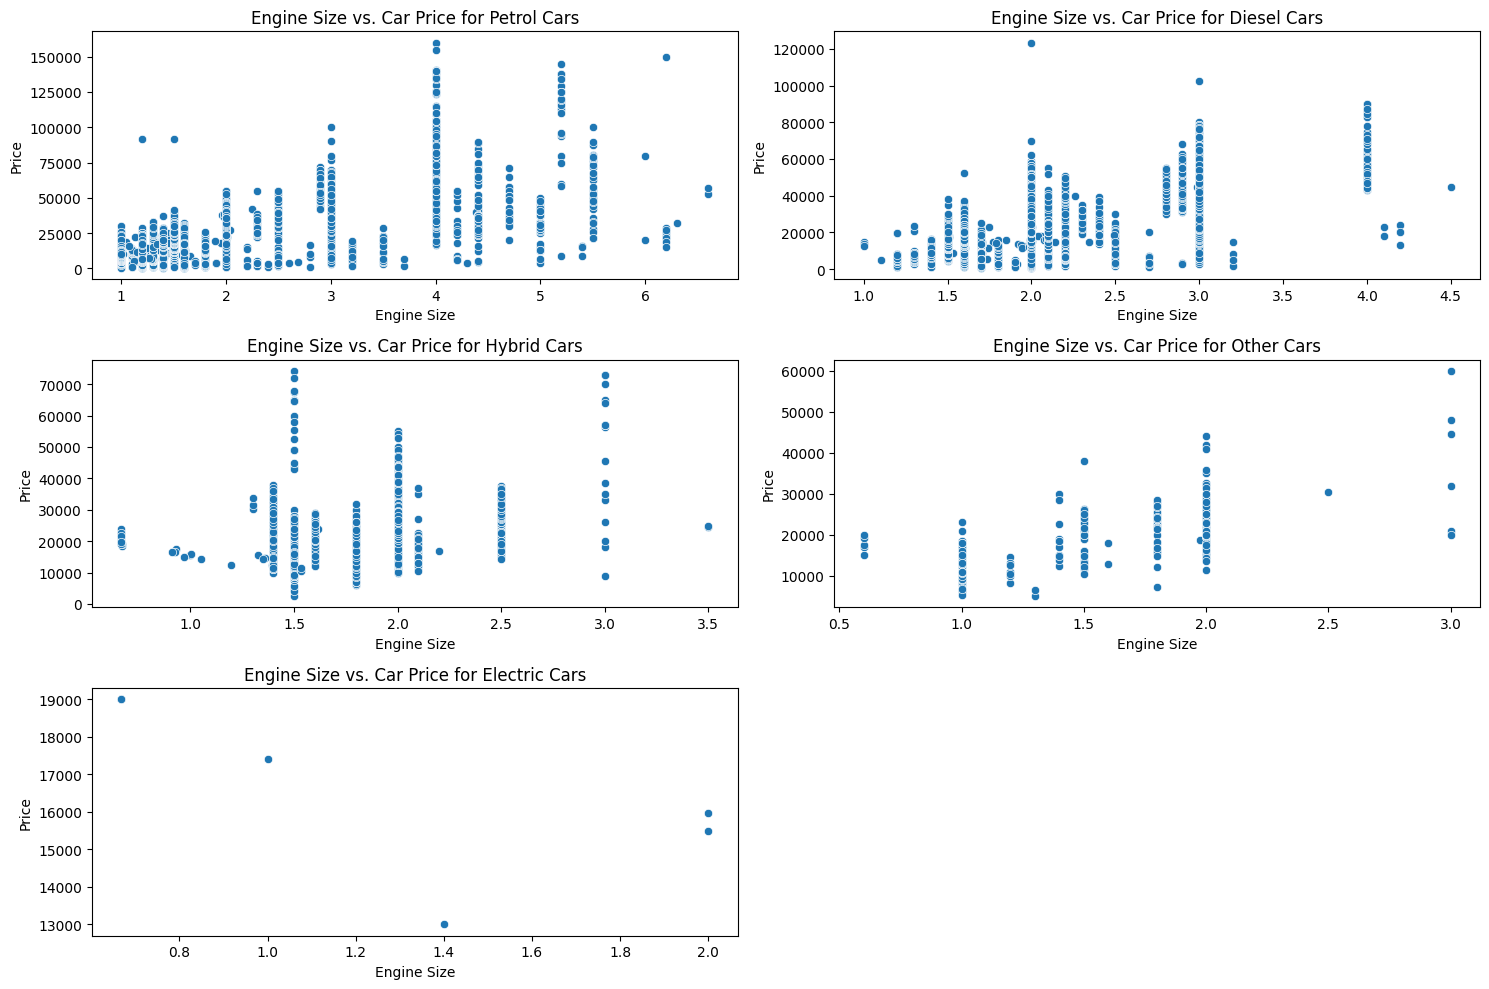

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for each fuel type
fuel_types = clean_data['fuelType'].unique()

# Create separate scatter plots for engine size vs. price for each fuel type
plt.figure(figsize=(15, 10))
for i, fuel in enumerate(fuel_types):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(data=clean_data[clean_data['fuelType'] == fuel], x='engineSize', y='price')
    plt.title(f'Engine Size vs. Car Price for {fuel} Cars')
    plt.xlabel('Engine Size')
    plt.ylabel('Price')
plt.tight_layout()
plt.show()


In [ ]:
#Hypothesis: Engine size has a significant impact on car prices, with larger engines commanding higher prices, particularly for petrol and diesel cars.
import scipy.stats as stats

# Extract relevant columns for analysis
engine_size = clean_data['engineSize']
price = clean_data['price']

# Calculate the correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(engine_size, price)
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between engine size and car prices.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between engine size and car prices.")


Pearson Correlation Coefficient: 0.6465133495968775
P-value: 0.0
Reject the null hypothesis: There is a significant relationship between engine size and car prices.


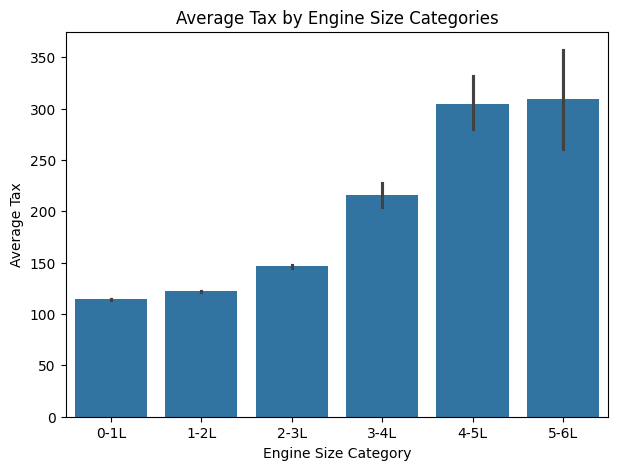

In [ ]:
import numpy as np
# Create engine size categories
clean_data['engineSizeCategory'] = pd.cut(clean_data['engineSize'], bins=[0, 1, 2, 3, 4, 5, 6], labels=['0-1L', '1-2L', '2-3L', '3-4L', '4-5L', '5-6L'])

plt.figure(figsize=(7, 5))
sns.barplot(x='engineSizeCategory', y='tax', data=clean_data, estimator=np.mean)
plt.title('Average Tax by Engine Size Categories')
plt.xlabel('Engine Size Category')
plt.ylabel('Average Tax')
plt.show()


Interpretation of the Graph: Price vs. Engine Size with Tax as Hue
The graph illustrates the relationship between engine size and car price, with the color of the points representing different tax brackets.

Key Observations:
Engine Size Distribution:

Cars with smaller engines (0 to 2 liters) are widely distributed across various price ranges, although most are clustered below 60,000.
Larger engine sizes (3 liters and above) are associated with higher prices, often exceeding 40,000, and reaching up to 160,000.
Tax Brackets:

Lower Tax Brackets: Cars in the lower tax brackets (0 to 100) are generally priced lower and tend to have smaller engines.
Higher Tax Brackets: Cars in the higher tax brackets (200 to 500) are generally more expensive and tend to have larger engines.
There is a noticeable increase in the tax bracket with increasing engine size, indicating a possible correlation between engine size and tax.
Price Distribution:

There is a wide price range for each engine size, but higher engine sizes tend to show a concentration of higher prices.
The presence of higher taxes on cars with larger engine sizes indicates a possible policy or tax regulation targeting larger, potentially less fuel-efficient vehicles.

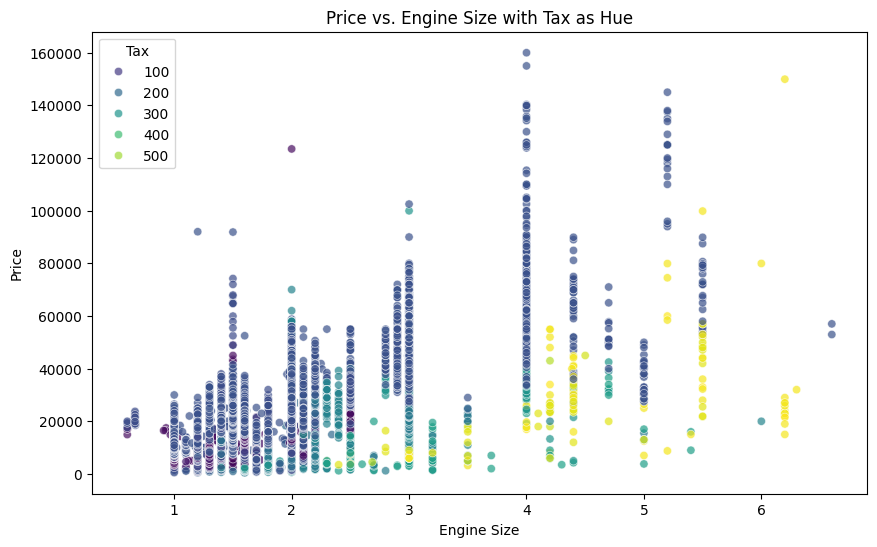

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Price vs. Engine Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engineSize', y='price', data=clean_data, hue='tax', palette='viridis', alpha=0.7)
plt.title('Price vs. Engine Size with Tax as Hue')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend(title='Tax')
plt.show()


Reasons and Analysis
Environmental Concerns:

The automotive industry is under increasing pressure to reduce CO2 emissions to combat climate change. Brands with lower emissions, like Toyota, can market themselves as environmentally responsible, potentially attracting eco-conscious consumers.
Taxation Policies:

Governments often use vehicle taxes as a tool to encourage the purchase of fuel-efficient and low-emission vehicles. Higher taxes on brands like BMW and Mercedes-Benz reflect the penalties for higher emissions, while lower taxes on brands like Toyota incentivize the purchase of cleaner cars.
Market Strategies:

Understanding the environmental impact and tax burden of their vehicles can help manufacturers like Audi and BMW pivot towards developing more fuel-efficient and hybrid models to meet regulatory requirements and market demand.
Consumer Behavior:

Consumers are increasingly aware of the environmental impact of their purchases. Brands that can demonstrate a commitment to sustainability, like Toyota, may enjoy a competitive advantage.
Insights for the UK Automotive Industry
Focus on Electric and Hybrid Vehicles:

There is a clear trend towards lower emissions. The UK automotive industry can benefit from investing in electric and hybrid vehicle technology to meet future regulatory standards and consumer demand.
Pricing Strategies:

Understanding the tax implications of their vehicles can help manufacturers price their models more competitively. For example, reducing emissions can lower the tax burden, making their cars more attractive to cost-conscious buyers.
Marketing and Branding:

Highlighting the environmental benefits and lower tax burdens of their vehicles can be a powerful marketing tool. Brands like Toyota can leverage their low CO2 emissions and low tax to appeal to environmentally conscious consumers.
Policy Advocacy:

<ipython-input-49-e855f242ddbd>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




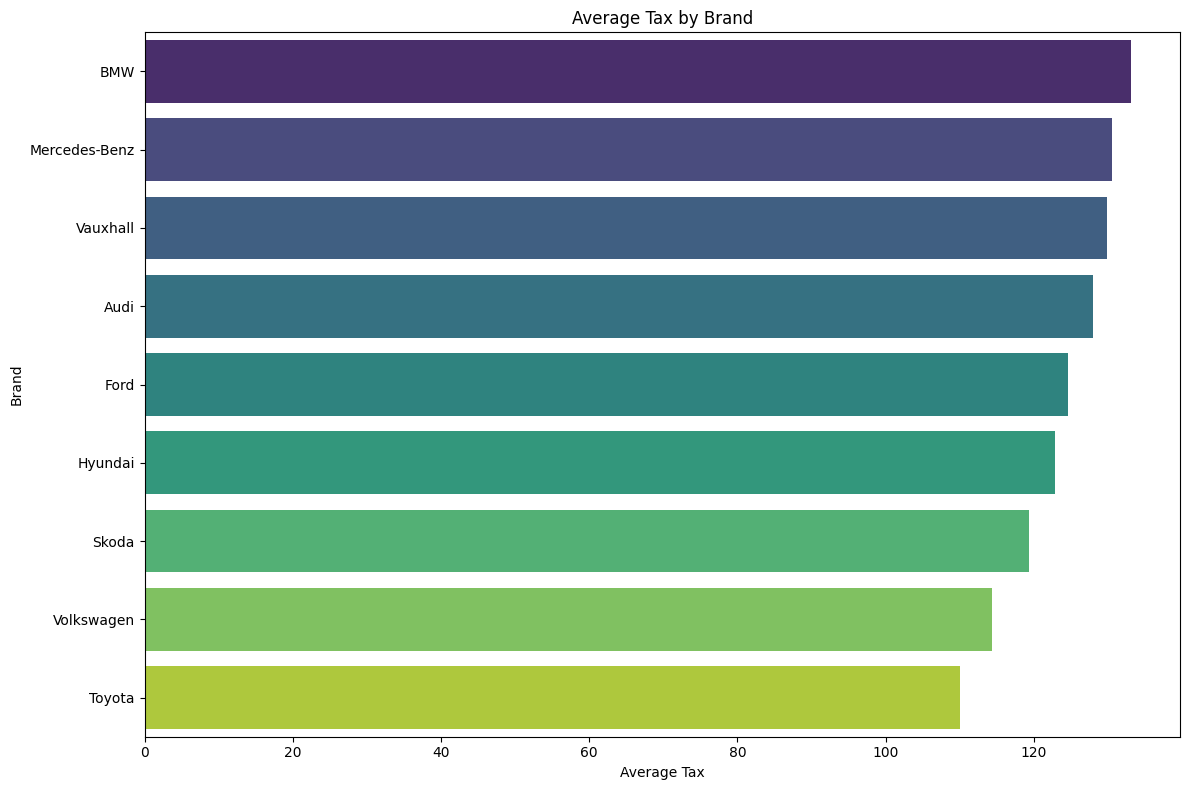

Average Tax by Brand:
           brand         tax
1            BMW  133.064488
4  Mercedes-Benz  130.541224
7       Vauxhall  129.933104
0           Audi  127.954753
2           Ford  124.575530
3        Hyundai  122.914516
5          Skoda  119.280702
8     Volkswagen  114.403007
6         Toyota  110.093707


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the average tax for each brand
avg_tax_per_brand = clean_data.groupby('brand')['tax'].mean().reset_index()
avg_tax_per_brand = avg_tax_per_brand.sort_values(by='tax', ascending=False)

# Plot the average tax for each brand
plt.figure(figsize=(12, 8))
sns.barplot(x='tax', y='brand', data=avg_tax_per_brand, palette='viridis')
plt.title('Average Tax by Brand')
plt.xlabel('Average Tax')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

# Display the results in tabular form
print("Average Tax by Brand:")
print(avg_tax_per_brand)


Interpretation of CO2 Emissions Based on Fuel Type and MPG
The CO2 emissions have been calculated using the given formula which takes into account the fuel type and miles per gallon (mpg). The fuel type and mpg directly impact the CO2 emissions, as different fuels have different emission factors and the efficiency of the vehicle (mpg) influences the amount of fuel consumed per mile.

Here's how the formula relates to the bar chart for CO2 emissions:

Fuel Type: The emission factors for Petrol, Diesel, Hybrid, and Other (Electric) are predefined. Petrol and Diesel have higher emission factors compared to Hybrid and Electric. This means that, for the same fuel consumption, Petrol and Diesel vehicles will emit more CO2.

Miles Per Gallon (MPG): MPG indicates how many miles a vehicle can travel per gallon of fuel. A higher MPG means the vehicle is more fuel-efficient and consumes less fuel per mile. Consequently, vehicles with higher MPG will have lower CO2 emissions for the same distance traveled.

Top 10 Most Environmentally Friendly Car Models
Interpretation:

Models like the i3 and Prius are highly fuel-efficient (high MPG) and often use electric or hybrid technology, leading to significantly lower CO2 emissions.
Other models such as i8, Camry, Ampera, Ioniq, and Auris also feature hybrid technology or efficient engines, contributing to lower CO2 emissions.
These models combine efficient fuel use with technologies that minimize emissions, making them environmentally friendly.
Top 10 Least Environmentally Friendly Car Models
Interpretation:

Models like the Hilux and G Class typically have larger engines and lower fuel efficiency (low MPG), resulting in higher CO2 emissions.
High-performance cars like R8, Mustang, and various BMW models (M5, M6, M3) prioritize power over fuel efficiency, leading to increased fuel consumption and higher CO2 emissions.
These models are less concerned with fuel efficiency and more focused on performance, luxury, or off-road capabilities, contributing to their higher environmental impact.
Correlation with Fuel Type and MPG
The bar charts for CO2 emissions are inherently correlated with the fuel type and mpg values used in the calculation:

Fuel Type: Vehicles using Diesel and Petrol have higher emission factors, thus they are more likely to appear in the least environmentally friendly category unless they have extremely high fuel efficiency.
MPG: Vehicles with higher MPG values consume less fuel for the same distance, leading to lower CO2 emissions. This is why many hybrid and electric vehicles, which typically have higher MPG, appear in the most environmentally friendly category.
Conclusion
The CO2 emissions calculated using the given formula are directly influenced by the fuel type and mpg of each vehicle. This correlation is reflected in the bar charts, where more fuel-efficient vehicles (higher MPG and hybrid/electric types) are shown as the most environmentally friendly, while less fuel-efficient, performance-oriented, or larger engine vehicles (lower MPG and petrol/diesel types) are shown as the least environmentally friendly.

This analysis can help guide consumers and policymakers towards promoting and adopting more environmentally friendly vehicles.

In [ ]:
#Adding co2 emission column for finding which model is most and least environment fridenly
# Define emission factors in g CO2/L for Petrol and Diesel, and g CO2/km for Hybrid and Electric
emission_factors = {
    'Petrol': 2392,
    'Diesel': 2640,
    'Hybrid': 44,  #  average emission for hybrids
    'Other': 0     # Electric vehicles have zero direct emissions
}
# Function to convert mpg to L/100km
def mpg_to_l_per_100km(mpg):
    return 282.48 / mpg
# Function to calculate CO2 emissions in g/km
def calculate_co2_emissions(row):
    fuel_type = row['fuelType']
    if fuel_type in emission_factors:
        if fuel_type in ['Petrol', 'Diesel']:
            l_per_100km = mpg_to_l_per_100km(row['mpg'])
            co2_emissions = l_per_100km * emission_factors[fuel_type] / 100
        else:
            co2_emissions = emission_factors[fuel_type]  # Directly use the value for Hybrid and Electric
        return co2_emissions
    return None


clean_data['CO2 Emissions (g/km)'] = clean_data.apply(calculate_co2_emissions, axis=1)

clean_data.head()



brand model  year   price transmission  mileage    tax   mpg fuelType  \
0  Audi    A1  2010  9990.0    Automatic    38000  125.0  53.3   Petrol   
1  Audi    A1  2011  6295.0       Manual   107000  125.0  53.3   Petrol   
2  Audi    A1  2011  6995.0       Manual    65000  125.0  53.3   Petrol   
3  Audi    A1  2011  4250.0       Manual   116000   20.0  70.6   Diesel   
4  Audi    A1  2011  7495.0       Manual    60700  125.0  53.3   Petrol   

   engineSize  car_age  CO2 Emissions (g/km)  
0         1.4       14            126.771512  
1         1.4       13            126.771512  
2         1.4       13            126.771512  
3         1.6       13            105.629915  
4         1.4       13            126.771512

In [ ]:
# Group by model and calculate the average CO2 emissions
model_co2_emissions = clean_data.groupby('model')['CO2 Emissions (g/km)'].mean().reset_index()

# Sort models by average CO2 emissions
most_env_friendly_models = model_co2_emissions.sort_values(by='CO2 Emissions (g/km)').head(10)
least_env_friendly_models = model_co2_emissions.sort_values(by='CO2 Emissions (g/km)', ascending=False).head(10)

# Display the most and least environmentally friendly models
print("Most Environmentally Friendly Car Models")
print(most_env_friendly_models)
print("\nLeast Environmentally Friendly Car Models")
print(least_env_friendly_models)

Most Environmentally Friendly Car Models
        model  CO2 Emissions (g/km)
188        i3             36.300000
115     Prius             40.586207
189        i8             41.411765
46      Camry             44.000000
22     Ampera             44.000000
89      Ioniq             44.146182
26      Auris             67.105783
33       C-HR             71.576827
51    Corolla             83.578868
124      RAV4             94.714775

Least Environmentally Friendly Car Models
        model  CO2 Emissions (g/km)
79      Hilux            487.588235
63    G Class            321.840000
123        R8            303.964286
110   Mustang            284.238596
130    Ranger            263.500000
104        M5            259.393103
105        M6            252.875000
128       RS6            238.200000
126       RS4            235.722581
102        M3            235.380769


<ipython-input-52-b0d9d2c4cda3>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




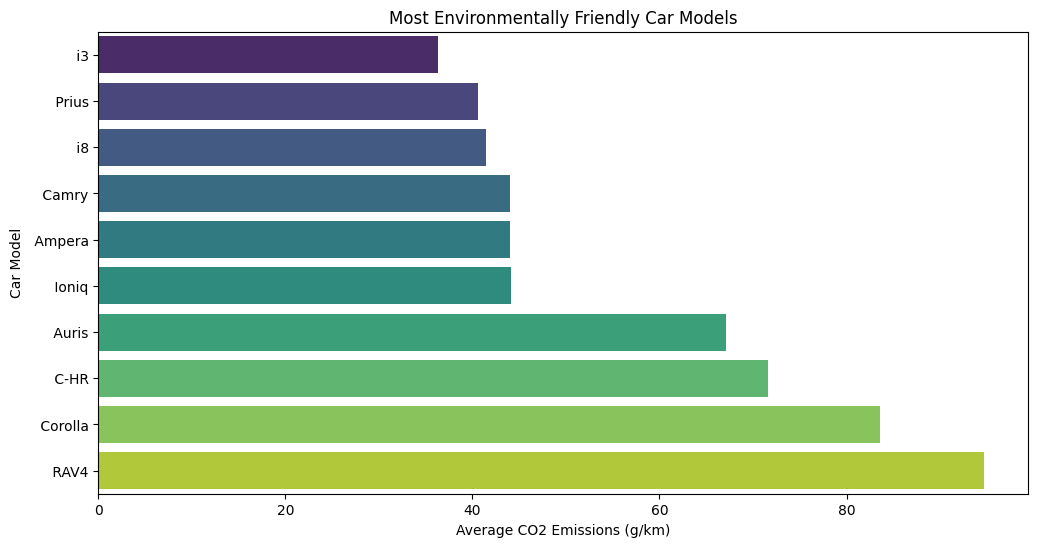

<ipython-input-52-b0d9d2c4cda3>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




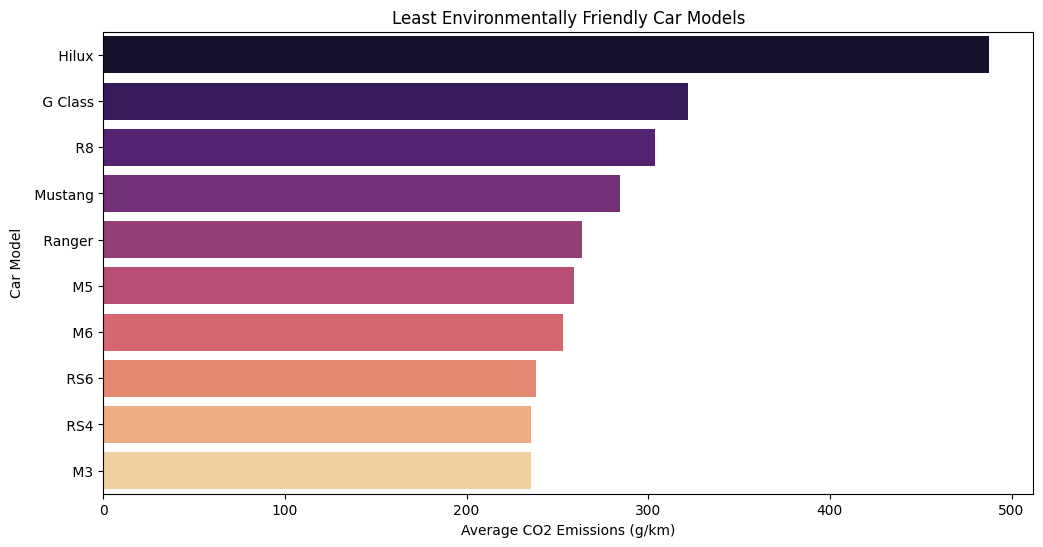

In [ ]:
# Plot the most environmentally friendly car models
plt.figure(figsize=(12, 6))
sns.barplot(x='CO2 Emissions (g/km)', y='model', data=most_env_friendly_models, palette='viridis')
plt.title('Most Environmentally Friendly Car Models')
plt.xlabel('Average CO2 Emissions (g/km)')
plt.ylabel('Car Model')
plt.show()

# Plot the least environmentally friendly car models
plt.figure(figsize=(12, 6))
sns.barplot(x='CO2 Emissions (g/km)', y='model', data=least_env_friendly_models, palette='magma')
plt.title('Least Environmentally Friendly Car Models')
plt.xlabel('Average CO2 Emissions (g/km)')
plt.ylabel('Car Model')
plt.show()

Potential Reasons and Analysis:
Brand Focus and Strategy:

Toyota and Ford have invested heavily in hybrid and electric vehicle technology, which significantly reduces CO2 emissions. Toyota's leadership in hybrid technology with models like the Prius is a prime example.
Audi, BMW, and Mercedes-Benz have a substantial portion of their lineup dedicated to high-performance and luxury vehicles, which tend to have higher emissions.
Vehicle Segment Influence:

Brands with a larger share of SUVs and performance cars typically show higher emissions. For instance, Audi's portfolio includes a significant number of SUVs and high-performance models, contributing to their higher average emissions.
Technological Advancements:

Continuous advancements in hybrid and electric vehicle technology are likely to further reduce emissions for brands like Toyota and Ford. On the other hand, luxury and performance brands might need to invest more in efficient technologies to reduce their environmental footprint.
Recommendations for the UK Automotive Industry:
Encourage Hybrid and Electric Vehicle Adoption:

Promote the adoption of hybrid and electric vehicles through incentives and awareness campaigns. Highlighting the environmental benefits and cost savings of low-emission vehicles can drive consumer interest.
Support for R&D in Emission-Reduction Technologies:

Invest in research and development for advanced emission-reduction technologies. This can help brands traditionally associated with higher emissions to transition towards greener models.
Segment-Specific Strategies:

Develop segment-specific strategies to target reductions in CO2 emissions. For instance, focus on improving the efficiency of SUVs and luxury vehicles, which currently exhibit higher emissions.
Regulatory Measures and Incentives:

Implement regulatory measures and incentives that encourage manufacturers to prioritize low-emission vehicle production. This can include tax benefits for producing and purchasing low-emission vehicles.

<ipython-input-53-1b2646e51e0f>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




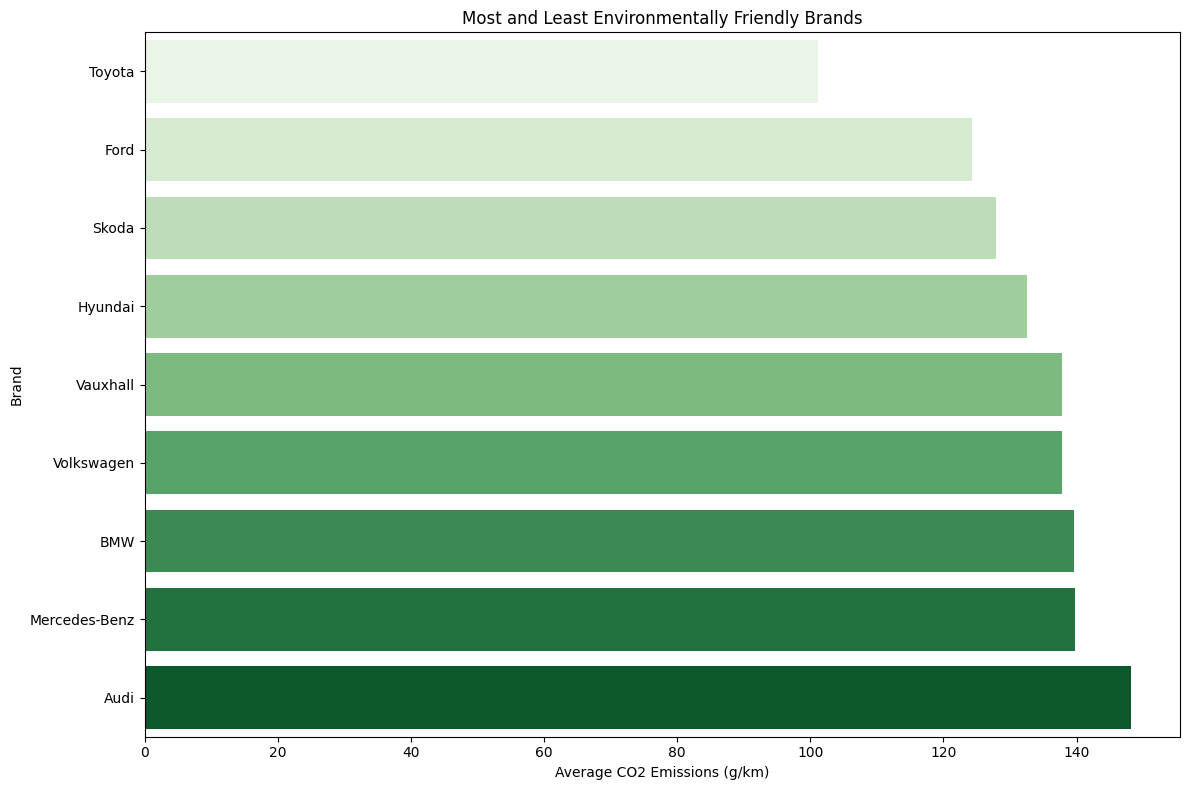

Most and Least Environmentally Friendly Brands:
           brand  CO2 Emissions (g/km)
6         Toyota            101.113027
2           Ford            124.341831
5          Skoda            127.927791
3        Hyundai            132.602572
7       Vauxhall            137.828341
8     Volkswagen            137.839297
1            BMW            139.669154
4  Mercedes-Benz            139.710513
0           Audi            148.139878


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average CO2 emissions for each brand
avg_co2_emissions = clean_data.groupby('brand')['CO2 Emissions (g/km)'].mean().reset_index()
avg_co2_emissions = avg_co2_emissions.sort_values(by='CO2 Emissions (g/km)')

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='CO2 Emissions (g/km)', y='brand', data=avg_co2_emissions, palette='Greens')
plt.title('Most and Least Environmentally Friendly Brands')
plt.xlabel('Average CO2 Emissions (g/km)')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

# Display the results in tabular form
print("Most and Least Environmentally Friendly Brands:")
print(avg_co2_emissions)



Interpretation:
Average Fuel Efficiency (MPG) Over Time:

Trend: There is a clear upward trend in fuel efficiency from 2000 to around 2016. After 2016, the average MPG starts to decline slightly.
Implications: Improvements in fuel efficiency technologies and stricter fuel economy standards likely contributed to this increase. The slight decline post-2016 could be due to various factors, such as the increasing popularity of larger vehicles like SUVs and trucks, which typically have lower MPG.
Average CO2 Emissions (g/km) Over Time:

Trend: There is a clear downward trend in average CO2 emissions from 2000 to around 2016, followed by a slight increase post-2016.
Implications: This decrease in CO2 emissions is consistent with improvements in fuel efficiency and stricter emissions regulations. The increase in emissions post-2016 could similarly be attributed to the rise in larger vehicles and possibly changes in fuel type preferences.
Relationship Between the Two Trends:
Inverse Relationship: The inverse relationship between fuel efficiency and CO2 emissions is evident. As fuel efficiency (MPG) increases, CO2 emissions (g/km) decrease. This is because higher fuel efficiency means less fuel consumption per mile, leading to lower CO2 emissions.
Policy Impact: The trends suggest that policies and technological advancements aimed at improving fuel efficiency have effectively reduced CO2 emissions. However, the slight reversal in both trends post-2016 indicates a need for continued focus on fuel economy and emissions standards, especially as vehicle preferences evolve.
Future Trends:
Fuel Efficiency: If the trend of increasing vehicle size continues, fuel efficiency might stagnate or decline. Conversely, advancements in hybrid and electric vehicle technologies could push the average MPG higher.
CO2 Emissions: The rise in average CO2 emissions post-2016 is concerning. Continued innovation in clean energy and stricter emissions standards will be crucial in reversing this trend and achieving long-term sustainability goals.
Overall, these plots underscore the importance of continued advancements in fuel efficiency and emissions control technologies to mitigate environmental impact and support sustainability in the automotive industry.

Relationship:
Inverse Relationship: Generally, as fuel efficiency (MPG) increases, CO2 emissions (g/km) decrease. This is because more efficient fuel consumption results in less fuel being burned per mile traveled, thereby reducing the amount of CO2 emitted.

Trends Over Time:

2000 to 2016: During this period, the upward trend in MPG corresponds with the downward trend in CO2 emissions, reflecting improvements in vehicle fuel efficiency and emissions standards.
Post-2016: The slight decline in MPG and the increase in CO2 emissions suggest a potential shift in vehicle types (e.g., more SUVs and trucks, which are less fuel-efficient) or changes in consumer preferences.
Summary:
These two metrics are closely related because improvements in fuel efficiency typically lead to reductions in CO2 emissions. The trends observed in these plots highlight how advancements in automotive technology and regulatory policies have historically impacted both fuel efficiency and emissions. Therefore, monitoring both metrics together provides a comprehensive view of the automotive industry's progress toward sustainability and environmental goals.

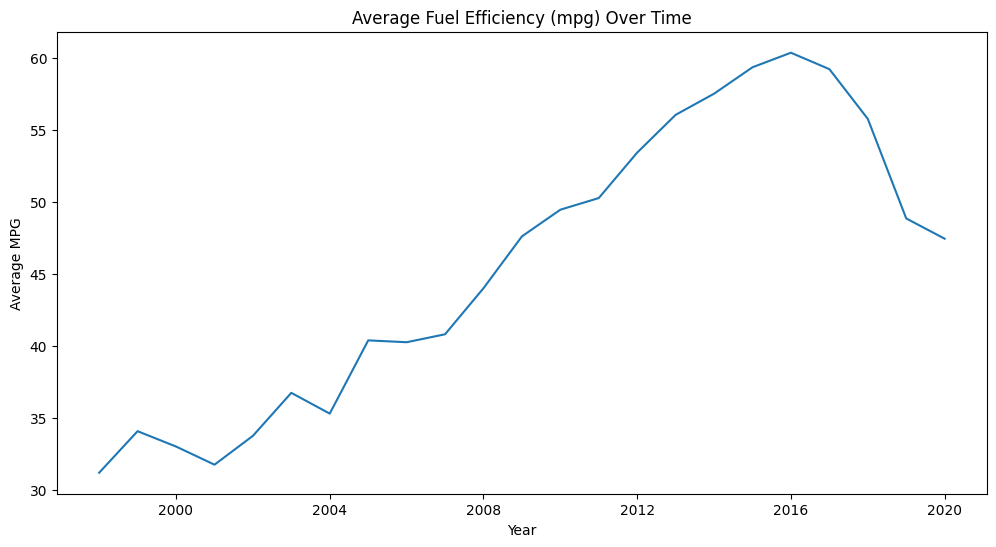

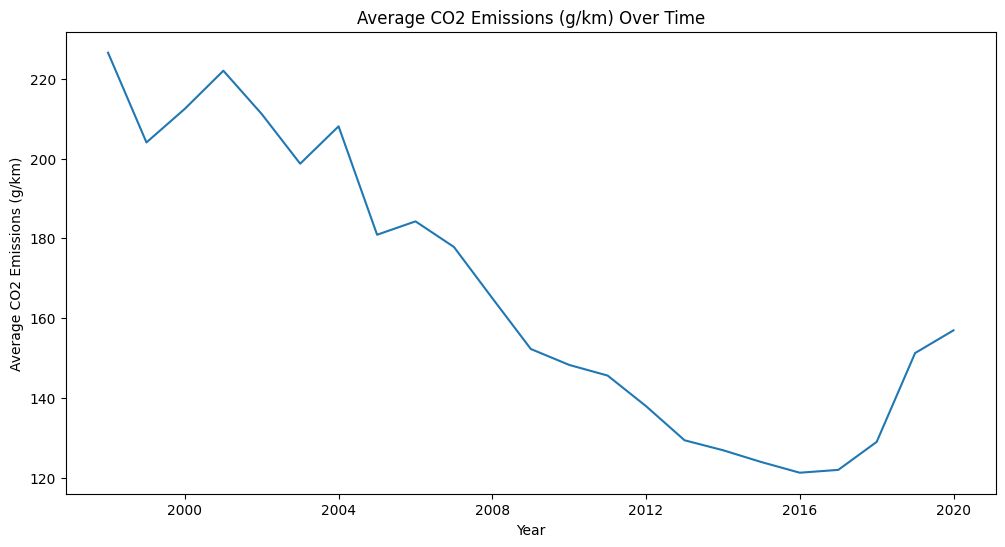

In [ ]:
#Future Trends in Fuel Efficiency and Emissions
#Insight: Identify the progression of fuel efficiency improvements and emissions reductions over the years for different car models.

import matplotlib.pyplot as plt
import seaborn as sns

# Average fuel efficiency and emissions per year
yearly_trends = clean_data.groupby('year')[['mpg', 'CO2 Emissions (g/km)']].mean().reset_index()

# Plotting fuel efficiency trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trends, x='year', y='mpg')
plt.title('Average Fuel Efficiency (mpg) Over Time')
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.show()

# Plotting emissions trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trends, x='year', y='CO2 Emissions (g/km)')
plt.title('Average CO2 Emissions (g/km) Over Time')
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.show()


The models  have the highest depreciation rates, meaning they lose a significant portion of their value over time. These are typically high-end or luxury models, which might have higher initial costs but also tend to lose value rapidly.
The models have the lowest depreciation rates, meaning they retain a larger portion of their value over time. These cars are typically more affordable models, which might not lose value as quickly as their high-end counterparts.

Relation and Insight
Luxury vs. Affordable Models: Luxury cars like the R8, G Class, and X7 have high depreciation rates, reflecting their steep initial price and rapid loss in value over time. On the other hand, more affordable models like the Terracan and Accent tend to depreciate slower, retaining their value better over the years.

Depreciation and Resale Value: Understanding the depreciation rates helps potential buyers and sellers gauge the resale value of cars. High depreciation rates suggest a significant drop in value, affecting resale price negatively. Conversely, low depreciation rates indicate better value retention, positively impacting resale prices.

Market Strategy for Sellers: Car sellers can use this information to strategize their sales. For example, luxury cars might need more aggressive pricing strategies to offset high depreciation, while sellers of affordable models can emphasize their lower depreciation as a selling point.

Consumer Decision Making: For buyers, knowing which models depreciate the most or least can influence purchasing decisions. Those looking for cars that hold value might prefer models with lower depreciation rates, ensuring better returns if they decide to sell the car later.

Overall, these insights highlight the significant differences in how various car models depreciate over time, influencing both consumer behavior and market strategies in the automotive industry.

1. Trends in Fuel Type Popularity Over Time:
Petrol: The graph shows that petrol was the most popular fuel type for cars before 2015, with its popularity peaking around 1998-2000 and then gradually declining.
Diesel: Diesel cars began to gain popularity starting from the early 2000s, with a noticeable increase in their percentage. By around 2015, diesel cars surpassed petrol cars in popularity, although there is a slight decline post-2015.
Hybrid: Hybrid cars show a slow but steady increase in popularity, especially after 2010, reflecting a growing interest in more environmentally friendly vehicles.
Electric: Electric cars remain the least popular over the time period shown but show a slight increase in recent years, indicating a potential growth trend.
Other: Vehicles with other fuel types remain negligible throughout the period.
2. Trends in Transmission Type Popularity Over Time:
Manual: Manual transmission cars were the most popular up until around 2015, after which their popularity sharply declined.
Automatic: Automatic transmission cars saw a steady increase in popularity, overtaking manual cars around 2015.
Semi-Auto: Semi-Automatic transmission cars have shown a consistent but less pronounced increase in popularity over the years.
Other: The category of 'Other' transmissions shows a gradual increase, with a more significant rise post-2015, indicating growing interest in alternative transmission types.
Relationship and Insights:
Fuel Type Trends and Transmission Trends:

Petrol and Manual Transmission: Historically, petrol cars with manual transmissions were dominant. However, the shift towards automatic transmissions can be seen in both petrol and diesel cars over the years.
Diesel and Automatic Transmission: The rise in diesel cars' popularity coincides with the increasing preference for automatic transmissions. This could be due to the fact that diesel engines are often used in vehicles aimed at longer commutes and heavy usage, where automatic transmissions provide more convenience.
Hybrids and Automatics: Hybrid cars, which are designed to be fuel-efficient and environmentally friendly, are more likely to have automatic or semi-automatic transmissions. This aligns with the trend of increasing hybrid car popularity.
Electric Vehicles: Although not explicitly highlighted, electric vehicles are more likely to have automatic transmissions due to their design. The slight increase in electric cars could be reflected in the transmission trends as well.
Consumer Preferences Shift:

The graphs collectively indicate a shift in consumer preferences towards more convenient and potentially more fuel-efficient or environmentally friendly options. The decline in manual transmissions and the rise in automatic, semi-automatic, and alternative transmissions reflect this change.
The gradual increase in hybrid and electric vehicles, although still a small percentage, suggests a growing awareness and adoption of environmentally friendly technology.
Conclusion:
The combined analysis of these two trends indicates a significant shift in the automotive market. Consumers are moving away from traditional petrol and manual transmission vehicles towards diesel, hybrid, and electric vehicles with automatic transmissions. This shift likely reflects broader trends towards convenience, fuel efficiency, and environmental consciousness.








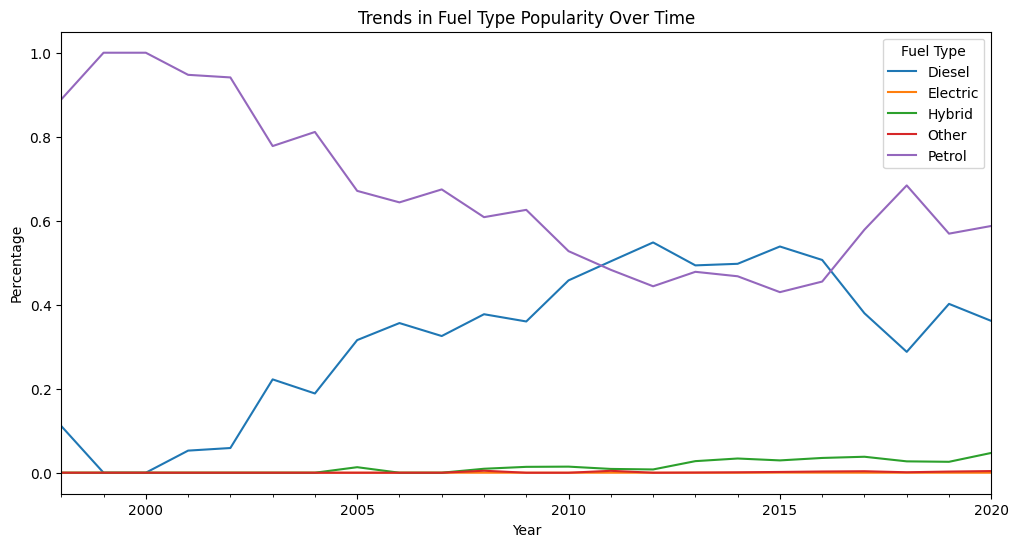

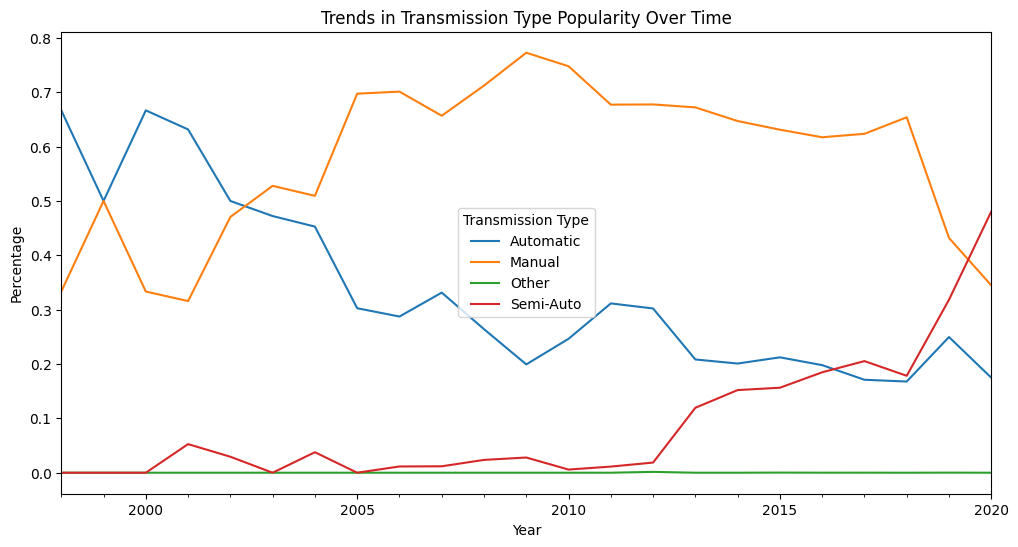

In [ ]:
#Customer Preference Shifts: Analyze shifts in customer preferences over time regarding fuel type, transmission, and car model.
# Popularity of fuel types over the years
fuel_type_trends = clean_data.groupby(['year', 'fuelType']).size().unstack().fillna(0)
fuel_type_trends = fuel_type_trends.div(fuel_type_trends.sum(axis=1), axis=0)  # Normalize to get percentages
# Plotting fuel type trends over time
fuel_type_trends.plot(kind='line', figsize=(12, 6))
plt.title('Trends in Fuel Type Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Fuel Type')
plt.show()

# Popularity of transmission types over the years
transmission_trends = clean_data.groupby(['year', 'transmission']).size().unstack().fillna(0)
transmission_trends = transmission_trends.div(transmission_trends.sum(axis=1), axis=0)  # Normalize to get percentages
# Plotting transmission type trends over time
transmission_trends.plot(kind='line', figsize=(12, 6))
plt.title('Trends in Transmission Type Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Transmission Type')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for transmission and fuelType
label_encoders = {}
for column in ['brand','transmission', 'fuelType', 'model']:
   le = LabelEncoder()
   clean_data[column] = le.fit_transform(clean_data[column])
   label_encoders[column] = le

In [ ]:
# print the mappings
print("\nMappings for Label Encoded Columns:")
for column, le in label_encoders.items():
    print(f"\n{column}:")
    for idx, class_ in enumerate(le.classes_):
        print(f"{idx} -> {class_}")


Mappings for Label Encoded Columns:

brand:
0 -> Audi
1 -> BMW
2 -> Ford
3 -> Hyundai
4 -> Mercedes-Benz
5 -> Skoda
6 -> Toyota
7 -> Vauxhall
8 -> Volkswagen

transmission:
0 -> Automatic
1 -> Manual
2 -> Other
3 -> Semi-Auto

fuelType:
0 -> Diesel
1 -> Electric
2 -> Hybrid
3 -> Other
4 -> Petrol

model:
0 ->  1 Series
1 ->  2 Series
2 ->  3 Series
3 ->  4 Series
4 ->  5 Series
5 ->  6 Series
6 ->  7 Series
7 ->  8 Series
8 ->  A Class
9 ->  A1
10 ->  A2
11 ->  A3
12 ->  A4
13 ->  A5
14 ->  A6
15 ->  A7
16 ->  A8
17 ->  Accent
18 ->  Adam
19 ->  Agila
20 ->  Amarok
21 ->  Amica
22 ->  Ampera
23 ->  Antara
24 ->  Arteon
25 ->  Astra
26 ->  Auris
27 ->  Avensis
28 ->  Aygo
29 ->  B Class
30 ->  B-MAX
31 ->  Beetle
32 ->  C Class
33 ->  C-HR
34 ->  C-MAX
35 ->  CC
36 ->  CL Class
37 ->  CLA Class
38 ->  CLC Class
39 ->  CLK
40 ->  CLS Class
41 ->  Caddy
42 ->  Caddy Life
43 ->  Caddy Maxi
44 ->  Caddy Maxi Life
45 ->  California
46 ->  Camry
47 ->  Caravelle
48 ->  Cascada
49 ->  Citigo


The correlation heatmap provides a visual representation of the relationships between different variables in the dataset. Here's an interpretation of the key findings from the heatmap:

Key Insights:
CO2 Emissions:

Positive Correlation with Tax (0.23): Cars with higher CO2 emissions tend to have higher tax values, which is logical given that many tax systems penalize higher emissions.
Negative Correlation with MPG (-0.32): There is a negative correlation between CO2 emissions and miles per gallon (MPG). Higher fuel efficiency (more MPG) generally leads to lower CO2 emissions.
Positive Correlation with Engine Size (0.19): Larger engines tend to produce more CO2 emissions, which is consistent with the general understanding of vehicle emissions.
Price:

Positive Correlation with Engine Size (0.64): Cars with larger engines are generally more expensive.
Negative Correlation with Mileage (-0.42): Cars with higher mileage tend to have lower prices, indicating depreciation with increased usage.
Positive Correlation with Year (0.50): Newer cars tend to be more expensive.
Year:

Negative Correlation with Mileage (-0.75): Newer cars typically have lower mileage.
Positive Correlation with Car Age (-1): There is a strong negative correlation, which makes sense because as the year increases (i.e., the car is newer), the age of the car decreases.
Mileage:

Positive Correlation with Car Age (0.75): Older cars tend to have higher mileage, which is expected as they have been on the road longer.
Fuel Type:

Negative Correlation with Engine Size (-0.51): This suggests that certain fuel types (likely hybrid or electric) tend to have smaller engine sizes compared to traditional fuel types like petrol and diesel.
Transmission:

Moderate Positive Correlation with Price (0.24): Cars with certain types of transmissions (likely automatic) are generally more expensive.
Interpreting the Heatmap:
Red Color (Positive Correlation): Indicates that as one variable increases, the other variable also tends to increase. For example, price and engine size have a strong positive correlation (0.64), suggesting that larger engine sizes are associated with higher car prices.
Blue Color (Negative Correlation): Indicates that as one variable increases, the other variable tends to decrease. For example, year and mileage have a strong negative correlation (-0.75), indicating that newer cars tend to have lower mileage.
Values Near Zero: Suggest little to no linear relationship between the variables. For instance, the correlation between model and other numerical variables like price and transmission is near zero, suggesting no direct linear relationship.
Conclusion:
This correlation heatmap provides valuable insights into how different variables are interrelated in the dataset. It helps in understanding the factors that influence car prices, emissions, and other key aspects, which can be crucial for making data-driven decisions in the automotive industry.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(12, 10))

# Adjust the font size
sns.set(font_scale=1.2)

# Create the heatmap with a better color palette and annotations
correlation_matrix = clean_data.corr()
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 12})

# Title and labels
heatmap.set_title('Correlation Heatmap', fontsize=18)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

plt.show()


ValueError: could not convert string to float: '1-2L'

<Figure size 1200x1000 with 0 Axes>

Distribution of Car Prices: Car prices vary widely, with a significant number of cars priced between 10,000 and 30,000.
Age vs. Price: There's a noticeable negative correlation between age and price; as the car gets older, its price tends to decrease.
Mileage vs. Price: Higher mileage generally corresponds to lower prices, indicating that more used cars depreciate faster.
Fuel Type vs. Price: Diesel and petrol cars show different price distributions, with some indication that fuel type might affect the price.
Engine Size vs. Price: There is some correlation between engine size and price, suggesting that larger engines might fetch higher prices.

Based on the statistical analysis and modeling results, the following factors significantly affect car depreciation:

Age and Mileage: Older cars and cars with higher mileage tend to have lower resale values.
Fuel Type: There are significant differences in resale values among different fuel types.
Engine Size: Larger engines generally correspond to higher prices.
Recommendations
Buyers:
Opt for cars with lower mileage and newer models for better resale value.
Consider fuel type as a significant factor in long-term value retention.
Dealers:
Price used cars based on comprehensive analysis of age, mileage, fuel type, and engine size.
Use the provided model to forecast future resale values and adjust pricing strategies accordingly.

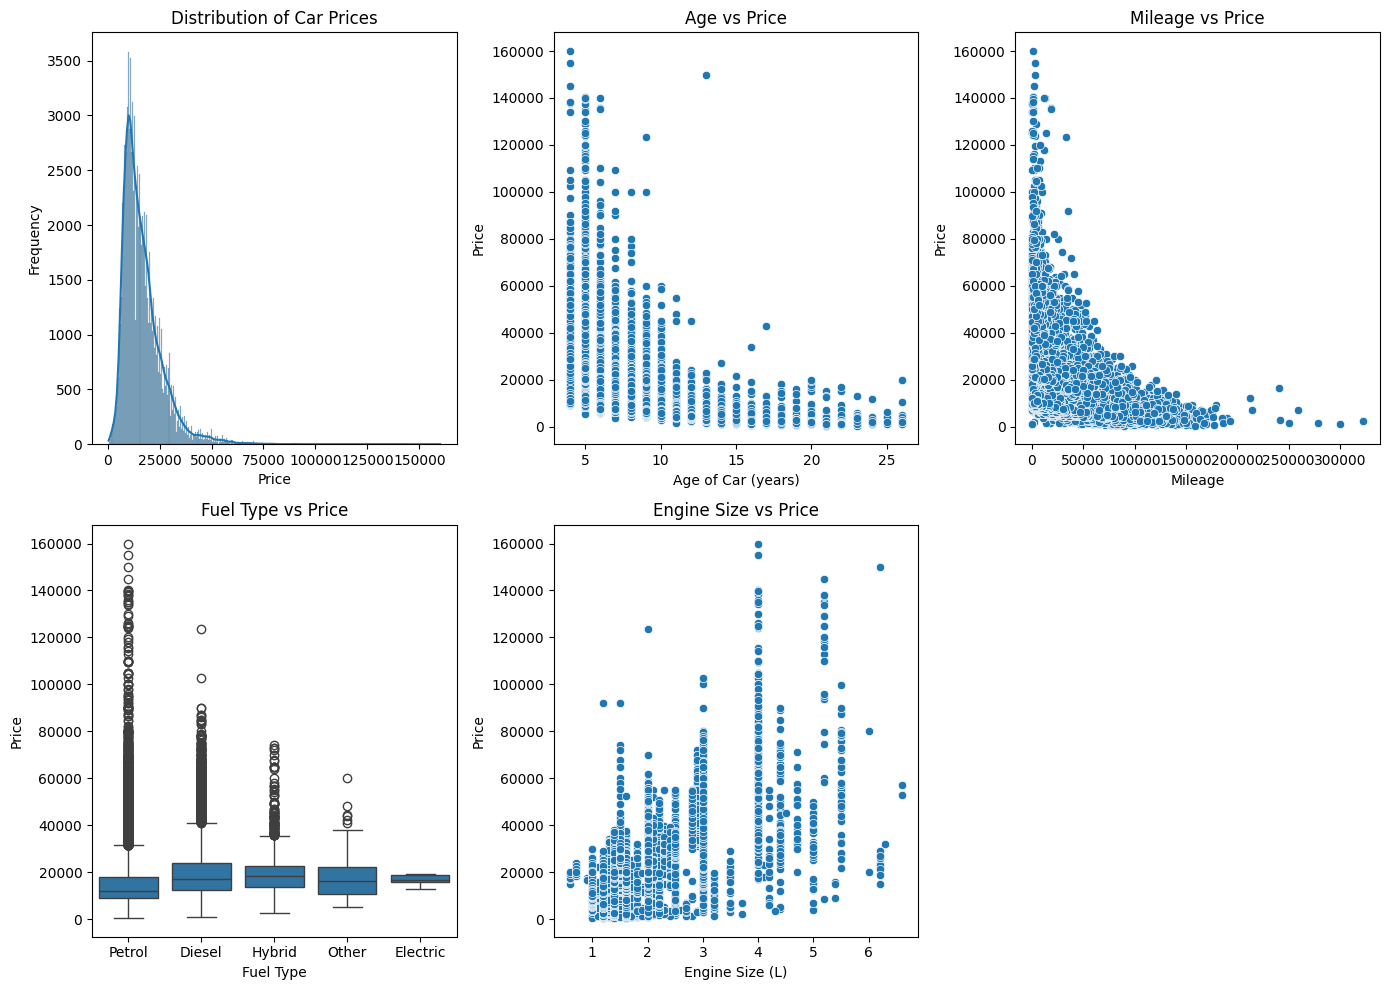

In [ ]:
#How do different features impact the pricing of cars in the UK automotive market?
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Distribution of car prices
plt.subplot(2, 3, 1)
sns.histplot(clean_data['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Relationship between age and price
plt.subplot(2, 3, 2)
sns.scatterplot(x='car_age', y='price', data=clean_data)
plt.title('Age vs Price')
plt.xlabel('Age of Car (years)')
plt.ylabel('Price')

# Relationship between mileage and price
plt.subplot(2, 3, 3)
sns.scatterplot(x='mileage', y='price', data=clean_data)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')

# Relationship between fuel type and price
plt.subplot(2, 3, 4)
sns.boxplot(x='fuelType', y='price', data=clean_data)
plt.title('Fuel Type vs Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')

# Relationship between engine size and price
plt.subplot(2, 3, 5)
sns.scatterplot(x='engineSize', y='price', data=clean_data)
plt.title('Engine Size vs Price')
plt.xlabel('Engine Size (L)')
plt.ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()


Insights for the UK Automotive Industry
Rise of Hybrid and Electric Vehicles:

High Fuel Efficiency: The most fuel-efficient cars are predominantly hybrids and electric vehicles. Models like the BMW i3, Hyundai Ioniq, and Vauxhall Ampera show exceptional fuel efficiency, indicating a strong market trend towards hybrid and electric vehicles.
Environmental Impact: These vehicles are not only cost-effective but also environmentally friendly. The UK government and automotive industry should continue to incentivize the adoption of hybrid and electric cars to reduce carbon emissions.
Engine Size and Fuel Efficiency:

Smaller Engines in Efficient Cars: The most fuel-efficient cars typically have smaller engine sizes (e.g., 0.6L to 2.5L), which suggests that reducing engine size can significantly improve fuel efficiency.
Larger Engines in Less Efficient Cars: The least fuel-efficient cars have larger engines (e.g., 2.3L to 5.2L), highlighting the trade-off between performance and fuel efficiency. For high-performance models, the industry might need to focus on improving engine technologies to balance power and efficiency.
Transmission Types:

Automatic Dominance: Both the most and least fuel-efficient models are predominantly automatic, indicating a consumer preference for automatic transmissions despite the varying fuel efficiencies.
Manual Transmissions: Manual transmissions are less common in both categories, appearing mostly in less fuel-efficient models. This might reflect a shift in consumer preference towards the convenience of automatic transmissions.
Fuel Type Preferences:

Hybrid Vehicles: Hybrid vehicles dominate the list of the most fuel-efficient cars. The industry should capitalize on this trend by offering more hybrid options across different car models.
Diesel Vehicles: Diesel engines appear in the least fuel-efficient list, particularly in larger vehicles. The industry should explore advancements in diesel technology or encourage the transition to alternative fuels.
Consumer Education:

Awareness Campaigns: The industry should focus on educating consumers about the benefits of fuel-efficient vehicles, including cost savings and environmental impact. Awareness campaigns can promote the adoption of hybrid and electric vehicles.

Insights
1. Fuel Efficiency Leaders
The most fuel-efficient car models are predominantly hybrids and electric vehicles, indicating a strong presence of advanced fuel-efficient technologies in the top segment.
Models like the i3, Ioniq, and Ampera show significant advancements in hybrid and electric powertrains, offering very high mpg values.
2. Traditional vs. Advanced Fuel Types
Diesel and Petrol cars generally fall into the least fuel-efficient category, with traditional performance models like the Mustang, RS3, and M4 having the lowest fuel efficiency.
This suggests a potential area for improvement and innovation in traditional fuel segments or a shift towards more hybrid and electric offerings.
3. Impact of Engine Size
The least fuel-efficient models generally have larger engine sizes, emphasizing the trade-off between performance and fuel efficiency.
Conversely, smaller engine sizes in the most fuel-efficient models highlight the effectiveness of downsizing and hybrid technologies in improving fuel economy.
Usefulness to the UK Automotive Industry
1. Innovation and R&D Focus
Insights into the fuel efficiency of different models can guide manufacturers on where to focus their research and development efforts. Emphasizing advancements in hybrid and electric technologies can help improve overall fleet fuel efficiency.
2. Regulatory Compliance
With stringent environmental regulations, understanding fuel efficiency helps manufacturers ensure compliance and avoid penalties. This can also guide future product development towards more eco-friendly options.
3. Marketing and Positioning
Car manufacturers can use these insights to market their most fuel-efficient models, appealing to environmentally conscious consumers. Highlighting superior fuel efficiency can differentiate brands in a competitive market.
4. Customer Education
Educating customers about the benefits of fuel-efficient models can drive consumer preference towards hybrid and electric vehicles. This can be part of a broader strategy to shift consumer behavior towards sustainable choices.
5. Strategic Planning
Manufacturers can use these insights for strategic planning, including setting targets for fleet fuel efficiency, planning product launches, and aligning with government policies on emissions and fuel consumption.

In [ ]:
import pandas as pd

# Sort by mpg to get the top and bottom fuel-efficient models
sorted_data = clean_data.sort_values(by='mpg', ascending=False)

# Identify the most fuel-efficient car models
top_fuel_efficient_models = sorted_data[['model', 'mpg', 'fuelType', 'transmission', 'engineSize']].drop_duplicates(subset='model').head(20)

# Identify the  least fuel-efficient car models
least_fuel_efficient_models = sorted_data[['model', 'mpg', 'fuelType', 'transmission', 'engineSize']].drop_duplicates(subset='model').tail(20)

# Display the results
print(" Most Fuel-Efficient Car Models:")
print(top_fuel_efficient_models)

print(" Least Fuel-Efficient Car Models:")
print(least_fuel_efficient_models)


 Most Fuel-Efficient Car Models:
           model    mpg fuelType transmission  engineSize
21201         i3  470.8   Hybrid    Automatic         0.7
42425      Ioniq  256.8   Hybrid    Automatic         1.6
70858     Ampera  235.4   Hybrid    Automatic         1.5
67545      Prius  235.0   Hybrid    Automatic         1.8
49783    C Class  217.3   Hybrid    Automatic         2.0
38531       Kuga  201.8   Hybrid    Semi-Auto         2.5
63095     Superb  201.8   Hybrid    Automatic         1.4
54060    E Class  201.8   Hybrid    Automatic         2.0
86128       Golf  188.3   Hybrid    Automatic         1.4
20703         X5  188.3   Hybrid    Semi-Auto         3.0
1790          A3  188.3   Hybrid    Automatic         1.4
90003     Passat  166.0   Hybrid    Automatic         1.4
18107   5 Series  156.9   Hybrid    Automatic         2.0
9634          Q7  156.9   Diesel    Automatic         3.0
14742   3 Series  148.7    Other    Automatic         2.0
13446   2 Series  148.7   Hybrid    Aut

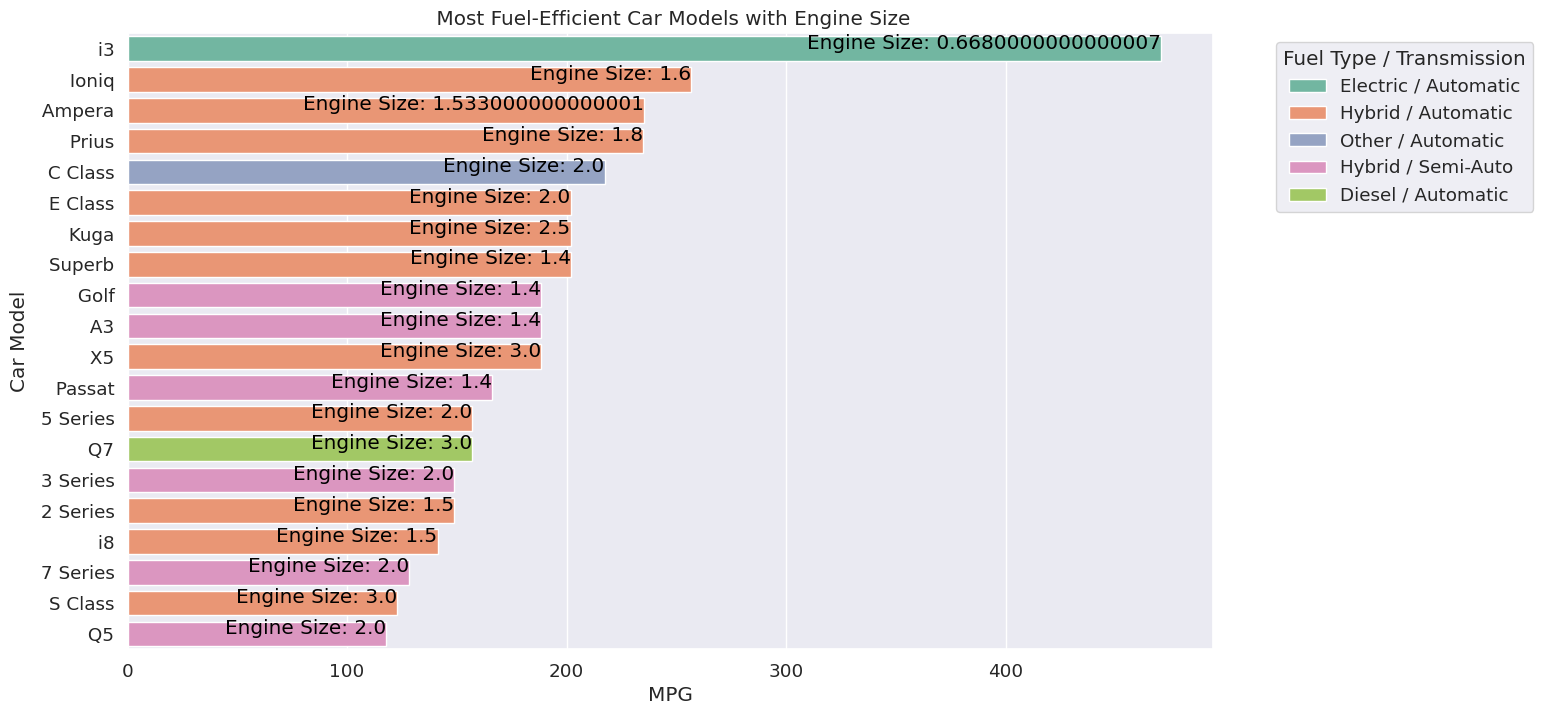

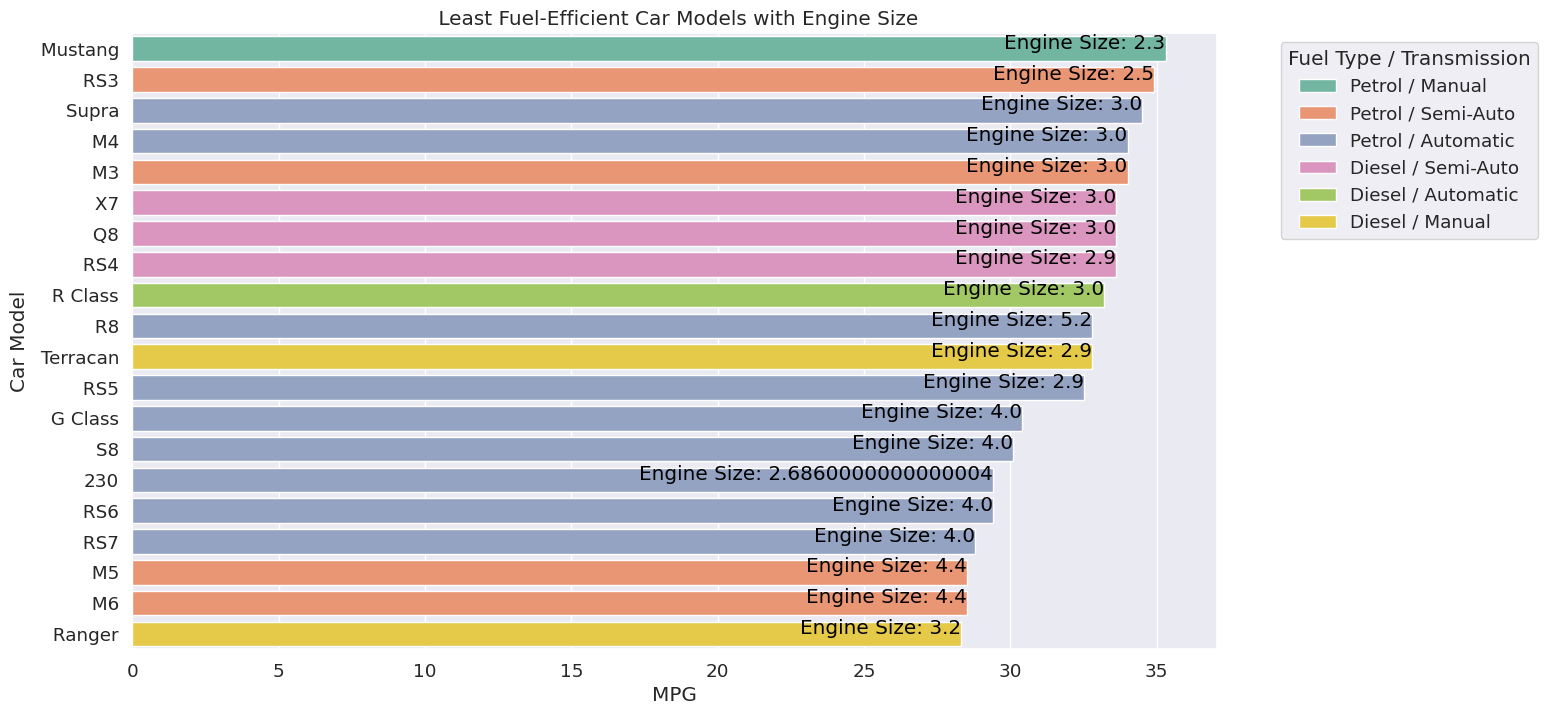

In [ ]:
# Combine fuel type and transmission into one column for labeling
top_fuel_efficient_models['fuel_trans'] = top_fuel_efficient_models['fuelType'] + ' / ' + top_fuel_efficient_models['transmission']
least_fuel_efficient_models['fuel_trans'] = least_fuel_efficient_models['fuelType'] + ' / ' + least_fuel_efficient_models['transmission']

# Plotting the  most fuel-efficient car models with engine size
plt.figure(figsize=(14, 8))
sns.barplot(data=top_fuel_efficient_models, x='mpg', y='model', hue='fuel_trans', dodge=False, palette='Set2')
for i in range(len(top_fuel_efficient_models)):
    plt.text(top_fuel_efficient_models['mpg'].iloc[i], i, f"Engine Size: {top_fuel_efficient_models['engineSize'].iloc[i]}", color='black', ha="right")
plt.title(' Most Fuel-Efficient Car Models with Engine Size')
plt.xlabel('MPG')
plt.ylabel('Car Model')
plt.legend(title='Fuel Type / Transmission', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plotting the  least fuel-efficient car models with engine size
plt.figure(figsize=(14, 8))
sns.barplot(data=least_fuel_efficient_models, x='mpg', y='model', hue='fuel_trans', dodge=False, palette='Set2')
for i in range(len(least_fuel_efficient_models)):
    plt.text(least_fuel_efficient_models['mpg'].iloc[i], i, f"Engine Size: {least_fuel_efficient_models['engineSize'].iloc[i]}", color='black', ha="right")
plt.title(' Least Fuel-Efficient Car Models with Engine Size')
plt.xlabel('MPG')
plt.ylabel('Car Model')
plt.legend(title='Fuel Type / Transmission', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
#Market Share Analysis
#To analyze the market share of different brands and models over time, we need to aggregate the data by brand.
# Extracting brand information from the model data
clean_data['brand'] = clean_data['brand'].apply(lambda x: x.split()[0])

# Calculating market share by brand
market_share = clean_data['brand'].value_counts(normalize=True) * 100

# Displaying the top brands by market share
top_brands_market_share = market_share.head(10)


top_brands_market_share


brand
Ford             18.635759
Volkswagen       15.115040
Vauxhall         13.453634
Mercedes-Benz    13.332860
BMW              10.819945
Audi             10.718454
Toyota            6.798875
Skoda             6.280257
Hyundai           4.845176
Name: proportion, dtype: float64

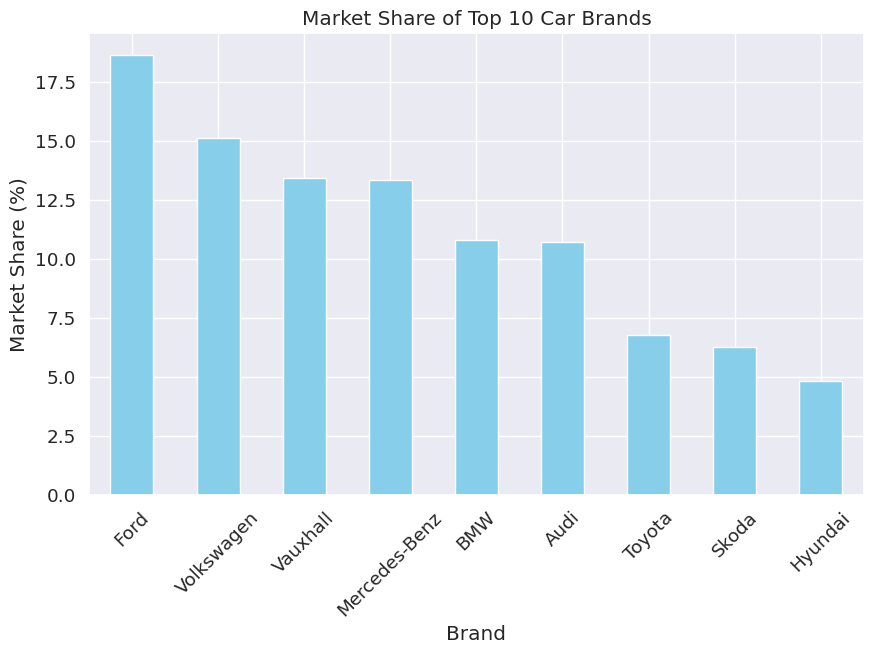

In [ ]:
import matplotlib.pyplot as plt

# Top 10 brands by market share
top_10_brands = top_brands_market_share.head(10)

# Plotting the market share of top 10 brands
plt.figure(figsize=(10, 6))
top_10_brands.plot(kind='bar', color='skyblue')
plt.title('Market Share of Top 10 Car Brands')
plt.xlabel('Brand')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Competitive Pricing Analysis
#To compare pricing strategies of competitors and their impact on sales, we need to analyze the average prices of models from different brands.

# Calculating the average price for the top brands
top_brands = top_brands_market_share.index
average_prices_by_brand = clean_data[clean_data['brand'].isin(top_brands)].groupby('brand')['price'].mean()

average_prices_by_brand.head(10)


brand
Audi             22852.714516
BMW              22697.122221
Ford             12322.828722
Hyundai          12727.809384
Mercedes-Benz    24604.980665
Skoda            14284.802683
Toyota           12529.799074
Vauxhall         10314.952323
Volkswagen       16807.898073
Name: price, dtype: float64

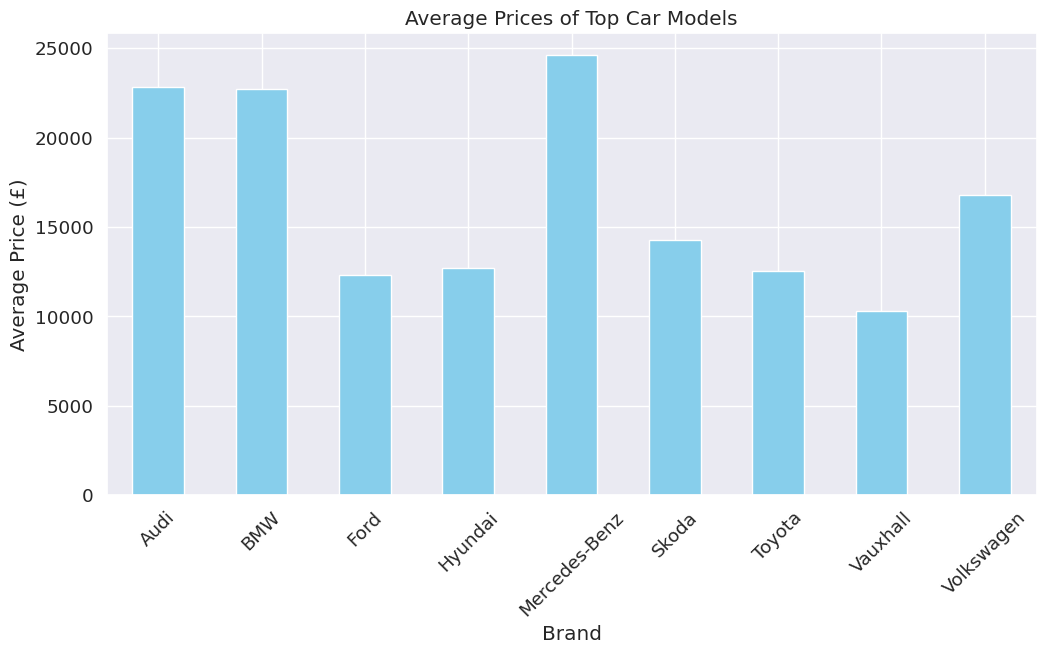

In [ ]:
import matplotlib.pyplot as plt

# Plotting the average prices by brand
plt.figure(figsize=(12, 6))
average_prices_by_brand.plot(kind='bar', color='skyblue')
plt.title('Average Prices of Top Car Models')
plt.xlabel('Brand')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.show()


Luxury: High-quality vehicles with premium features and superior comfort.

Compact: Small-sized vehicles designed for efficient urban commuting.

SUV (Sport Utility Vehicle): Versatile vehicles known for spacious interiors and off-road capabilities.

Electric: Vehicles powered entirely by electric batteries, offering zero emissions.

Hybrid: Vehicles combining an internal combustion engine with an electric motor for improved fuel efficiency.

Sports: High-performance vehicles designed for agility and driving pleasure.

Van: Larger vehicles designed for transporting goods or people, offering ample space.

Pickup: Trucks with an open cargo area, known for towing capabilities and utility.

Mid-size: Vehicles balancing space and comfort, more maneuverable and fuel-efficient than larger cars.

Other: Vehicles that do not fit neatly into the above segments, such as specialized commercial vehicles.

In [ ]:
#Adding segment column
segment_mapping = {
    # BMW Models
    '5 Series': 'Luxury', '6 Series': 'Luxury', '1 Series': 'Compact', '7 Series': 'Luxury', '2 Series': 'Compact',
    '4 Series': 'Luxury', 'X3': 'SUV', '3 Series': 'Compact', 'X5': 'SUV', 'X4': 'SUV', 'i3': 'Electric', 'X1': 'SUV',
    'M4': 'Sports', 'X2': 'SUV', 'X6': 'SUV', '8 Series': 'Luxury', 'Z4': 'Sports', 'X7': 'SUV', 'M5': 'Sports',
    'i8': 'Hybrid', 'M2': 'Sports', 'M3': 'Sports', 'M6': 'Sports', 'Z3': 'Sports',

    # Audi Models
    'A1': 'Compact', 'A6': 'Luxury', 'A4': 'Luxury', 'A3': 'Compact', 'Q3': 'SUV', 'Q5': 'SUV', 'A5': 'Luxury',
    'S4': 'Sports', 'Q2': 'SUV', 'A7': 'Luxury', 'TT': 'Sports', 'Q7': 'SUV', 'RS6': 'Sports', 'RS3': 'Sports',
    'A8': 'Luxury', 'Q8': 'SUV', 'RS4': 'Sports', 'RS5': 'Sports', 'R8': 'Sports', 'SQ5': 'SUV', 'S8': 'Luxury',
    'SQ7': 'SUV', 'S3': 'Sports', 'S5': 'Sports', 'A2': 'Compact', 'RS7': 'Sports',

    # Skoda Models
    'Octavia': 'Compact', 'Citigo': 'Compact', 'Yeti Outdoor': 'SUV', 'Superb': 'Luxury', 'Kodiaq': 'SUV',
    'Rapid': 'Compact', 'Karoq': 'SUV', 'Fabia': 'Compact', 'Yeti': 'SUV', 'Scala': 'Compact', 'Roomster': 'Compact',
    'Kamiq': 'SUV',

    # Volkswagen Models
    'T-Roc': 'SUV', 'Golf': 'Compact', 'Passat': 'Luxury', 'T-Cross': 'SUV', 'Polo': 'Compact',
    'Tiguan': 'SUV', 'Sharan': 'SUV', 'Up': 'Compact', 'Scirocco': 'Sports', 'Beetle': 'Compact', 'Caddy Maxi Life': 'Van',
    'Caravelle': 'Van', 'Touareg': 'SUV', 'Arteon': 'Luxury', 'Touran': 'Compact', 'Golf SV': 'Compact', 'Amarok': 'Pickup',
    'Tiguan Allspace': 'SUV', 'Shuttle': 'Van', 'Jetta': 'Compact', 'CC': 'Luxury', 'California': 'Van', 'Caddy Life': 'Van',
    'Caddy': 'Van', 'Caddy Maxi': 'Van', 'Eos': 'Luxury', 'Fox': 'Compact',

    # Hyundai Models
    'I20': 'Compact', 'Tucson': 'SUV', 'I10': 'Compact', 'IX35': 'SUV', 'I30': 'Compact', 'I40': 'Luxury',
    'Ioniq': 'Hybrid', 'Kona': 'SUV', 'Veloster': 'Sports', 'I800': 'Van', 'IX20': 'Compact', 'Santa Fe': 'SUV',
    'Accent': 'Compact', 'Terracan': 'SUV', 'Getz': 'Compact', 'Amica': 'Compact',

    # Toyota Models
    'GT86': 'Sports', 'Corolla': 'Compact', 'RAV4': 'SUV', 'Yaris': 'Compact', 'Auris': 'Compact', 'Aygo': 'Compact',
    'C-HR': 'SUV', 'Prius': 'Electric', 'Avensis': 'Luxury', 'Verso': 'Compact', 'Hilux': 'Pickup', 'PROACE VERSO': 'Van',
    'Land Cruiser': 'SUV', 'Supra': 'Sports', 'Camry': 'Luxury', 'Verso-S': 'Compact', 'IQ': 'Compact', 'Urban Cruiser': 'SUV',

    # Ford Models
    'Fiesta': 'Compact', 'Puma': 'SUV', 'Kuga': 'SUV', 'EcoSport': 'SUV', 'C-MAX': 'SUV', 'Mondeo': 'Mid-size',
    'Ka+': 'Compact', 'Tourneo Custom': 'Van', 'S-MAX': 'SUV', 'B-MAX': 'SUV', 'Edge': 'SUV', 'Tourneo Connect': 'Van',
    'Grand C-MAX': 'SUV', 'KA': 'Compact', 'Galaxy': 'SUV', 'Mustang': 'Sports', 'Grand Tourneo Connect': 'Van',
    'Fusion': 'Compact', 'Ranger': 'Pickup', 'Streetka': 'Sports', 'Transit Tourneo': 'Van', 'Focus': 'Compact',

    # Mercedes-Benz Models
    'SLK': 'Sports', 'S Class': 'Luxury', 'SL CLASS': 'Luxury', 'G Class': 'SUV', 'GLE Class': 'SUV', 'GLA Class': 'SUV',
    'A Class': 'Compact', 'B Class': 'Compact', 'GLC Class': 'SUV', 'C Class': 'Luxury', 'E Class': 'Luxury', 'GL Class': 'SUV',
    'CLS Class': 'Luxury', 'CLC Class': 'Luxury', 'CLA Class': 'Luxury', 'V Class': 'Van', 'M Class': 'SUV', 'CL Class': 'Luxury',
    'GLS Class': 'SUV', 'GLB Class': 'SUV', 'X-CLASS': 'Pickup', 'CLK': 'Luxury', 'R Class': 'SUV', '180': 'Compact', '230': 'Compact',
    '220': 'Compact', '200': 'Compact',

    # Vauxhall Models
    'Corsa': 'Compact', 'Astra': 'Compact', 'Viva': 'Compact', 'Mokka': 'SUV', 'Mokka X': 'SUV', 'Crossland X': 'SUV',
    'Zafira': 'Compact', 'Meriva': 'Compact', 'Zafira Tourer': 'Compact', 'Adam': 'Compact', 'Grandland X': 'SUV', 'Antara': 'SUV',
    'Insignia': 'Luxury', 'Ampera': 'Electric', 'GTC': 'Sports', 'Combo Life': 'Van', 'Vivaro': 'Van', 'Cascada': 'Luxury',
    'Kadjar': 'SUV', 'Agila': 'Compact', 'Tigra': 'Sports', 'Vectra': 'Compact',
}

# Function to assign segment based on model
def assign_segment(model_name):
    for key, value in segment_mapping.items():
        if key.lower() in model_name.lower():
            return value
    return 'Other'

# Apply the function to the 'model' column
clean_data['segment'] = clean_data['model'].apply(assign_segment)


In [ ]:
clean_data.head()

brand model  year   price transmission   mileage    tax   mpg fuelType  \
0  Audi    A1  2010  9990.0    Automatic   38000.0  125.0  53.3   Petrol   
1  Audi    A1  2011  6295.0       Manual  107000.0  125.0  53.3   Petrol   
2  Audi    A1  2011  6995.0       Manual   65000.0  125.0  53.3   Petrol   
3  Audi    A1  2011  4250.0       Manual  116000.0   20.0  70.6   Diesel   
4  Audi    A1  2011  7495.0       Manual   60700.0  125.0  53.3   Petrol   

   engineSize  car_age  CO2 Emissions (g/km)  segment  
0         1.4       14            126.771512  Compact  
1         1.4       13            126.771512  Compact  
2         1.4       13            126.771512  Compact  
3         1.6       13            105.629915  Compact  
4         1.4       13            126.771512  Compact

Analysis:
Brand Dominance in Segments:
Ford has a significant presence in the Compact segment with a very high number of models (12830).
Mercedes-Benz leads in the Luxury segment with 7608 models.
Hyundai shows a substantial number in the Electric segment (535), indicating its focus on electric vehicle production.
Vauxhall has a high number of models in the Compact segment (10714), similar to Ford.
Volkswagen has a diverse presence but stands out in the Compact segment with 9586 models and significant numbers in the SUV segment (3449).

Niche Segments:
The Pickup segment has limited representation, with Ford showing the highest count (512).
Van and Mid-size segments are also sparsely populated across brands, indicating lesser focus or market presence in these categories.

Emerging Trends:
The presence of Electric and Hybrid models, especially for brands like Hyundai and Toyota, shows a trend towards environmentally friendly vehicles.
The growth in the SUV segment across various brands indicates a consumer preference shift towards larger, versatile vehicles.


Insights for the UK Automotive Industry

Focus on Compact and Luxury:
Brands like Ford and Vauxhall have a strong foothold in the Compact segment. This indicates high consumer demand for affordable, efficient cars.
Mercedes-Benz’s dominance in the Luxury segment suggests a stable market for high-end vehicles, emphasizing the need for continuous innovation and maintaining premium quality.

Growth Potential in SUVs and Electric Vehicles:
The increasing number of SUV models across various brands points to a growing market segment. Manufacturers should capitalize on this trend by introducing new models and enhancing features specific to SUVs.
The significant presence of Electric and Hybrid models in Hyundai and Toyota’s lineup highlights a shift towards greener vehicles. Other brands can explore this segment further to meet the rising demand for sustainable transportation options.

Identifying Gaps:
The limited models in the Pickup and Van segments suggest an opportunity for brands to explore these areas, especially for utility and commercial use cases.
Mid-size vehicles also show potential for growth, with room for more models catering to families and business users.

Strategic Positioning:
Understanding the dominance of certain brands in specific segments can help companies position their new models strategically. For instance, brands competing with Ford and Vauxhall in the Compact segment need to emphasize unique selling points like advanced technology, better fuel efficiency, or competitive pricing.

segment        Compact  Electric  Hybrid  Luxury  Mid-size  Pickup     SUV  \
brand                                                                        
Audi            3255.0       0.0     0.0  3240.0       0.0     0.0  3537.0   
BMW             5583.0      43.0    17.0  2289.0       0.0     0.0  2410.0   
Ford           12354.0       0.0     0.0     0.0     512.0     1.0  5279.0   
Hyundai         1555.0     535.0   392.0   121.0       0.0     0.0  2168.0   
Mercedes-Benz   3151.0       0.0     0.0  7184.0       0.0    73.0  2431.0   
Skoda           3832.0       0.0     0.0   784.0       0.0     0.0  1572.0   
Toyota          5183.0     232.0     0.0   125.0       0.0    85.0  1001.0   
Vauxhall       10714.0       3.0     0.0  1019.0       0.0     0.0  1261.0   
Volkswagen      9586.0       0.0     0.0  1223.0       0.0   111.0  3449.0   

segment        Sports    Van  
brand                         
Audi            529.0    0.0  
BMW             319.0    0.0  
Ford             

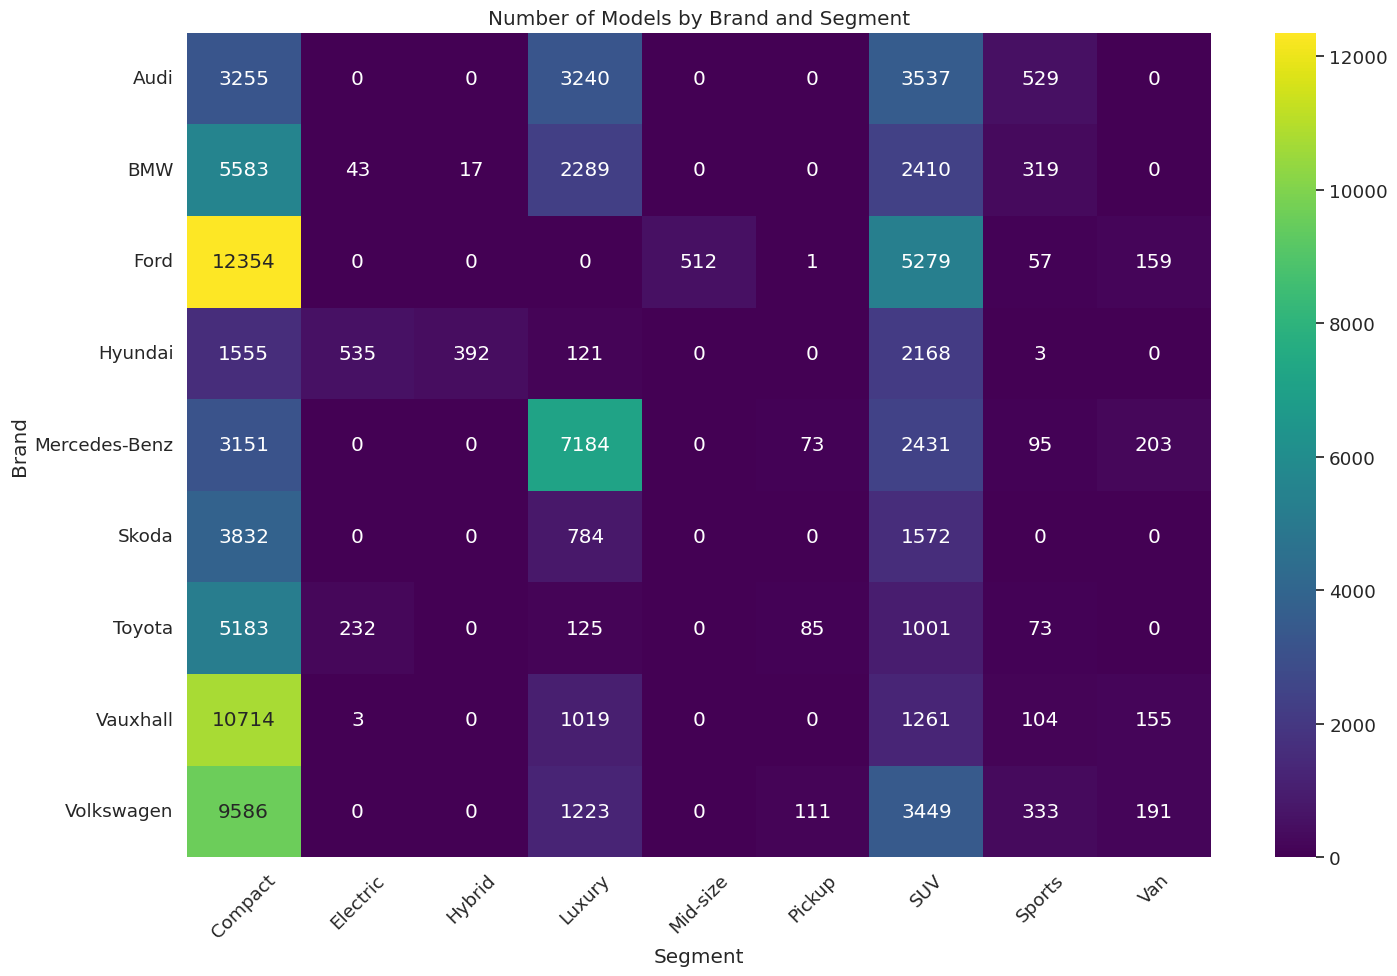

In [ ]:
# Group by brand and segment, then count the occurrences
brand_segment_count = clean_data.groupby(['brand', 'segment']).size().reset_index(name='model_count')

# Pivot the table to get a clearer view
brand_segment_pivot = brand_segment_count.pivot(index='brand', columns='segment', values='model_count').fillna(0)

# Display the table
print(brand_segment_pivot)

# Save the result to a CSV file
brand_segment_pivot.to_csv('brand_segment_model_count.csv')

# Visualize the result
plt.figure(figsize=(15, 10))
sns.heatmap(brand_segment_pivot, annot=True, fmt=".0f", cmap='viridis')
plt.title('Number of Models by Brand and Segment')
plt.xlabel('Segment')
plt.ylabel('Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:
Luxury Segment:

Luxury cars show a steady increase in average prices over the years, with a noticeable spike around 2019-2020.
This trend suggests a growing demand or enhanced features and technologies in luxury vehicles that justify higher prices.
SUV Segment:

SUVs have seen a consistent rise in average prices, especially from 2010 onwards. This reflects the increasing popularity of SUVs as preferred vehicles due to their versatility and features.
The significant price rise in recent years indicates the introduction of more high-end models and advancements in SUV technology.
Electric Segment:

The prices for electric vehicles (EVs) have shown a sharp increase starting from around 2018. This can be attributed to the higher initial costs associated with battery technology and the entry of premium EV models into the market.
The rise in EV prices reflects the industry's shift towards sustainable transportation and the development of high-performance electric vehicles.
Hybrid Segment:

Hybrid cars also show an upward trend in prices, particularly after 2015. This is likely due to advancements in hybrid technology and the introduction of more premium hybrid models.
The trend suggests increasing consumer acceptance and demand for environmentally friendly vehicles that offer a balance between fuel efficiency and performance.
Sports Segment:

The sports car segment has experienced fluctuations, but a general upward trend is evident. The spikes in prices suggest the release of high-end sports models with advanced features and performance capabilities.
This indicates a niche market where consumers are willing to pay premium prices for performance-oriented vehicles.
Van Segment:

Vans show a varied trend with significant price increases around 2010 and 2015, which may be due to the introduction of more utility-focused models with better features.
The prices seem to stabilize post-2015, reflecting a mature market for vans with consistent demand.
Pickup Segment:

Pickup trucks have shown a sharp increase in prices, especially post-2015. This could be due to the introduction of more versatile and technologically advanced models catering to both utility and lifestyle markets.
The steep rise in prices indicates the segment's growing appeal and the value consumers place on these vehicles' robustness and utility.
Compact and Mid-size Segments:

Both segments exhibit a steady increase in prices, indicating consistent demand and gradual improvements in vehicle features and efficiency.
The moderate price rise reflects their popularity as practical, everyday vehicles for a broad consumer base.
Implications for the UK Automotive Industry:
Investment in Luxury and SUV Segments:

The steady rise in prices for luxury and SUV segments suggests robust demand. Automotive manufacturers should focus on these segments to maximize profitability and meet consumer expectations.
Emphasis on Electric and Hybrid Vehicles:

The increasing prices for electric and hybrid vehicles highlight a shift towards greener transportation. Investing in these segments can position manufacturers favorably in the evolving automotive landscape focused on sustainability.
Innovation in Sports and High-Performance Vehicles:

The fluctuations in the sports segment indicate opportunities for innovation and introducing new models to capture market interest and cater to performance enthusiasts.
Balancing Utility and Affordability:

For segments like vans and pickups, the focus should be on balancing advanced features with affordability to cater to both commercial and personal users.
Understanding Consumer Preferences:

The varied trends across segments underscore the importance of understanding consumer preferences and adapting product lines to meet these evolving needs effectively.
Recommendations:
Market Research: Conduct in-depth market research to understand the factors driving price increases in different segments.
Sustainability: Accelerate the development and introduction of electric and hybrid models to capture the growing market for eco-friendly vehicles.
Innovation: Focus on technological advancements and feature enhancements in high-demand segments like luxury, SUVs, and sports cars.
Consumer Engagement: Engage with consumers to understand their preferences and expectations, ensuring that new models align with market demands.

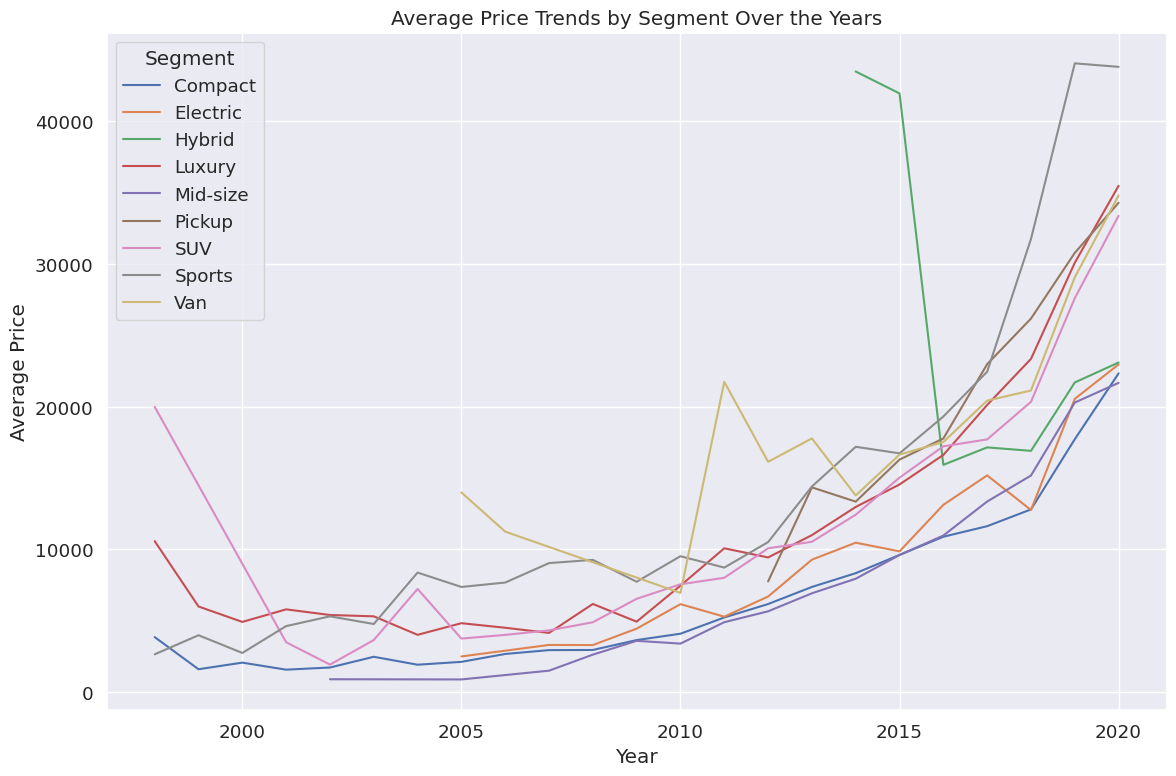

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average price per segment per year
avg_price_segment_year = clean_data.groupby(['segment', 'year'])['price'].mean().reset_index()

# Plot the average price trends over the years for each segment
plt.figure(figsize=(12, 8))
sns.lineplot(data=avg_price_segment_year, x='year', y='price', hue='segment')
plt.title('Average Price Trends by Segment Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()


In [ ]:
# Fuel Type Preferences by Segment
# Count of each fuel type by segment
fuel_segment_count = clean_data.groupby(['segment', 'fuelType']).size().reset_index(name='count')

# Calculate percentage for each fuel type within its segment
segment_total = fuel_segment_count.groupby('segment')['count'].transform('sum')
fuel_segment_count['percentage'] = (fuel_segment_count['count'] / segment_total) * 100

# Display the table
print(fuel_segment_count)


     segment  fuelType  count  percentage
0    Compact    Diesel  13717   24.843787
1    Compact    Hybrid   1465    2.653361
2    Compact     Other    152    0.275297
3    Compact    Petrol  39879   72.227555
4   Electric    Diesel    220   27.060271
5   Electric  Electric      4    0.492005
6   Electric    Hybrid    249   30.627306
7   Electric     Other     25    3.075031
8   Electric    Petrol    315   38.745387
9     Hybrid    Diesel    117   28.606357
10    Hybrid    Hybrid    288   70.415648
11    Hybrid     Other      2    0.488998
12    Hybrid    Petrol      2    0.488998
13    Luxury    Diesel  11189   69.996872
14    Luxury    Hybrid    373    2.333438
15    Luxury     Other     16    0.100094
16    Luxury    Petrol   4407   27.569596
17  Mid-size    Diesel    413   80.664062
18  Mid-size  Electric      2    0.390625
19  Mid-size    Hybrid     16    3.125000
20  Mid-size     Other      1    0.195312
21  Mid-size    Petrol     80   15.625000
22    Pickup    Diesel    270  100

Insights from CO2 Emissions by Car Segment
Electric and Hybrid Vehicles:

Electric: With an average CO2 emission of 99.5 g/km, electric vehicles have the lowest emissions, making them the most environmentally friendly option.
Hybrid: These vehicles follow closely with an average emission of 98.56 g/km.
Implication: This highlights the importance of promoting electric and hybrid vehicles to meet environmental regulations and reduce carbon footprints. Incentives for electric and hybrid vehicle production and sales can be beneficial.

High-Emission Segments:

Pickup Trucks: These have the highest average CO2 emissions at 303.85 g/km.
Sports Cars: These vehicles also have high emissions, averaging 180.33 g/km.
SUVs: With emissions averaging 150.09 g/km, SUVs also contribute significantly to CO2 output.
Implication: There may be regulatory and market pressures to improve the fuel efficiency of these high-emission segments. The industry could focus on developing more efficient engines or hybrid models within these segments to reduce emissions.

Mid-Range Emission Segments:

Luxury Cars: These have an average CO2 emission of 135.61 g/km.
SUVs: As mentioned, with emissions of 150.09 g/km.
Vans: These have average emissions of 168.54 g/km.
Implication: The automotive industry could target these segments for improvement by introducing hybrid or electric models and implementing better fuel efficiency technologies.

Compact and Mid-size Cars:

Compact Cars: These have an average emission of 124.1 g/km.
Mid-size Cars: These have similar emissions at 124.27 g/km.
Implication: These segments show relatively lower emissions compared to SUVs and pickups, suggesting that promoting compact and mid-size cars could be an immediate strategy for reducing overall emissions in the short term.

Strategic Recommendations
Promotion of Low-Emission Vehicles:

Electric and Hybrid Vehicles: Increasing the market share of electric and hybrid vehicles through incentives, subsidies, and infrastructure development (e.g., charging stations).
Innovation in High-Emission Segments:

Research and Development: Invest in R&D to develop cleaner technologies for high-emission segments like pickups, sports cars, and SUVs.
Hybrid Models: Introduce hybrid versions of popular high-emission models to offer more environmentally friendly options.
Regulatory Compliance and Incentives:

Regulations: Adhere to stringent emissions regulations and prepare for future laws aimed at reducing automotive emissions.
Incentives: Utilize government incentives for producing low-emission vehicles and benefit from subsidies for electric and hybrid vehicle production.
Consumer Awareness Campaigns:

Educational Campaigns: Inform consumers about the benefits of low-emission vehicles, including lower taxes, fuel savings, and environmental impact.
Marketing Strategies: Highlight the environmental benefits of compact, mid-size, electric, and hybrid cars in marketing campaigns.
Taxation and Pricing Strategy:

Tax Benefits: Provide tax benefits for consumers purchasing low-emission vehicles.
Pricing Strategy: Competitively price electric and hybrid vehicles to make them more accessible to a broader mark

In [ ]:
#CO2 Emissions by Segment

# Calculate average CO2 emissions per segment
avg_co2_segment = clean_data.groupby('segment')['CO2 Emissions (g/km)'].mean().reset_index()

# Display the table
print(avg_co2_segment)


    segment  CO2 Emissions (g/km)
0   Compact            124.119713
1  Electric             99.501679
2    Hybrid             98.560005
3    Luxury            135.971250
4  Mid-size            124.270994
5    Pickup            303.847641
6       SUV            150.088955
7    Sports            180.329000
8       Van            168.538109


Insights:
Tax Rates by Segment:

Lowest Tax Segments: Electric vehicles have the lowest average tax rate at £90.41, which aligns with government incentives to promote greener transportation options.
Highest Tax Segments: Pickup trucks and sports cars have the highest average tax rates at £260.11 and £169.54, respectively. This reflects the higher environmental and road impact associated with these vehicle types.
Promotion of Electric Vehicles:

The significantly lower tax rate for electric vehicles highlights the ongoing efforts to encourage the adoption of environmentally friendly vehicles. The industry can leverage this by promoting the cost benefits of owning electric vehicles, not just in terms of fuel savings but also lower taxes.
Luxury and Hybrid Vehicles:

Luxury cars and hybrids have relatively moderate tax rates (£123.39 and £133.47 respectively). For luxury vehicles, this could indicate a balance between the premium pricing and the environmental taxes levied. For hybrids, it reflects their partial environmental benefits compared to fully electric vehicles.
Targeted Marketing and Pricing Strategies:

Compact and Mid-size Cars: With tax rates at £107.62 and £100.09, these segments offer a middle ground, appealing to budget-conscious consumers looking for a balance between affordability and comfort.
SUVs and Vans: These segments have higher tax rates (£143.27 and £154.75), indicating higher operational costs. Marketing strategies can focus on the utility, capacity, and versatility these vehicles offer to justify the higher taxes.
Policy and Regulatory Compliance:

Understanding these tax implications can help manufacturers align their product offerings with regulatory frameworks and advocate for policies that support their market segments. For example, advocating for tax breaks or incentives for hybrid and low-emission SUVs could be beneficial.
Environmental Impact Awareness:

The varying tax rates reflect the environmental impact of different vehicle types. This can be used to educate consumers on the environmental footprint of their vehicle choices, promoting more sustainable options.
Recommendations for the UK Automotive Industry:
Increase Electric Vehicle Offerings: Given the lower tax rates and growing consumer awareness of environmental issues, expanding the range of electric vehicles could capture a larger market share.

Leverage Tax Savings in Marketing: Highlight the long-term tax savings of electric and hybrid vehicles in marketing campaigns to appeal to cost-conscious and environmentally aware consumers.

Product Development: Focus on developing more fuel-efficient and low-emission models across all segments to benefit from lower tax rates and meet regulatory standards.

Collaborate with Policymakers: Engage with government bodies to discuss tax policies that could further benefit certain segments, especially those that are environmentally friendly.

Customer Education: Launch awareness campaigns about the benefits of lower-tax segments to shift consumer preferences towards more sustainable vehicle choices.

In [ ]:
# Tax Implications by Segment

# Calculate average tax per segment
avg_tax_segment = clean_data.groupby('segment')['tax'].mean().reset_index()

# Display the table
print(avg_tax_segment)


    segment         tax
0   Compact  114.053630
1  Electric  107.069461
2    Hybrid  141.668704
3    Luxury  124.930366
4  Mid-size  111.698568
5    Pickup  260.111111
6       SUV  144.026162
7    Sports  169.559352
8       Van  154.745763


In [ ]:
# Round float columns to 1 decimal point if they have more than 1 decimal point
float_columns = clean_data.select_dtypes(include=['float64']).columns

# Round the specified columns
clean_data[float_columns] = clean_data[float_columns].round(1)

# Display the first few rows to confirm the changes
clean_data[float_columns].head()


price    tax   mpg  engineSize  CO2 Emissions (g/km)
0  9990.0  125.0  53.3         1.4                 126.8
1  6295.0  125.0  53.3         1.4                 126.8
2  6995.0  125.0  53.3         1.4                 126.8
3  4250.0   20.0  70.6         1.6                 105.6
4  7495.0  125.0  53.3         1.4                 126.8

In [ ]:
# Save the updated DataFrame to a new CSV file
updated_file_path = 'New_Clean_Merged_AutomobileData.csv'
clean_data.to_csv(updated_file_path, index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

#One-Hot Encoding for Categorical Variables
clean_data = pd.get_dummies(clean_data, columns=['brand', 'transmission', 'fuelType'])

features = ['year', 'car_age', 'mileage', 'mpg', 'engineSize']
features += [col for col in clean_data.columns if col.startswith('brand_')]
features += [col for col in clean_data.columns if col.startswith('transmission_')]
features += [col for col in clean_data.columns if col.startswith('fuelType_')]
target = 'price'  # This is the resale price which we will use to estimate the original price


# 'price' column is the resale value
resale_value = clean_data['price']
# Hypothetically set 'original_price' to the resale value plus some noise for demonstration
clean_data['original_price'] = resale_value * (1 + (clean_data['car_age'] * 0.05))  # Adding some depreciation based on age

X = clean_data[features]
y = clean_data['original_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Predict original price for the entire dataset
clean_data['predicted_original_price'] = model.predict(X)

# Calculate depreciation rate
clean_data['depreciation_rate'] = ((clean_data['predicted_original_price'] - resale_value) / clean_data['predicted_original_price']) * 100



Mean Squared Error: 8383831.931288539
R-squared: 0.94115547889574


In [ ]:
# Display the first few rows with the new depreciation rate
print(clean_data[['model', 'year', 'price', 'predicted_original_price', 'depreciation_rate']].head())


      model  year    price  predicted_original_price  depreciation_rate
0   C Class  2020  30495.0              36934.851000          17.435703
1   C Class  2020  29989.0              37332.902333          19.671394
2   C Class  2020  37899.0              43294.323000          12.461964
3   C Class  2019  30399.0              38008.860685          20.021281
4   C Class  2019  29899.0              36836.075000          18.832286
